In [1]:
import os
import pandas as pd


# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/NORMAL'

# Replace 'new_folder_path' with the path to the directory where you want to save the modified files
# new_folder_path = 'C:/Users/User/Downloads/trial2'

# Get a list of CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Specify the column where you want to replace 'NO SYMPTOM' with 'NO SYMPTOMS'
    column_to_replace = [
            'Cardiovascular', 'Eye/ears/nose/throat symptoms', 'Gastrointestinal symptoms',
            'Genitourinary, reproductive', 'Musculoskeletal', 'Neuropsychiatric symptoms',
            'Respiratory', 'Skin', 'Systemic']  

    # Loop through all columns and replace 'NO SYMPTOM' with 'NO SYMPTOMS'
    for col in column_to_replace:
        df[col] = df[col].str.replace('NO SYMPTOM', 'NO SYMPTOMS')

    # Save the modified DataFrame to a new file in the new directory
    new_file_path = os.path.join(folder_path, f"modified_{file}")
    df.to_csv(new_file_path, index=False)


In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/NORMAL'

new_folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/NORMAL_cleaned'
# # Create a list to store the file names and their corresponding entry counts
# file_entry_counts = []

# Get a list of CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Remove rows with missing values
    import pandas as pd

    # Assuming you have a DataFrame called 'df' and the specified columns
    symptoms_columns = [
        'Cardiovascular', 'Eye/ears/nose/throat symptoms', 'Gastrointestinal symptoms',
        'Genitourinary, reproductive', 'Musculoskeletal', 'Neuropsychiatric symptoms',
        'Respiratory', 'Skin', 'Systemic'
    ]

    # Replace 'df' with your actual DataFrame
    df[symptoms_columns] = df[symptoms_columns].fillna('NO SYMPTOMS')

    # Drop specific columns
    columns_to_drop = ['date', 'distance', 'runDistance', 'calories', 'Timestamp', 'Email', 'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'REMTime', 'sleep_duration']
    df.drop(columns=columns_to_drop, inplace=True)

    for col in symptoms_columns:
        new_col_name = f'{col}-new'
        df[new_col_name] = (df[col] != 'NO SYMPTOMS').astype(int)
    
    # Calculate the mean of the "Oxygen level (SpO2)" column
    spo2_mean = df['Oxygen level (SpO2)'].mean()

    # Replace NaN values in the "Oxygen level (SpO2)" column with its mean
    df['Oxygen level (SpO2)'].fillna(spo2_mean, inplace=True)
    
    # Drop the specified columns
    df.drop(columns=symptoms_columns, inplace=True)

    # Save the modified DataFrame to a new file in the new directory
    new_file_path = os.path.join(new_folder_path, f"replaced_{file}")
    df.to_csv(new_file_path, index=False)

In [31]:
import os
import pandas as pd

# Define a function to classify and count steps in a single file
def classify_and_count_steps(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    step_counts = data['steps']
    less_active_count = (step_counts < 7500).sum()
    active_count = (step_counts >= 7500).sum()
    return less_active_count, active_count

# Define a function to classify and count Neuropsychiatric symptoms-new in a single file
def classify_and_count_neuroSymptoms(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    neuroSymptoms_counts = data['Neuropsychiatric symptoms-new']
    absent_count = (neuroSymptoms_counts == 0).sum()
    present_count = (neuroSymptoms_counts == 1).sum()
    return absent_count, present_count

# Define a function to classify and count steps in a single file
def classify_and_count_spo2(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    spo2_counts = data['Oxygen level (SpO2)']
    abnormal_spo2_count = (spo2_counts < 95).sum()
    normal_spo2_count = (spo2_counts >= 95).sum()
    return abnormal_spo2_count, normal_spo2_count

# Define a function to classify and count steps in a single file
def classify_and_count_sleep(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    sleep_counts = data['sleep_duration (hours)']
    low_sleep_count = (sleep_counts < 7.00).sum()
    normal_sleep_count = (sleep_counts >= 7.00).sum()
    return low_sleep_count, normal_sleep_count

# Define a function to classify and count steps in a single file
def classify_and_count_hr(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    hr_counts = data['Mode']
    low_hr_count = (hr_counts < 60).sum()
    normal_hr_count = ((hr_counts >= 60) & (hr_counts <= 100)).sum()
    aboveaverage_hr_count = ((hr_counts > 100) & (hr_counts <= 130)).sum()
    high_hr_count = (hr_counts > 130).sum()
    return low_hr_count, normal_hr_count, aboveaverage_hr_count, high_hr_count

# Define the folder containing your files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/A -0-6_cleaned'

# Get a list of file paths in the folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize lists to store the results
files = []
less_active = []
active = []
abnormal_spo2 = []
normal_spo2 = []
low_sleep = []
normal_sleep = []
low_hr = []
normal_hr = []
aboveaverage_hr = []
high_hr = []
absent = []
present = []
age = [33, 39, 46, 34, 41, 41, 50]
gender = [0, 0, 0, 0, 1, 1, 1]
ethnic = [1, 0, 0, 0, 0, 2, 0]
prior_disease = [0, 1, 1, 1, 1, 1, 1]
medication = [0, 1, 1, 1, 1, 1, 1]

# Iterate through the file paths and classify/count steps for each file
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    less_active_count, active_count = classify_and_count_steps(file_path)
    abnormal_spo2_count, normal_spo2_count = classify_and_count_spo2(file_path)
    low_sleep_count, normal_sleep_count = classify_and_count_sleep(file_path)
    absent_count, present_count = classify_and_count_neuroSymptoms(file_path)
    low_hr_count, normal_hr_count, aboveaverage_hr_count, high_hr_count = classify_and_count_hr(file_path)
    files.append(file_name)
    less_active.append(less_active_count)
    active.append(active_count)
    abnormal_spo2.append(abnormal_spo2_count)
    normal_spo2.append(normal_spo2_count)
    low_sleep.append(low_sleep_count)
    normal_sleep.append(normal_sleep_count)
    low_hr.append(low_hr_count)
    normal_hr.append(normal_hr_count)
    aboveaverage_hr.append(aboveaverage_hr_count)
    high_hr.append(high_hr_count)
    absent.append(absent_count)
    present.append(present_count)

# Create a final table to display the results
results_table_a = pd.DataFrame({
    'File': files,
    'Less Active': less_active,
    'Active': active,
    'Abnormal SpO2': abnormal_spo2,
    'Normal SpO2': normal_spo2,
    'Low Sleep Duration': low_sleep,
    'Normal Sleep Duration': normal_sleep,
    'Low HR': low_hr,
    'Normal HR': normal_hr,
    'Above Average HR': aboveaverage_hr,
    'High HR': high_hr,
    'Absent': absent,
    'Present': present,
    'Age': age,
    'Gender' : gender,
    'Ethnic' : ethnic,
    'Prior Disease' : prior_disease,
    'Medication' : medication
})

# Print the final table
results_table_a

File  Less Active  Active  Abnormal SpO2  \
0  replaced_converted_modified_011.csv           11       1              0   
1  replaced_converted_modified_015.csv           39       0              0   
2       replaced_converted_ppum002.csv           26       4              1   
3       replaced_converted_ppum008.csv           56       8              0   
4       replaced_converted_ppum012.csv           62       0              0   
5       replaced_converted_ppum016.csv           16       0              0   
6       replaced_converted_ppum017.csv           57       1              0   

   Normal SpO2  Low Sleep Duration  Normal Sleep Duration  Low HR  Normal HR  \
0           12                   4                      8       6          6   
1           39                  39                      0       0         39   
2           29                  30                      0       0         30   
3           64                  62                      2       2         62   
4           62                  36                     26       5         57   
5           16                  15                      1       0         16   
6           58                  42                     16       3         55   

   Above Average HR  High HR  Absent  Present  Age  Gender  Ethnic  \
0                 0        0       9        3   33       0       1   
1                 0        0      38        1   39       0       0   
2                 0        0      25        5   46       0       0   
3                 0        0      45       19   34       0       0   
4                 0        0      60        2   41       1       0   
5                 0        0      15        1   41       1       2   
6                 0        0      37       21   50       1       0   

   Prior Disease  Medication  
0              0           0  
1              1           1  
2              1           1  
3              1           1  
4              1           1  
5              1           1  
6              1           1

In [32]:
import os
import pandas as pd

# Define a function to classify and count steps in a single file
def classify_and_count_steps(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    step_counts = data['steps']
    less_active_count = (step_counts < 7500).sum()
    active_count = (step_counts >= 7500).sum()
    return less_active_count, active_count

# Define a function to classify and count Neuropsychiatric symptoms-new in a single file
def classify_and_count_neuroSymptoms(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    neuroSymptoms_counts = data['Neuropsychiatric symptoms-new']
    absent_count = (neuroSymptoms_counts == 0).sum()
    present_count = (neuroSymptoms_counts == 1).sum()
    return absent_count, present_count

# Define a function to classify and count steps in a single file
def classify_and_count_spo2(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    spo2_counts = data['Oxygen level (SpO2)']
    abnormal_spo2_count = (spo2_counts < 95).sum()
    normal_spo2_count = (spo2_counts >= 95).sum()
    return abnormal_spo2_count, normal_spo2_count

# Define a function to classify and count steps in a single file
def classify_and_count_sleep(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    sleep_counts = data['sleep_duration (hours)']
    low_sleep_count = (sleep_counts < 7.00).sum()
    normal_sleep_count = (sleep_counts >= 7.00).sum()
    return low_sleep_count, normal_sleep_count

# Define a function to classify and count steps in a single file
def classify_and_count_hr(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    hr_counts = data['Mode']
    low_hr_count = (hr_counts < 60).sum()
    normal_hr_count = ((hr_counts >= 60) & (hr_counts <= 100)).sum()
    aboveaverage_hr_count = ((hr_counts > 100) & (hr_counts <= 130)).sum()
    high_hr_count = (hr_counts > 130).sum()
    return low_hr_count, normal_hr_count, aboveaverage_hr_count, high_hr_count

# Define the folder containing your files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/B - MORE THAN 6_2_cleaned'

# Get a list of file paths in the folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize lists to store the results
files = []
less_active = []
active = []
abnormal_spo2 = []
normal_spo2 = []
low_sleep = []
normal_sleep = []
low_hr = []
normal_hr = []
aboveaverage_hr = []
high_hr = []
absent = []
present = []
age = [38, 25, 24, 44, 45, 43, 28]
gender = [0, 0, 0, 1, 0, 0, 0]
ethnic = [0, 0, 0, 0, 1, 1, 0]
prior_disease = [0, 0, 0, 0, 0, 1, 1]
medication = [0, 0, 0, 0, 0, 1, 1]

# Iterate through the file paths and classify/count steps for each file
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    less_active_count, active_count = classify_and_count_steps(file_path)
    abnormal_spo2_count, normal_spo2_count = classify_and_count_spo2(file_path)
    low_sleep_count, normal_sleep_count = classify_and_count_sleep(file_path)
    absent_count, present_count = classify_and_count_neuroSymptoms(file_path)
    low_hr_count, normal_hr_count, aboveaverage_hr_count, high_hr_count = classify_and_count_hr(file_path)
    files.append(file_name)
    less_active.append(less_active_count)
    active.append(active_count)
    abnormal_spo2.append(abnormal_spo2_count)
    normal_spo2.append(normal_spo2_count)
    low_sleep.append(low_sleep_count)
    normal_sleep.append(normal_sleep_count)
    low_hr.append(low_hr_count)
    normal_hr.append(normal_hr_count)
    aboveaverage_hr.append(aboveaverage_hr_count)
    high_hr.append(high_hr_count)
    absent.append(absent_count)
    present.append(present_count)

# Create a final table to display the results
results_table_b = pd.DataFrame({
    'File': files,
    'Less Active': less_active,
    'Active': active,
    'Abnormal SpO2': abnormal_spo2,
    'Normal SpO2': normal_spo2,
    'Low Sleep Duration': low_sleep,
    'Normal Sleep Duration': normal_sleep,
    'Low HR': low_hr,
    'Normal HR': normal_hr,
    'Above Average HR': aboveaverage_hr,
    'High HR': high_hr,
    'Absent': absent,
    'Present': present,
    'Age': age,
    'Gender' : gender,
    'Ethnic' : ethnic,
    'Prior Disease' : prior_disease,
    'Medication' : medication
})

# Print the final table
results_table_b

File  Less Active  Active  Abnormal SpO2  \
0  replaced_converted_modified_016.csv           44       0              1   
1  replaced_converted_modified_018.csv           51      10              4   
2  replaced_converted_modified_019.csv           48       7              4   
3       replaced_converted_ppum001.csv           10       2             12   
4       replaced_converted_ppum005.csv           36       8              0   
5       replaced_converted_ppum009.csv           59       3              2   
6       replaced_converted_ppum014.csv           62       1              0   

   Normal SpO2  Low Sleep Duration  Normal Sleep Duration  Low HR  Normal HR  \
0           43                  37                      7       0         44   
1           57                  52                      9      10         51   
2           51                  35                     20       3         52   
3            0                  12                      0       2         10   
4           44                  40                      4       0         44   
5           60                  27                     35       7         55   
6           63                  23                     40       0         47   

   Above Average HR  High HR  Absent  Present  Age  Gender  Ethnic  \
0                 0        0      37        7   38       0       0   
1                 0        0      60        1   25       0       0   
2                 0        0      53        2   24       0       0   
3                 0        0      12        0   44       1       0   
4                 0        0      35        9   45       0       1   
5                 0        0      58        4   43       0       1   
6                16        0      47       16   28       0       0   

   Prior Disease  Medication  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              0           0  
5              1           1  
6              1           1

In [33]:
import os
import pandas as pd

# Define a function to classify and count steps in a single file
def classify_and_count_steps(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    step_counts = data['steps']
    less_active_count = (step_counts < 7500).sum()
    active_count = (step_counts >= 7500).sum()
    return less_active_count, active_count

# Define a function to classify and count Neuropsychiatric symptoms-new in a single file
def classify_and_count_neuroSymptoms(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    neuroSymptoms_counts = data['Neuropsychiatric symptoms-new']
    absent_count = (neuroSymptoms_counts == 0).sum()
    present_count = (neuroSymptoms_counts == 1).sum()
    return absent_count, present_count

# Define a function to classify and count steps in a single file
def classify_and_count_spo2(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    spo2_counts = data['Oxygen level (SpO2)']
    abnormal_spo2_count = (spo2_counts < 95).sum()
    normal_spo2_count = (spo2_counts >= 95).sum()
    return abnormal_spo2_count, normal_spo2_count

# Define a function to classify and count steps in a single file
def classify_and_count_sleep(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    sleep_counts = data['sleep_duration (hours)']
    low_sleep_count = (sleep_counts < 7.00).sum()
    normal_sleep_count = (sleep_counts >= 7.00).sum()
    return low_sleep_count, normal_sleep_count

# Define a function to classify and count steps in a single file
def classify_and_count_hr(file_path):
    data = pd.read_csv(file_path)  # Assuming your data is in CSV format
    hr_counts = data['Mode']
    low_hr_count = (hr_counts < 60).sum()
    normal_hr_count = ((hr_counts >= 60) & (hr_counts <= 100)).sum()
    aboveaverage_hr_count = ((hr_counts > 100) & (hr_counts <= 130)).sum()
    high_hr_count = (hr_counts > 130).sum()
    return low_hr_count, normal_hr_count, aboveaverage_hr_count, high_hr_count

# Define the folder containing your files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/NORMAL_cleaned'

# Get a list of file paths in the folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize lists to store the results
files = []
less_active = []
active = []
abnormal_spo2 = []
normal_spo2 = []
low_sleep = []
normal_sleep = []
low_hr = []
normal_hr = []
aboveaverage_hr = []
high_hr = []
absent = []
present = []
age = [25, 23, 24, 22, 22, 30, 24, 23, 23, 32, 46, 27, 30]
gender = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
ethnic = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
prior_disease = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
medication = [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

# Iterate through the file paths and classify/count steps for each file
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    less_active_count, active_count = classify_and_count_steps(file_path)
    abnormal_spo2_count, normal_spo2_count = classify_and_count_spo2(file_path)
    low_sleep_count, normal_sleep_count = classify_and_count_sleep(file_path)
    absent_count, present_count = classify_and_count_neuroSymptoms(file_path)
    low_hr_count, normal_hr_count, aboveaverage_hr_count, high_hr_count = classify_and_count_hr(file_path)
    files.append(file_name)
    less_active.append(less_active_count)
    active.append(active_count)
    abnormal_spo2.append(abnormal_spo2_count)
    normal_spo2.append(normal_spo2_count)
    low_sleep.append(low_sleep_count)
    normal_sleep.append(normal_sleep_count)
    low_hr.append(low_hr_count)
    normal_hr.append(normal_hr_count)
    aboveaverage_hr.append(aboveaverage_hr_count)
    high_hr.append(high_hr_count)
    absent.append(absent_count)
    present.append(present_count)

# Create a final table to display the results
results_table_c = pd.DataFrame({
    'File': files,
    'Less Active': less_active,
    'Active': active,
    'Abnormal SpO2': abnormal_spo2,
    'Normal SpO2': normal_spo2,
    'Low Sleep Duration': low_sleep,
    'Normal Sleep Duration': normal_sleep,
    'Low HR': low_hr,
    'Normal HR': normal_hr,
    'Above Average HR': aboveaverage_hr,
    'High HR': high_hr,
    'Absent': absent,
    'Present': present,
    'Age': age,
    'Gender' : gender,
    'Ethnic' : ethnic,
    'Prior Disease' : prior_disease,
    'Medication' : medication
})

# Print the final table
results_table_c

File  Less Active  Active  Abnormal SpO2  \
0   replaced_modified_converted_001.csv           36      11              3   
1   replaced_modified_converted_002.csv           10       0             10   
2   replaced_modified_converted_003.csv           55       3             45   
3   replaced_modified_converted_004.csv            8       0              0   
4   replaced_modified_converted_005.csv           37       0              2   
5   replaced_modified_converted_006.csv           60       0              1   
6   replaced_modified_converted_007.csv           51       6             50   
7   replaced_modified_converted_008.csv           45       0             39   
8   replaced_modified_converted_009.csv           56       2              0   
9   replaced_modified_converted_010.csv           53       7              0   
10  replaced_modified_converted_013.csv           30       5              0   
11  replaced_modified_converted_014.csv           57       4              8   
12  replaced_modified_converted_017.csv           46       7              2   

    Normal SpO2  Low Sleep Duration  Normal Sleep Duration  Low HR  Normal HR  \
0            44                  40                      7       2         45   
1             0                  10                      0       0         10   
2            13                  40                     18       5         53   
3             8                   8                      0       0          8   
4            35                  25                     12       0         36   
5            59                  35                     25       6         54   
6             7                  48                      9       3         54   
7             6                  43                      2       1         43   
8            58                  47                     11       4         53   
9            60                  39                     21      43         17   
10           35                  15                     20       4         31   
11           53                  45                     16       5         56   
12           51                  45                      8      19         34   

    Above Average HR  High HR  Absent  Present  Age  Gender  Ethnic  \
0                  0        0      46        1   25       0       0   
1                  0        0       9        1   23       0       0   
2                  0        0      54        4   24       0       0   
3                  0        0       8        0   22       0       0   
4                  1        0      28        9   22       0       0   
5                  0        0      60        0   30       0       0   
6                  0        0      55        2   24       0       0   
7                  1        0      43        2   23       0       0   
8                  1        0      57        1   23       0       0   
9                  0        0      60        0   32       1       1   
10                 0        0      35        0   46       1       1   
11                 0        0      58        3   27       0       0   
12                 0        0      51        2   30       0       0   

    Prior Disease  Medication  
0               0           0  
1               0           1  
2               0           1  
3               0           0  
4               1           1  
5               0           0  
6               0           1  
7               0           0  
8               0           0  
9               0           0  
10              0           0  
11              0           0  
12              0           0

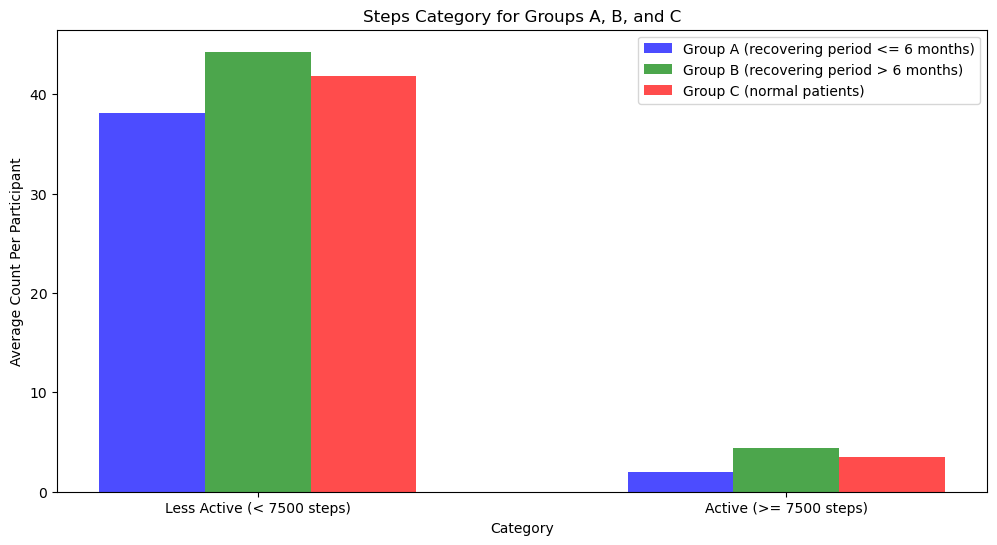

In [34]:
import matplotlib.pyplot as plt

df_group_a = pd.DataFrame(results_table_a)
df_group_b = pd.DataFrame(results_table_b)
df_group_c = pd.DataFrame(results_table_c)

# Calculate the sum of "Less Active" and "Active" for each group
sum_group_a = df_group_a[['Less Active', 'Active']].sum()
average_a_steps = sum_group_a/(len(df_group_a['File']))
sum_group_b = df_group_b[['Less Active', 'Active']].sum()
average_b_steps = sum_group_b/(len(df_group_b['File']))
sum_group_c = df_group_c[['Less Active', 'Active']].sum()
average_c_steps = sum_group_c/(len(df_group_c['File']))

# Create a side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = range(len(sum_group_a))

bar1 = ax.bar(index, average_a_steps, bar_width, label='Group A (recovering period <= 6 months)', color='b', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], average_b_steps, bar_width, label='Group B (recovering period > 6 months)', color='g', alpha=0.7)
bar3 = ax.bar([i + 2 * bar_width for i in index], average_c_steps, bar_width, label='Group C (normal patients)', color='r', alpha=0.7)

ax.set_xlabel('Category')
ax.set_ylabel('Average Count Per Participant')
ax.set_title('Steps Category for Groups A, B, and C')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(['Less Active (< 7500 steps)', 'Active (>= 7500 steps)'])
ax.legend()

plt.show()

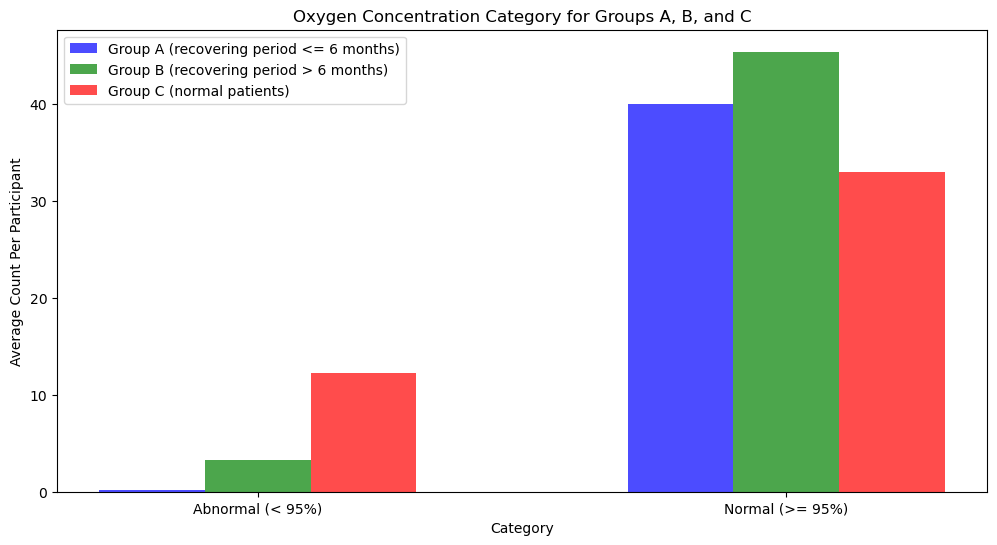

In [35]:
df_group_a = pd.DataFrame(results_table_a)
df_group_b = pd.DataFrame(results_table_b)
df_group_c = pd.DataFrame(results_table_c)

# Calculate the sum of "Less Active" and "Active" for each group
sum_group_a = df_group_a[['Abnormal SpO2', 'Normal SpO2']].sum()
average_a_spo2 = sum_group_a/(len(df_group_a['File']))
sum_group_b = df_group_b[['Abnormal SpO2', 'Normal SpO2']].sum()
average_b_spo2 = sum_group_b/(len(df_group_b['File']))
sum_group_c = df_group_c[['Abnormal SpO2', 'Normal SpO2']].sum()
average_c_spo2 = sum_group_c/(len(df_group_c['File']))

# Create a side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = range(len(sum_group_a))

bar1 = ax.bar(index, average_a_spo2, bar_width, label='Group A (recovering period <= 6 months)', color='b', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], average_b_spo2, bar_width, label='Group B (recovering period > 6 months)', color='g', alpha=0.7)
bar3 = ax.bar([i + 2 * bar_width for i in index], average_c_spo2, bar_width, label='Group C (normal patients)', color='r', alpha=0.7)

ax.set_xlabel('Category')
ax.set_ylabel('Average Count Per Participant')
ax.set_title('Oxygen Concentration Category for Groups A, B, and C')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(['Abnormal (< 95%)', 'Normal (>= 95%)'])
ax.legend()

plt.show()

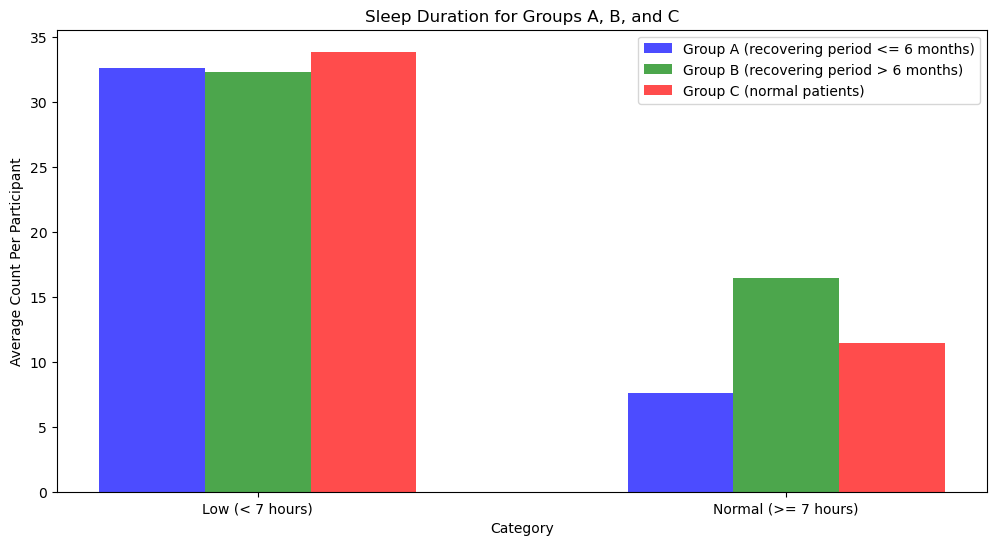

In [36]:
import matplotlib.pyplot as plt
df_group_a = pd.DataFrame(results_table_a)
df_group_b = pd.DataFrame(results_table_b)
df_group_c = pd.DataFrame(results_table_c)

# Calculate the sum of "Less Active" and "Active" for each group
sum_group_a = df_group_a[['Low Sleep Duration', 'Normal Sleep Duration']].sum()
average_a_sleep = sum_group_a/(len(df_group_a['File']))
sum_group_b = df_group_b[['Low Sleep Duration', 'Normal Sleep Duration']].sum()
average_b_sleep = sum_group_b/(len(df_group_b['File']))
sum_group_c = df_group_c[['Low Sleep Duration', 'Normal Sleep Duration']].sum()
average_c_sleep = sum_group_c/(len(df_group_c['File']))

# Create a side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = range(len(sum_group_a))

bar1 = ax.bar(index, average_a_sleep, bar_width, label='Group A (recovering period <= 6 months)', color='b', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], average_b_sleep, bar_width, label='Group B (recovering period > 6 months)', color='g', alpha=0.7)
bar3 = ax.bar([i + 2 * bar_width for i in index], average_c_sleep, bar_width, label='Group C (normal patients)', color='r', alpha=0.7)

ax.set_xlabel('Category')
ax.set_ylabel('Average Count Per Participant')
ax.set_title('Sleep Duration for Groups A, B, and C')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(['Low (< 7 hours)', 'Normal (>= 7 hours)'])
ax.legend()

plt.show()

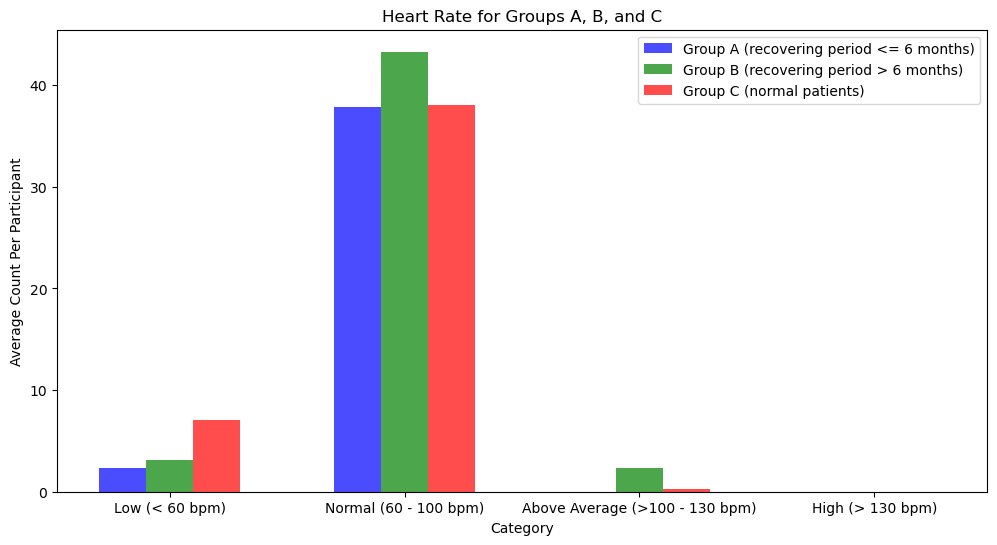

In [37]:
import matplotlib.pyplot as plt
df_group_a = pd.DataFrame(results_table_a)
df_group_b = pd.DataFrame(results_table_b)
df_group_c = pd.DataFrame(results_table_c)

# Calculate the sum of "Less Active" and "Active" for each group
sum_group_a = df_group_a[['Low HR', 'Normal HR', 'Above Average HR', 'High HR']].sum()
average_a_heart_rate = sum_group_a/(len(df_group_a['File']))
sum_group_b = df_group_b[['Low HR', 'Normal HR', 'Above Average HR', 'High HR']].sum()
average_b_heart_rate = sum_group_b/(len(df_group_b['File']))
sum_group_c = df_group_c[['Low HR', 'Normal HR', 'Above Average HR', 'High HR']].sum()
average_c_heart_rate = sum_group_c/(len(df_group_c['File']))

# Create a side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = range(len(sum_group_a))

bar1 = ax.bar(index, average_a_heart_rate, bar_width, label='Group A (recovering period <= 6 months)', color='b', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], average_b_heart_rate, bar_width, label='Group B (recovering period > 6 months)', color='g', alpha=0.7)
bar3 = ax.bar([i + 2 * bar_width for i in index], average_c_heart_rate, bar_width, label='Group C (normal patients)', color='r', alpha=0.7)

ax.set_xlabel('Category')
ax.set_ylabel('Average Count Per Participant')
ax.set_title('Heart Rate for Groups A, B, and C')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(['Low (< 60 bpm)', 'Normal (60 - 100 bpm)', 'Above Average (>100 - 130 bpm)', 'High (> 130 bpm)'])
ax.legend()

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap for Group A (recovering period < 6 months)')

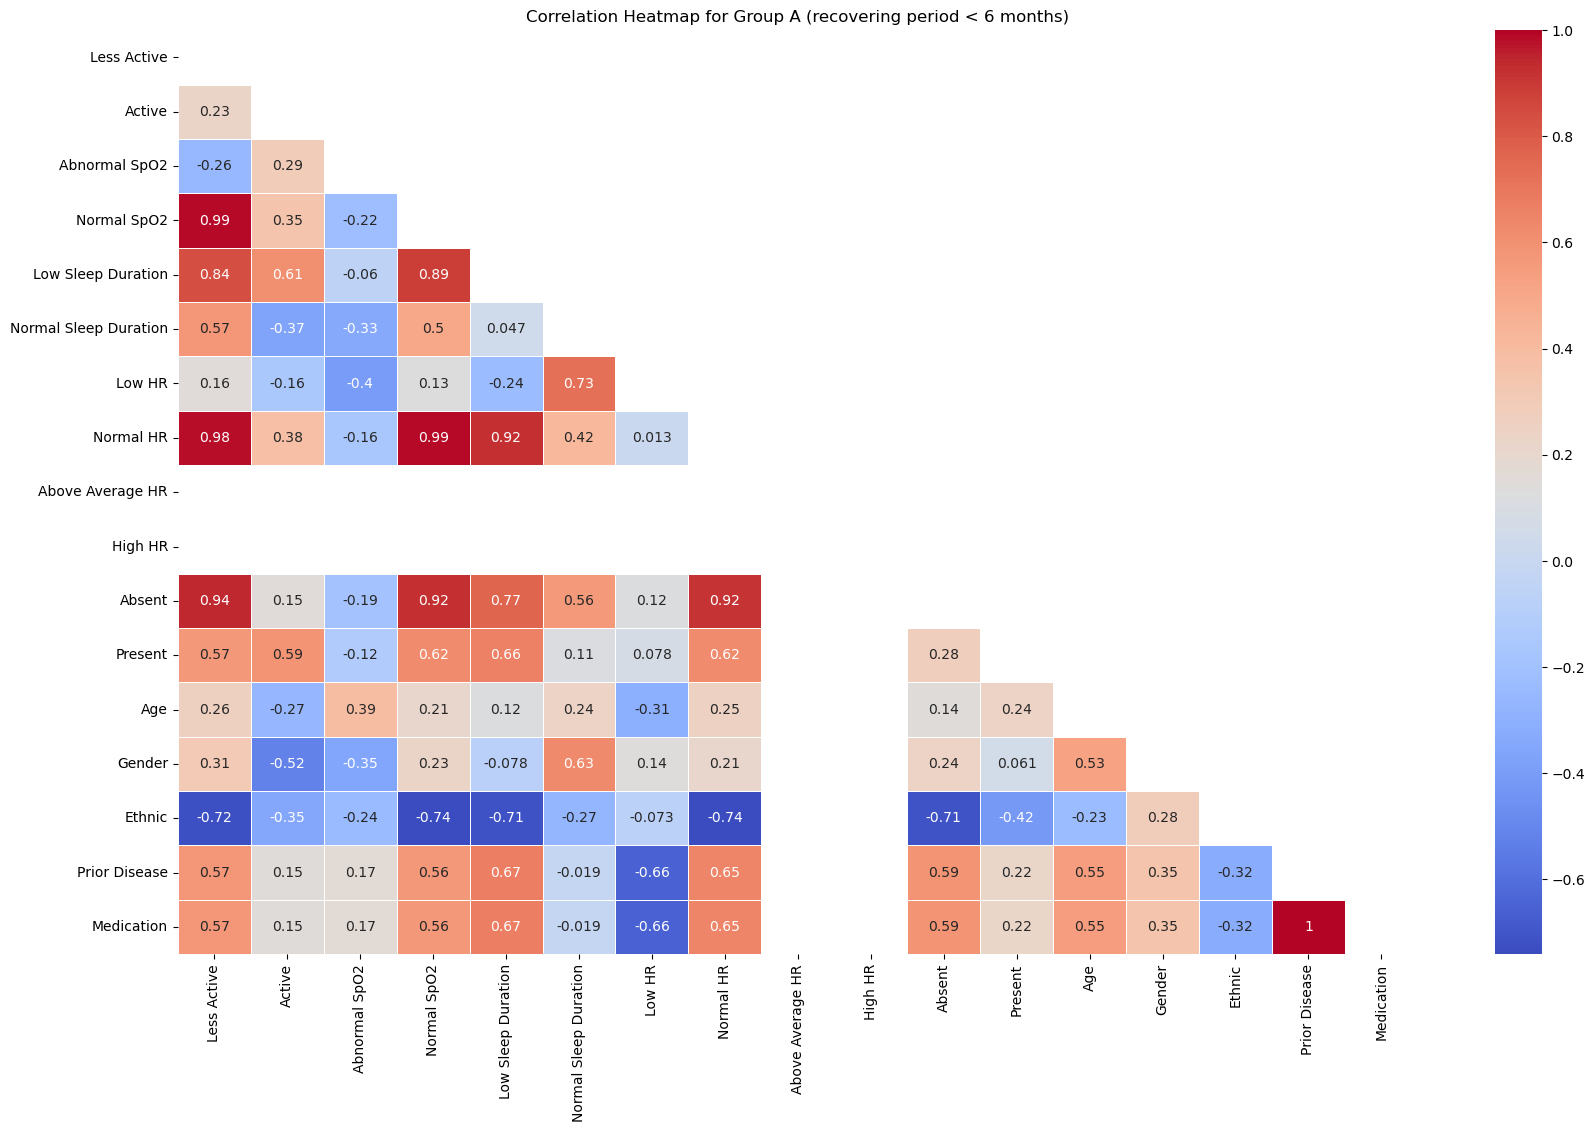

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix_steps_a = results_table_a.corr()

# Create a mask to display only the lower triangular part of the heatmap
mask = np.triu(np.ones_like(correlation_matrix_steps_a, dtype=bool))
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_steps_a, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Group A (recovering period < 6 months)')

'Less Active', 'Active', 'Normal SpO2', 'Low Sleep Duration' and 'Normal HR' show moderately high correlation with target variable, presence of neuropsychiatric symptoms for group A participants, which are those recovering less than 6 months from COVID.

Text(0.5, 1.0, 'Correlation Heatmap for Group B (recovering period >= 6 months)')

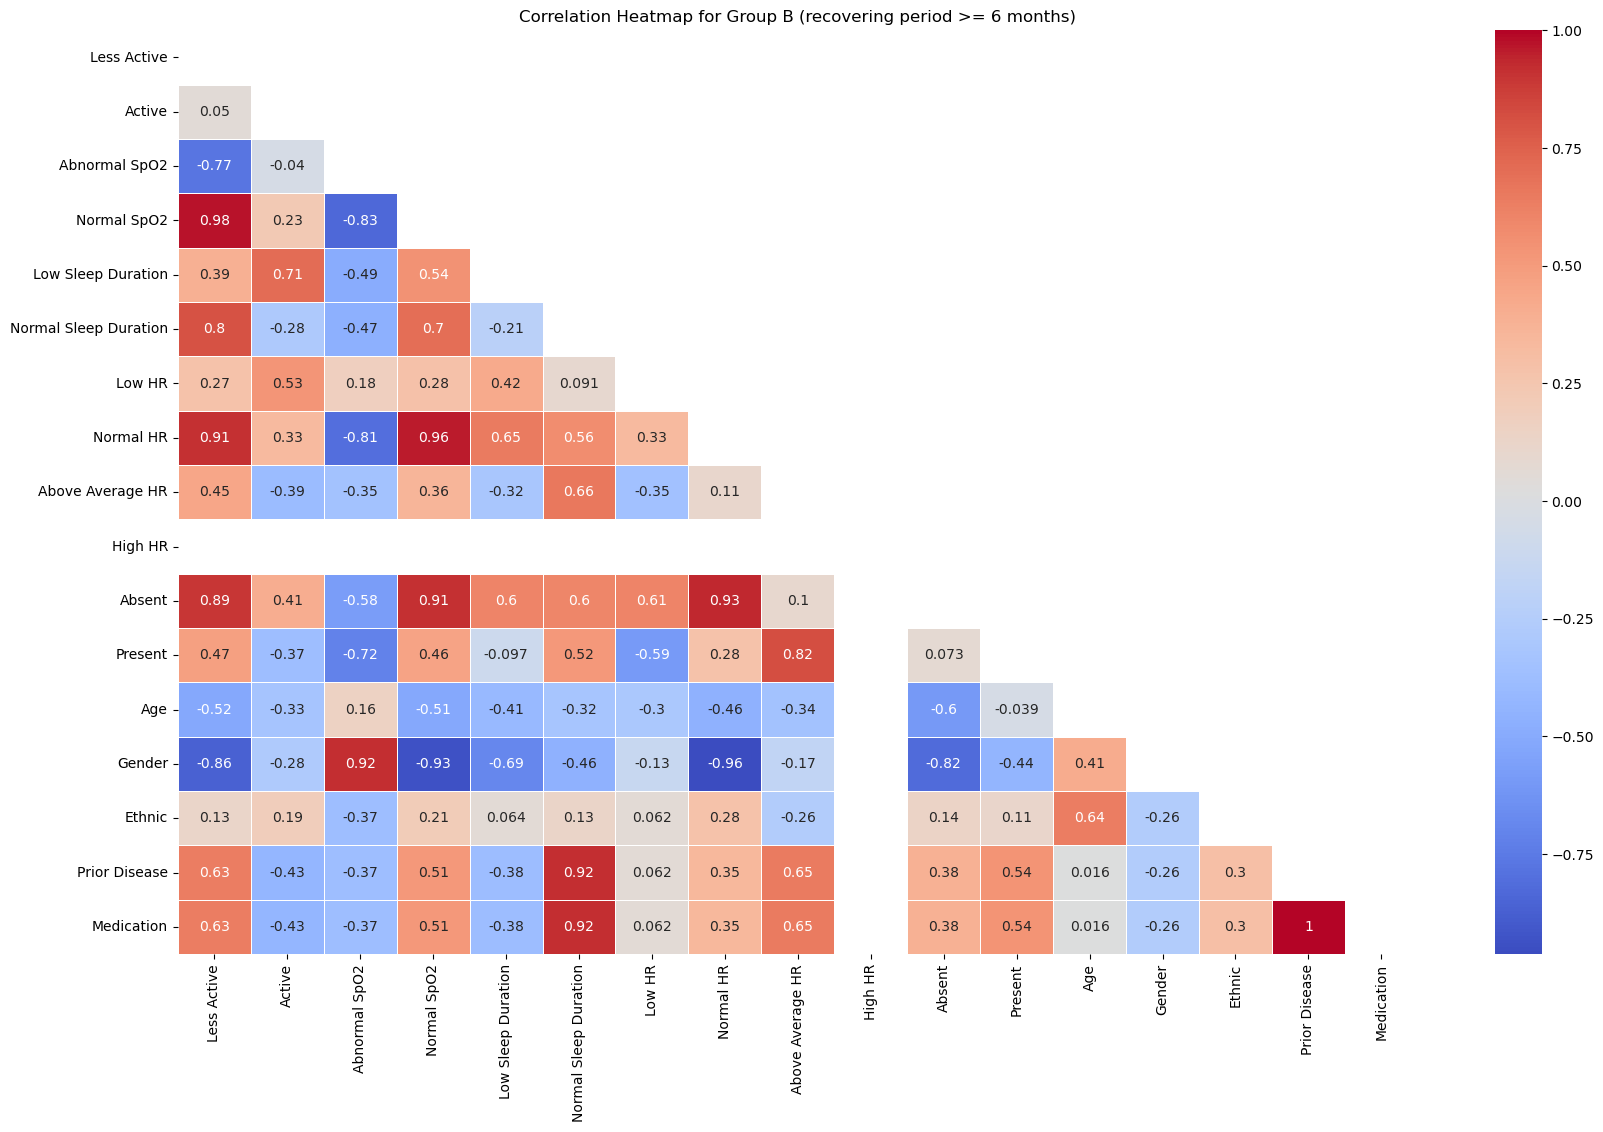

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix_b = results_table_b.corr()

# Create a mask to display only the lower triangular part of the heatmap
mask = np.triu(np.ones_like(correlation_matrix_b, dtype=bool))
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_b, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Group B (recovering period >= 6 months)')

'Above Average HR' variable is highly correlated with target variable, presence of neuropsychiatric symptoms in those who are recovering >= 6 months from COVID. Apart from that, 'prior disease' and 'medication' also show moderately high correlation with target variable. 

Text(0.5, 1.0, 'Correlation Heatmap for Group C (Normal Individuals)')

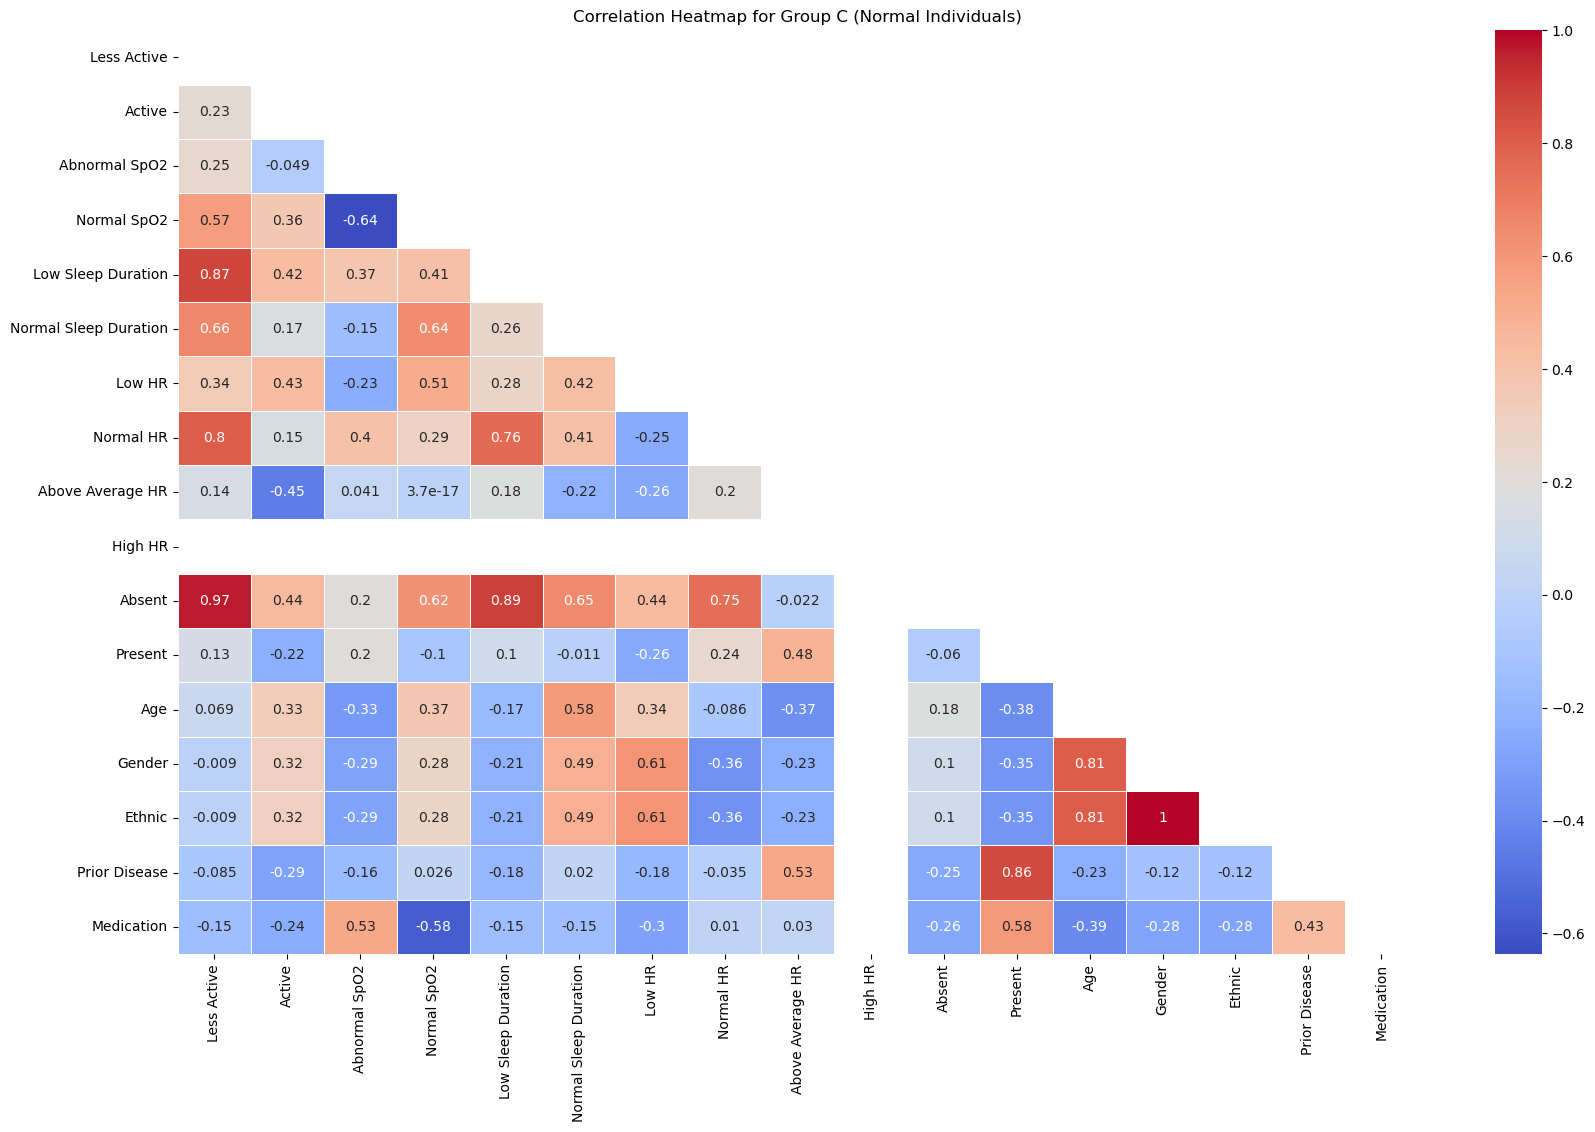

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix_c = results_table_c.corr()

# Create a mask to display only the lower triangular part of the heatmap
mask = np.triu(np.ones_like(correlation_matrix_c, dtype=bool))
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_c, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Group C (Normal Individuals)')

In normal participants, the variables barely show any correlation with target variable with correlation less than 0.3, except for 'Above Average HR' shows moderately high correlation (0.48) with presence of neuropsychiatric symptoms.

Neuropsychiatric Symptoms Correlation for replaced_converted_modified_011.csv
Neuropsychiatric symptoms-new        1.000000
Eye/ears/nose/throat symptoms-new    0.774597
Oxygen level (SpO2)                  0.628539
Mode                                 0.512129
Respiratory-new                      0.408248
Mean                                 0.279384
Median                               0.276476
REMTime (hours)                      0.142676
shallowSleepTime (hours)             0.010425
wakeTime (hours)                     0.005651
sleep_duration (hours)               0.000944
Max                                 -0.138138
Gastrointestinal symptoms-new       -0.174078
Min                                 -0.178088
deepSleepTime (hours)               -0.200448
steps                               -0.246573
Cardiovascular-new                        NaN
Genitourinary, reproductive-new           NaN
Musculoskeletal-new                       NaN
Skin-new                                  NaN
Sy

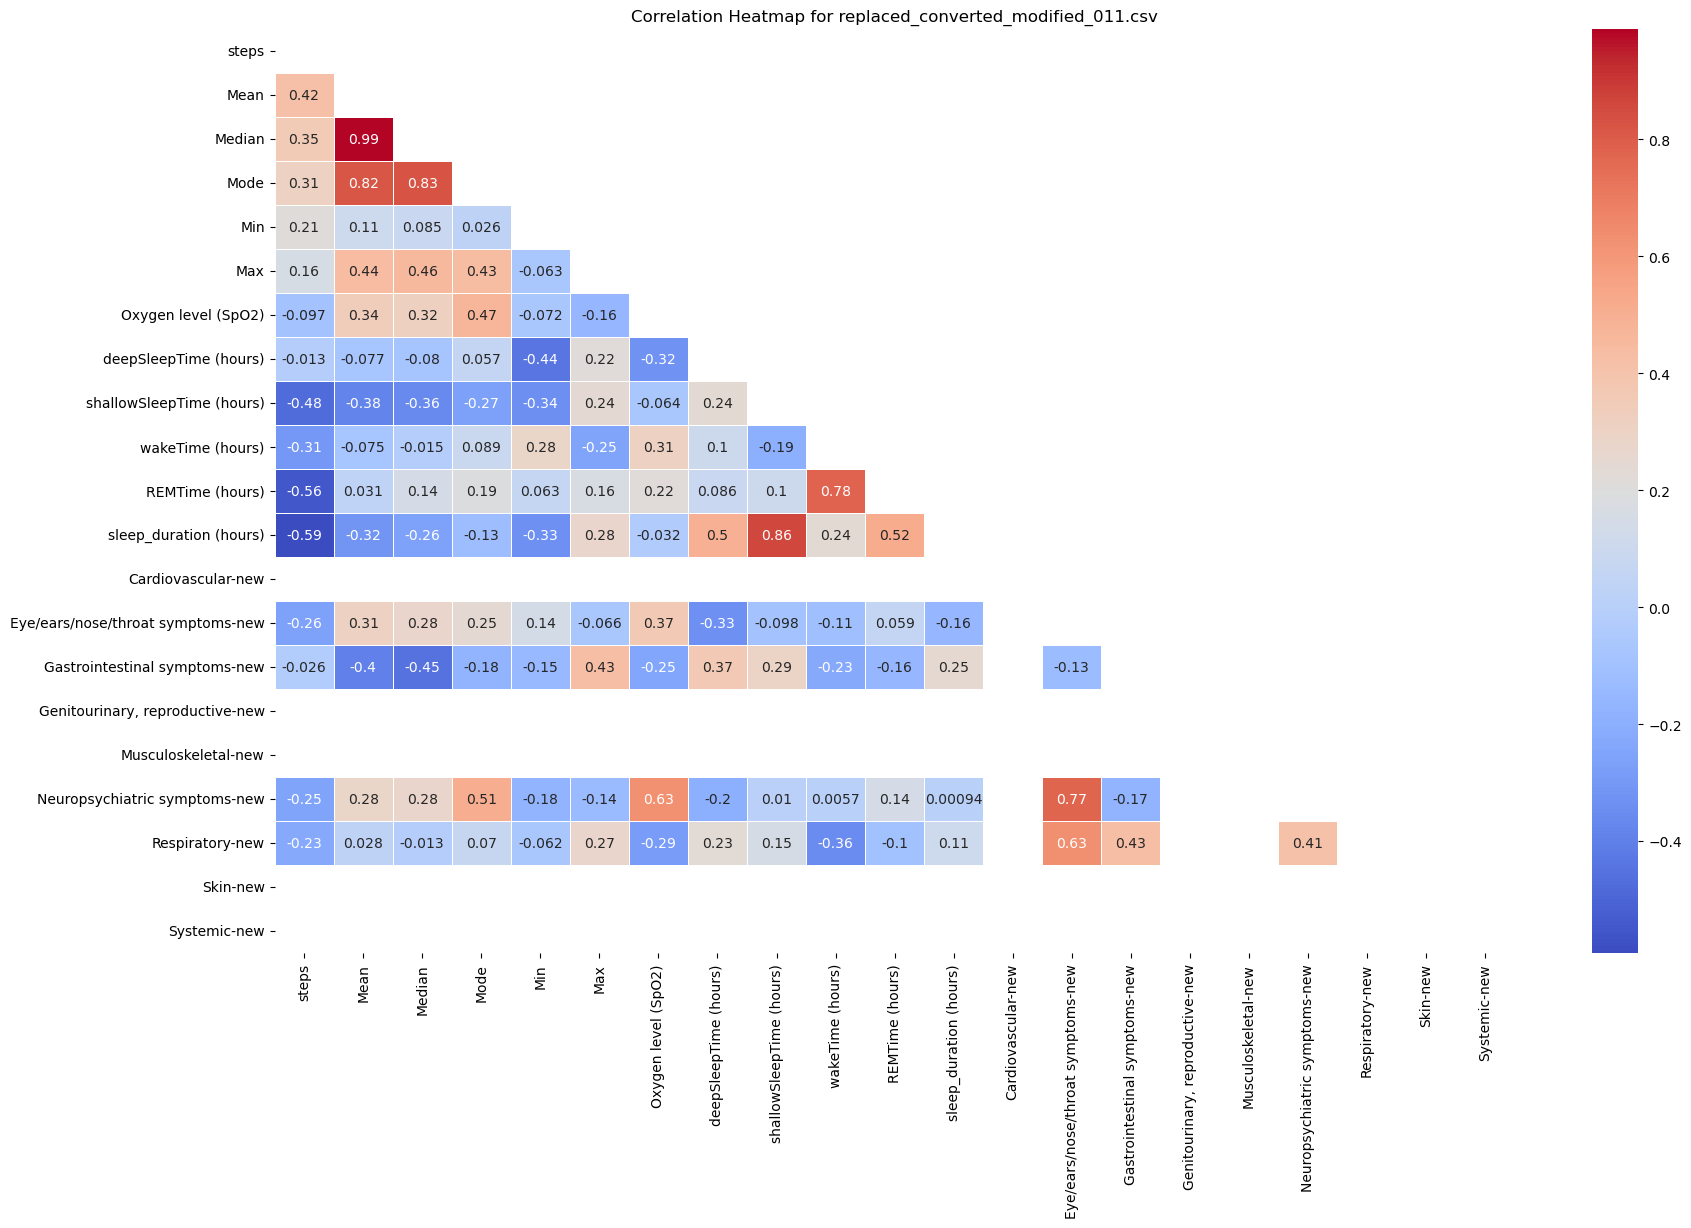

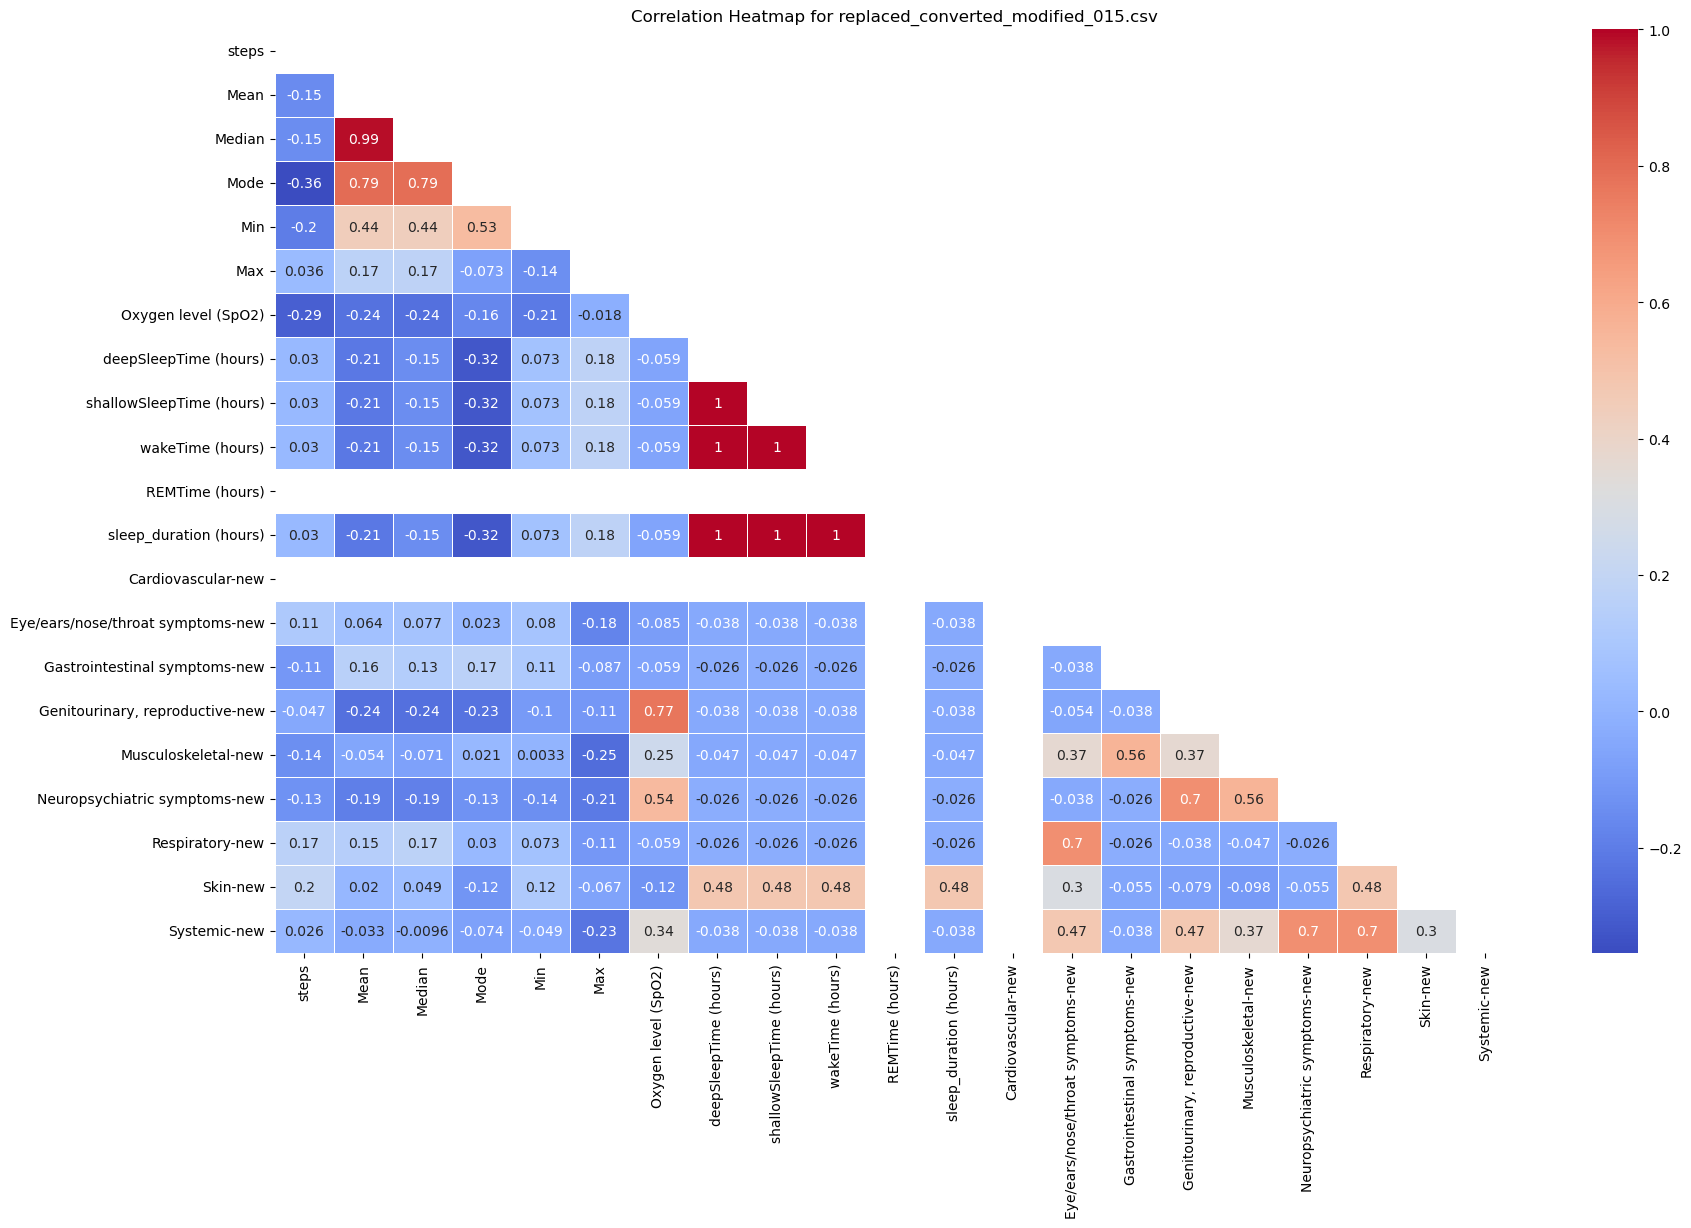

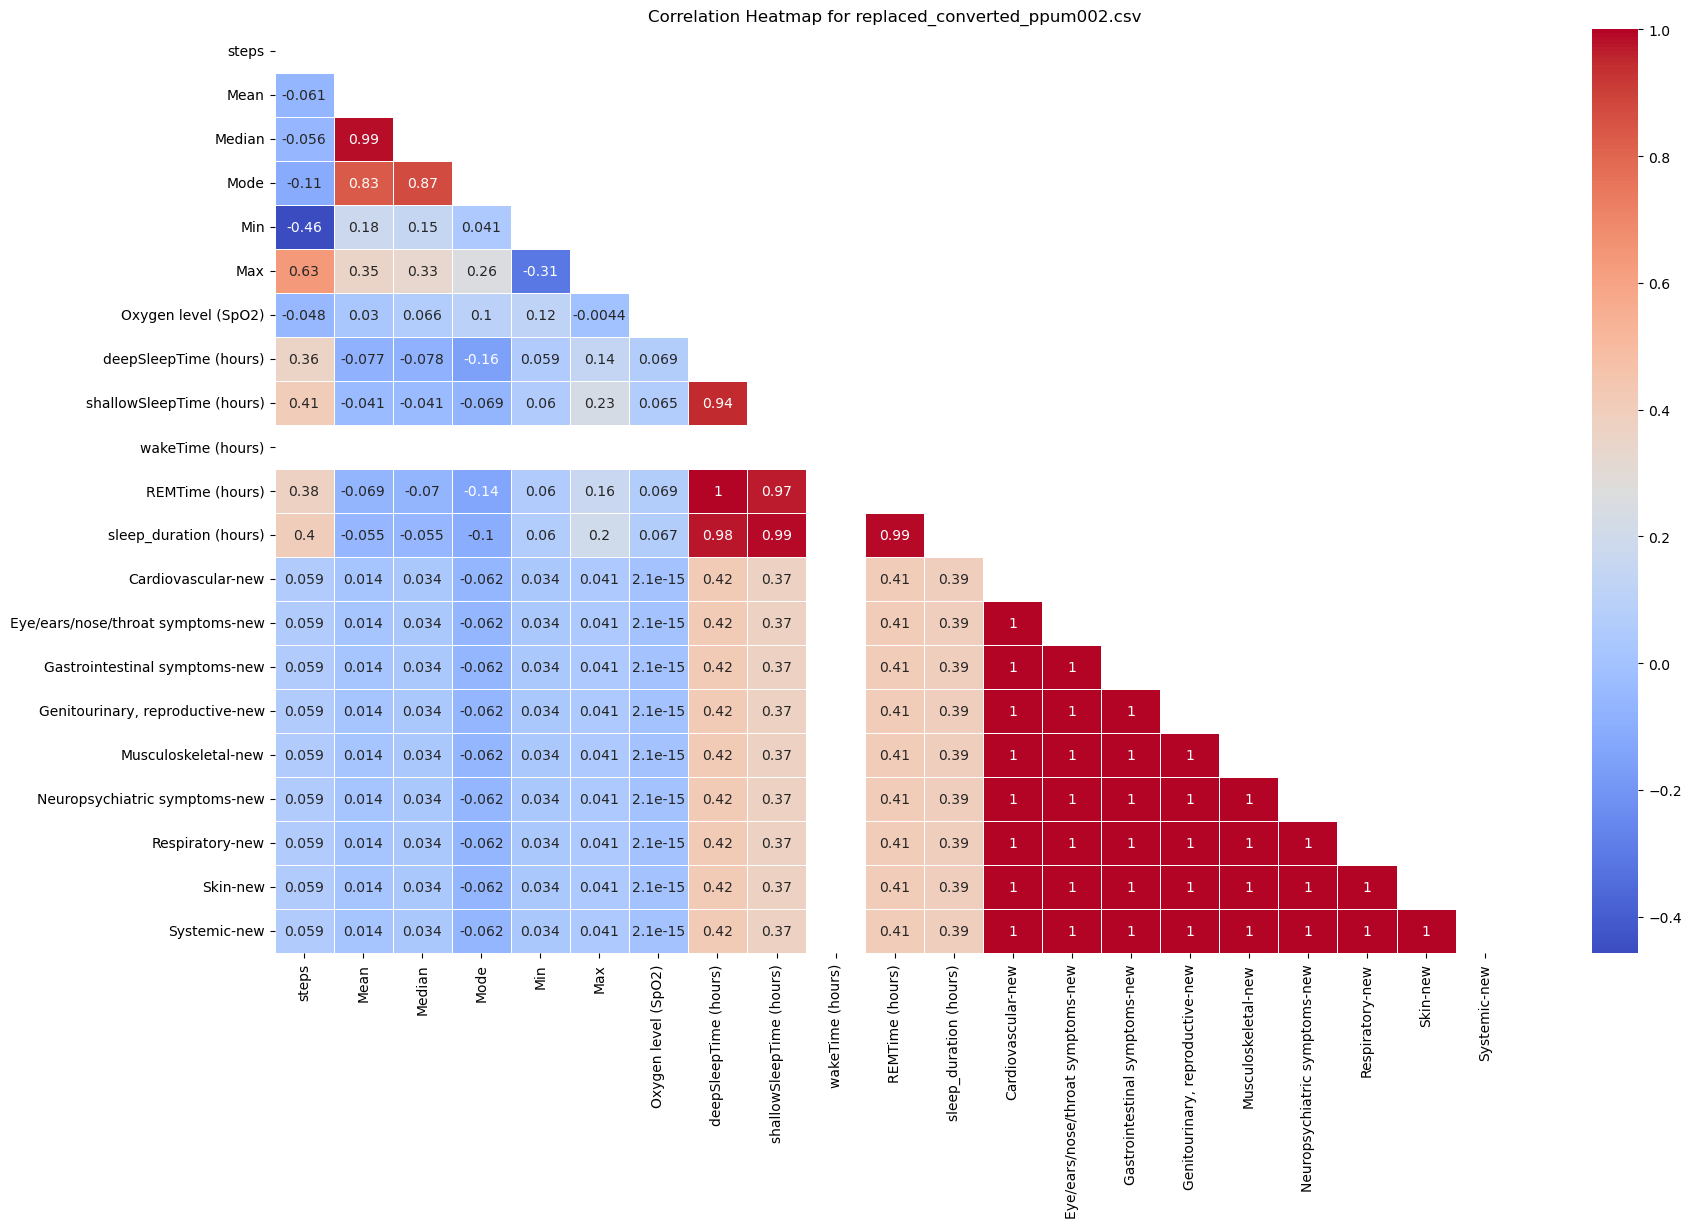

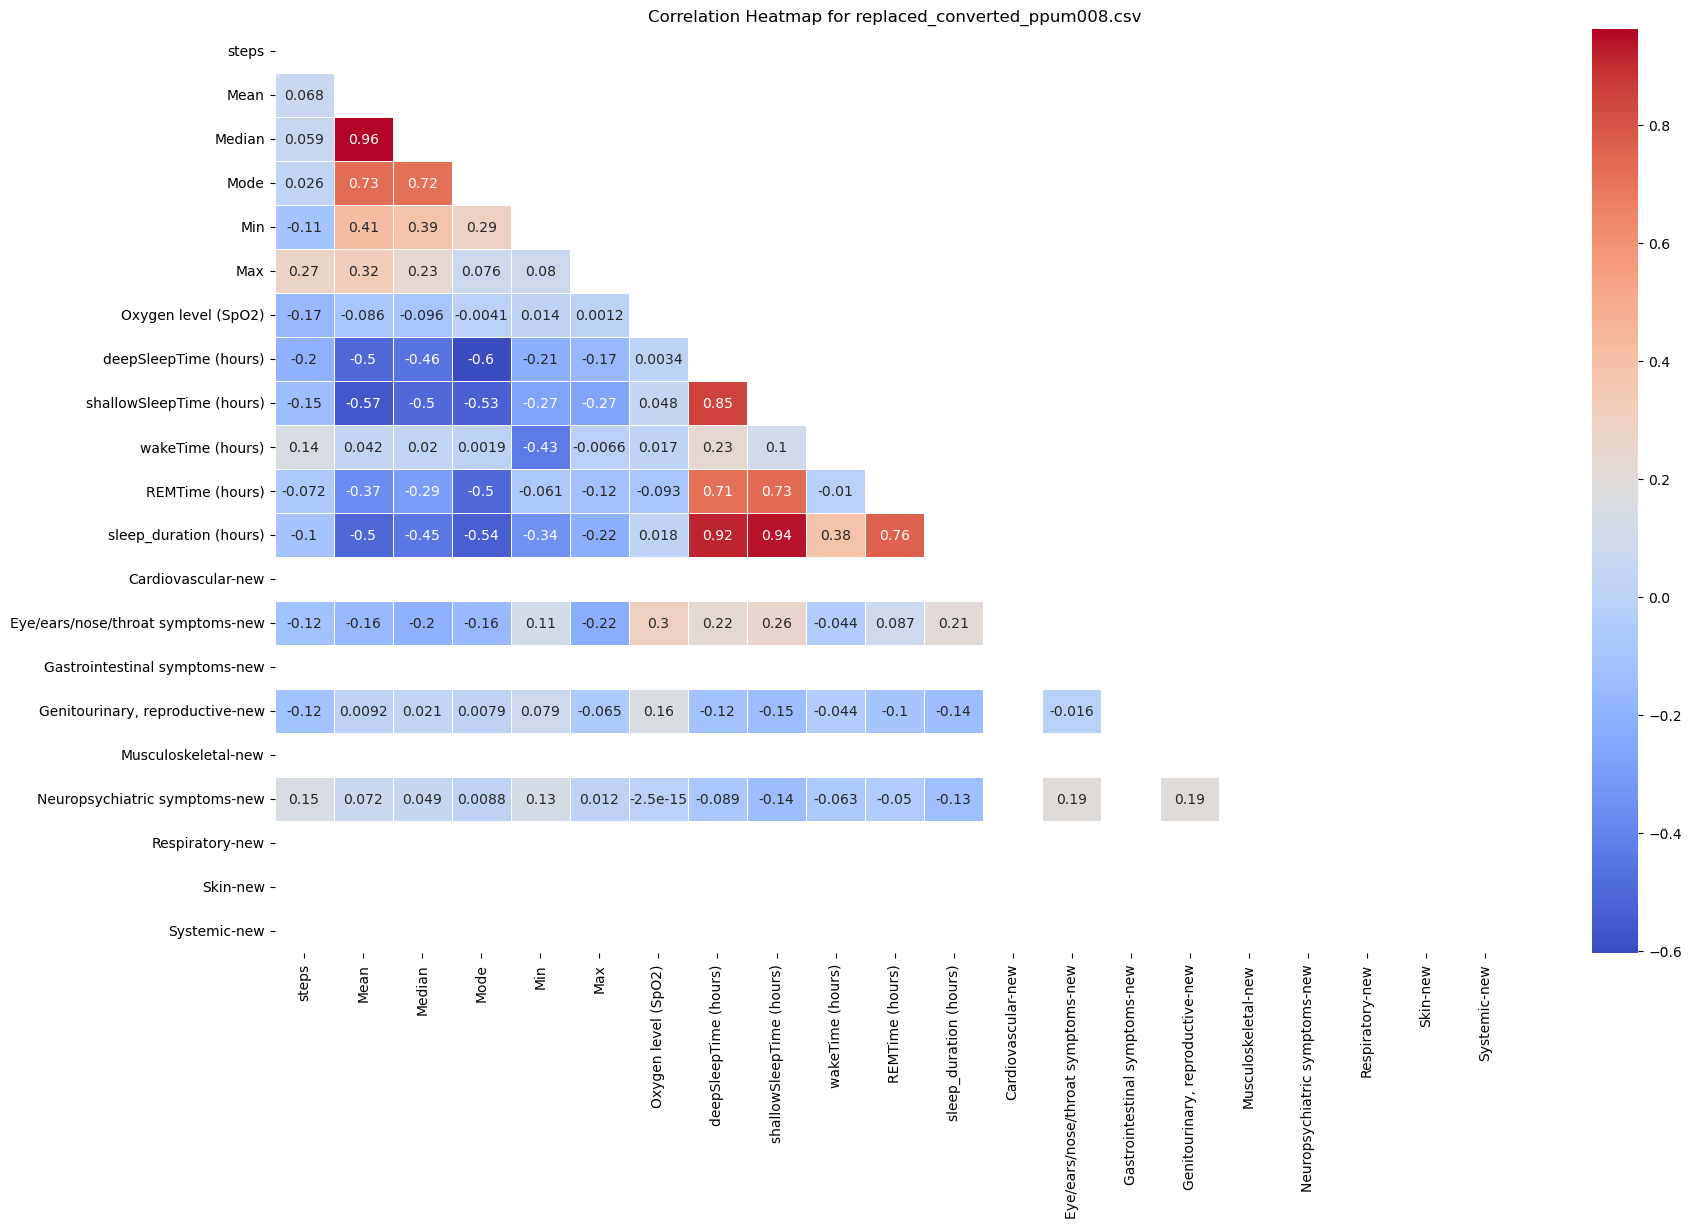

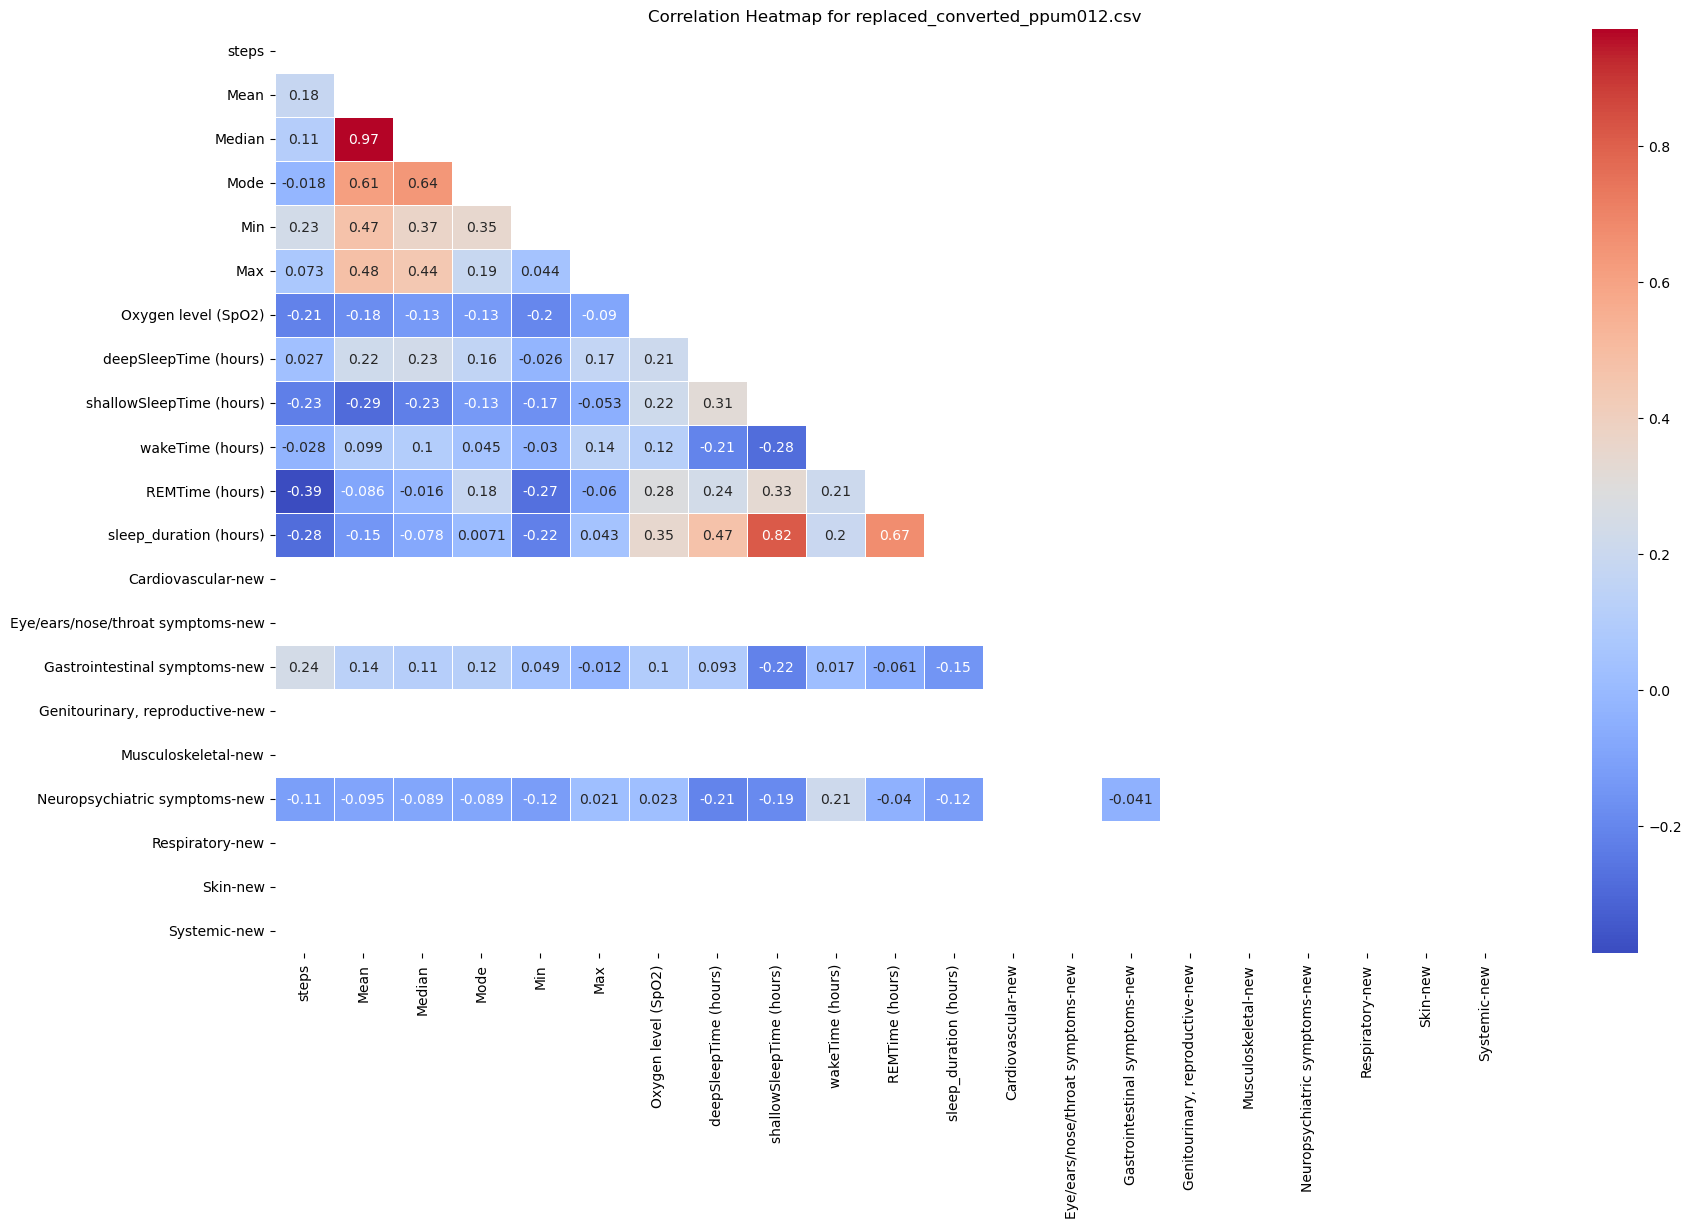

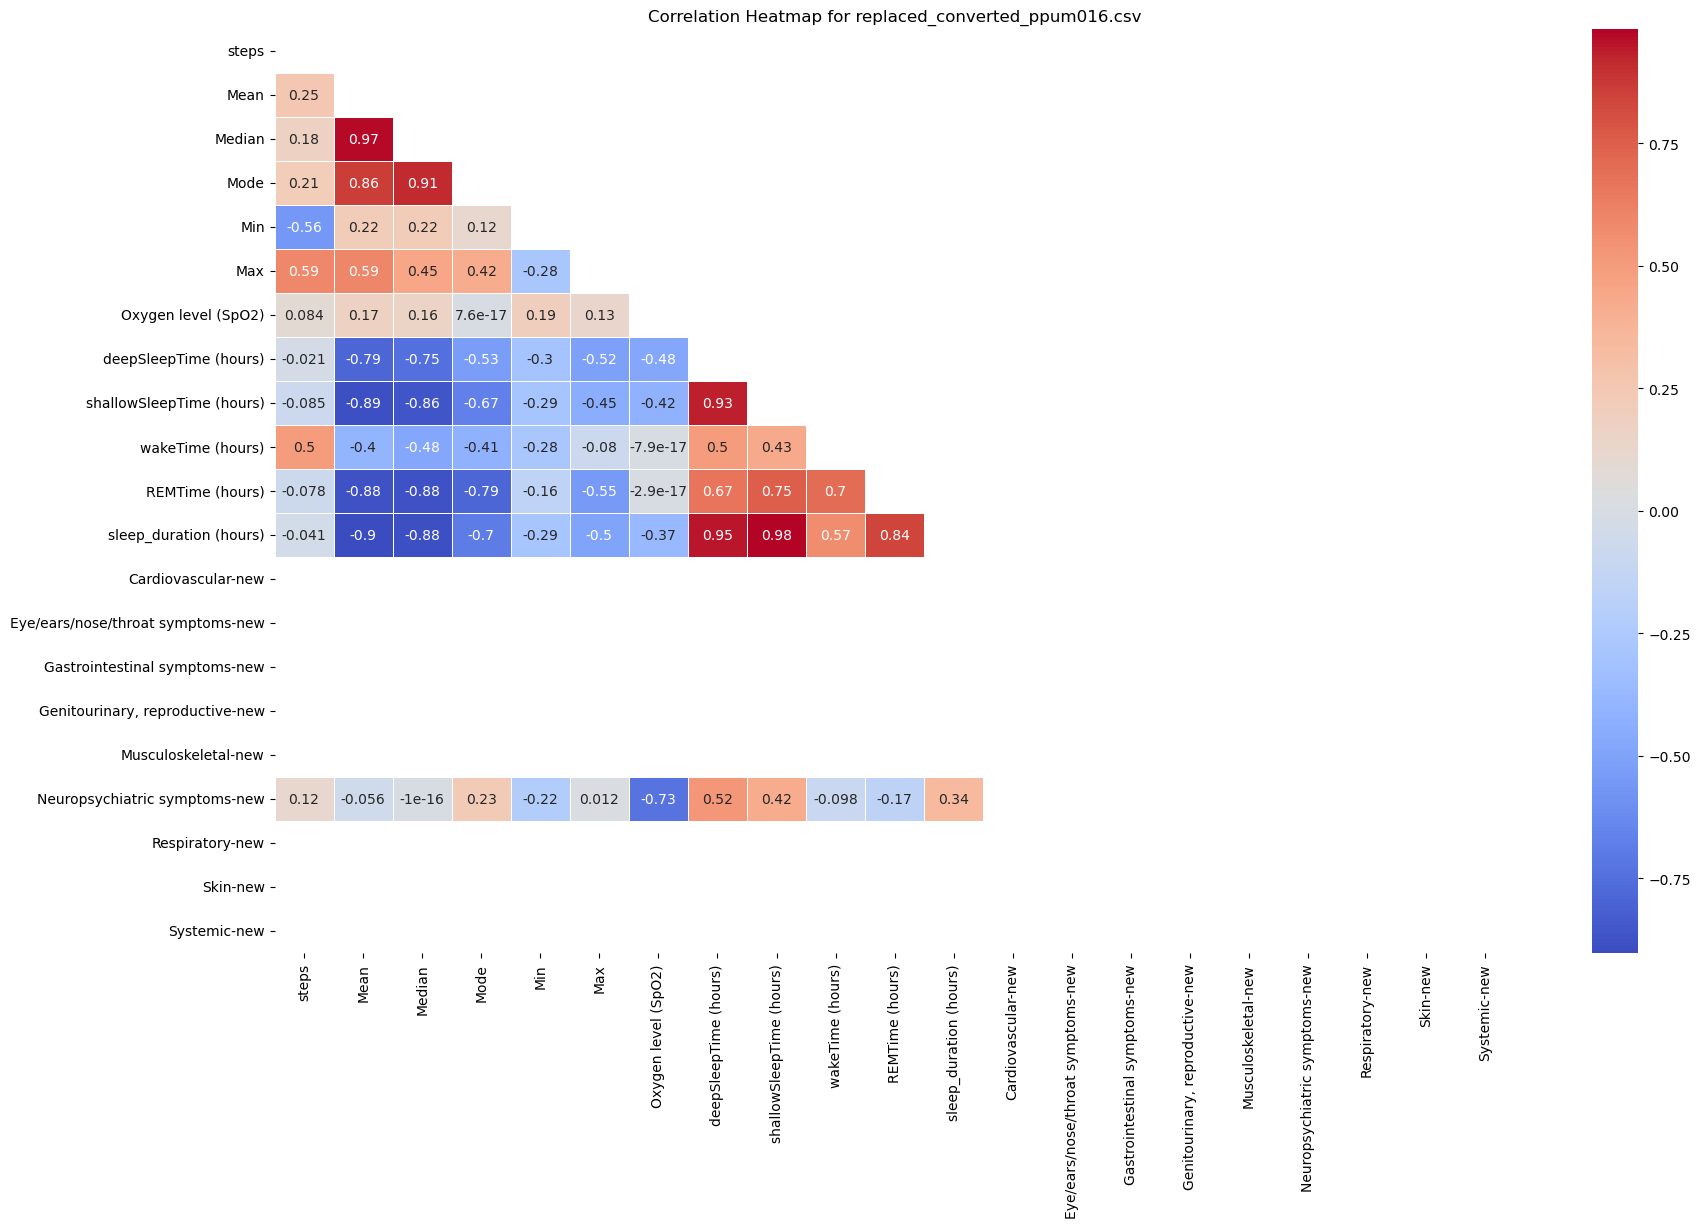

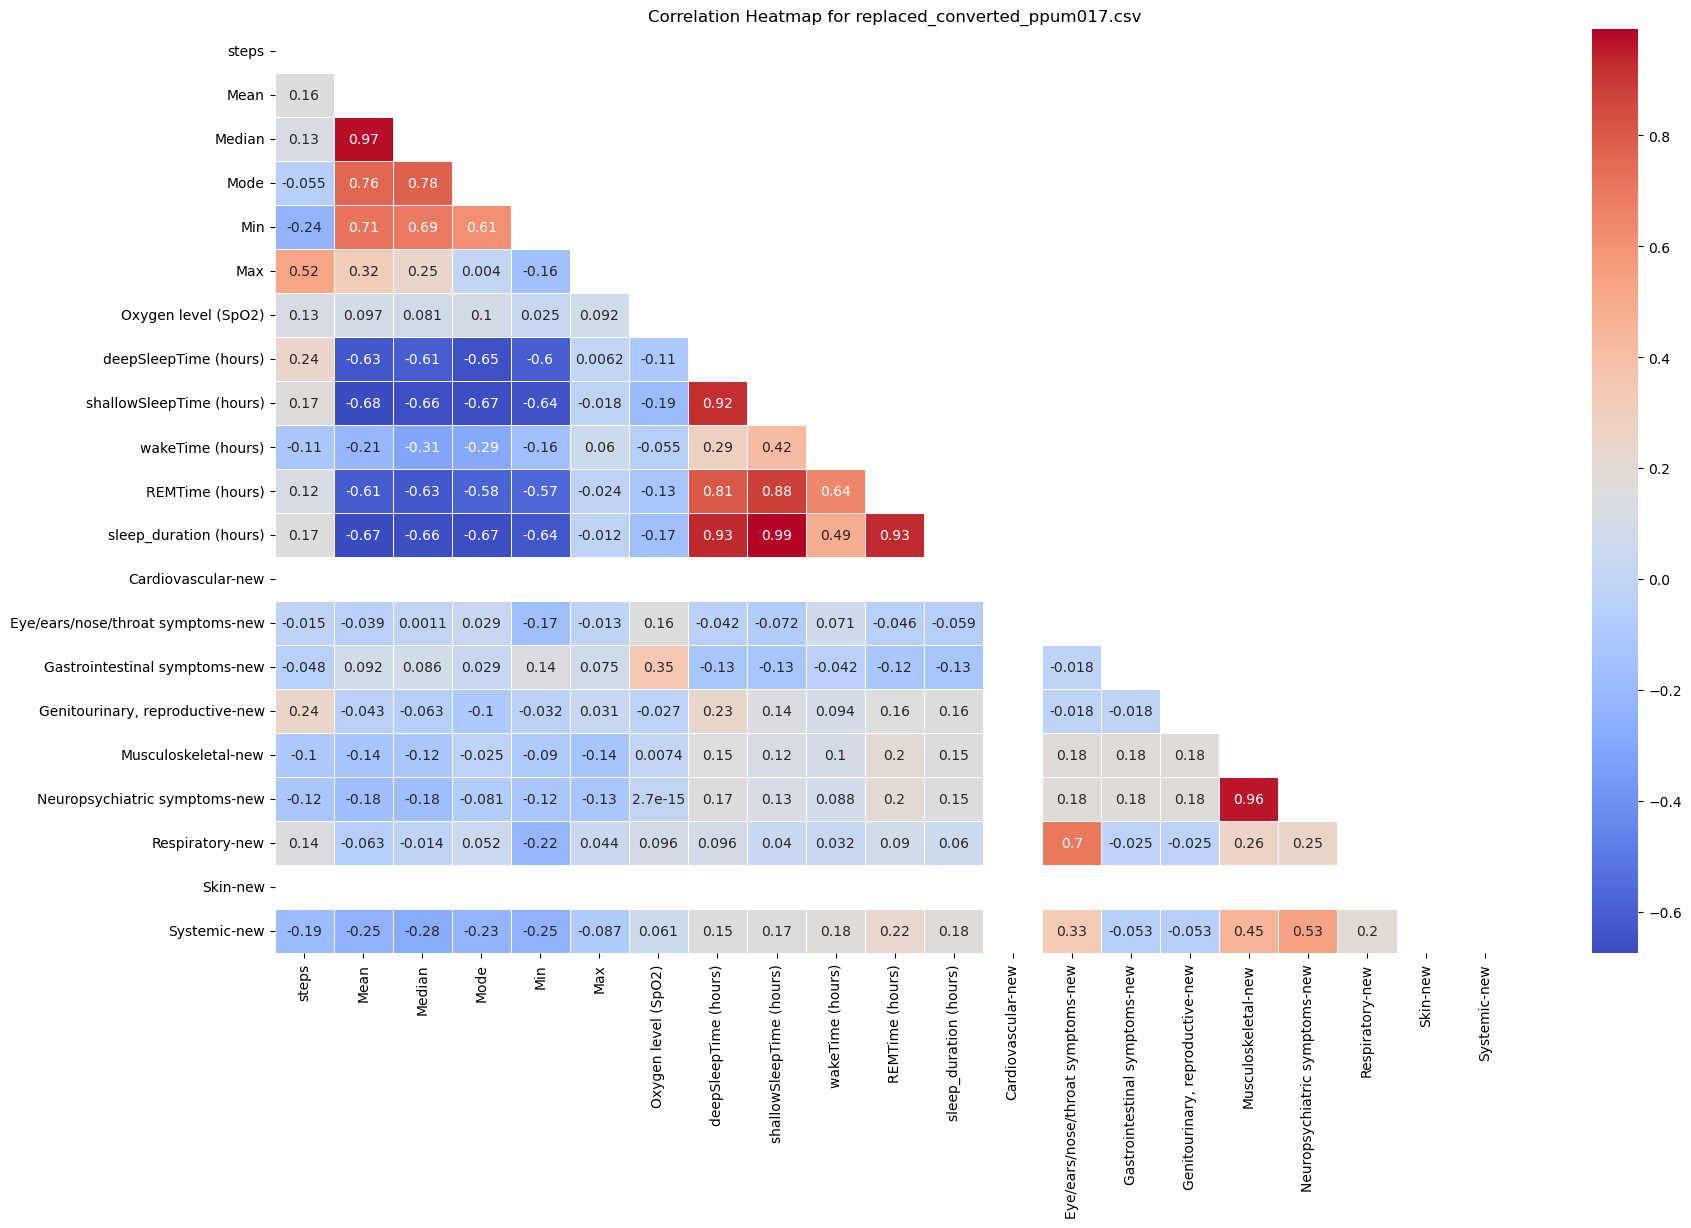

In [29]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/A -0-6_cleaned'

# Get a list of CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to your data and transform the data
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    correlation_matrix = df_normalized.corr()

    # Create a mask to display only the lower triangular part of the heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(20, 12))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Heatmap for {file}')

    # Print the correlation values for "Neuropsychiatric symptoms" and sort them in descending order
    neuropsychiatric_correlation = correlation_matrix['Neuropsychiatric symptoms-new'].sort_values(ascending=False)
    
    # Print the title in bold
    print('\033[1m' + f'Neuropsychiatric Symptoms Correlation for {file}' + '\033[0m')

    # Print the sorted correlation values
    print(neuropsychiatric_correlation)

Neuropsychiatric Symptoms Correlation for replaced_converted_modified_016.csv
Systemic-new                         1.000000
Neuropsychiatric symptoms-new        1.000000
Musculoskeletal-new                  1.000000
Gastrointestinal symptoms-new        1.000000
Cardiovascular-new                   0.350605
Max                                  0.308028
wakeTime (hours)                     0.207147
shallowSleepTime (hours)             0.077501
sleep_duration (hours)               0.052857
Oxygen level (SpO2)                 -0.049755
deepSleepTime (hours)               -0.077428
REMTime (hours)                     -0.093412
Min                                 -0.208567
steps                               -0.210667
Mean                                -0.214747
Median                              -0.245736
Mode                                -0.290324
Eye/ears/nose/throat symptoms-new         NaN
Genitourinary, reproductive-new           NaN
Respiratory-new                           NaN
Sk

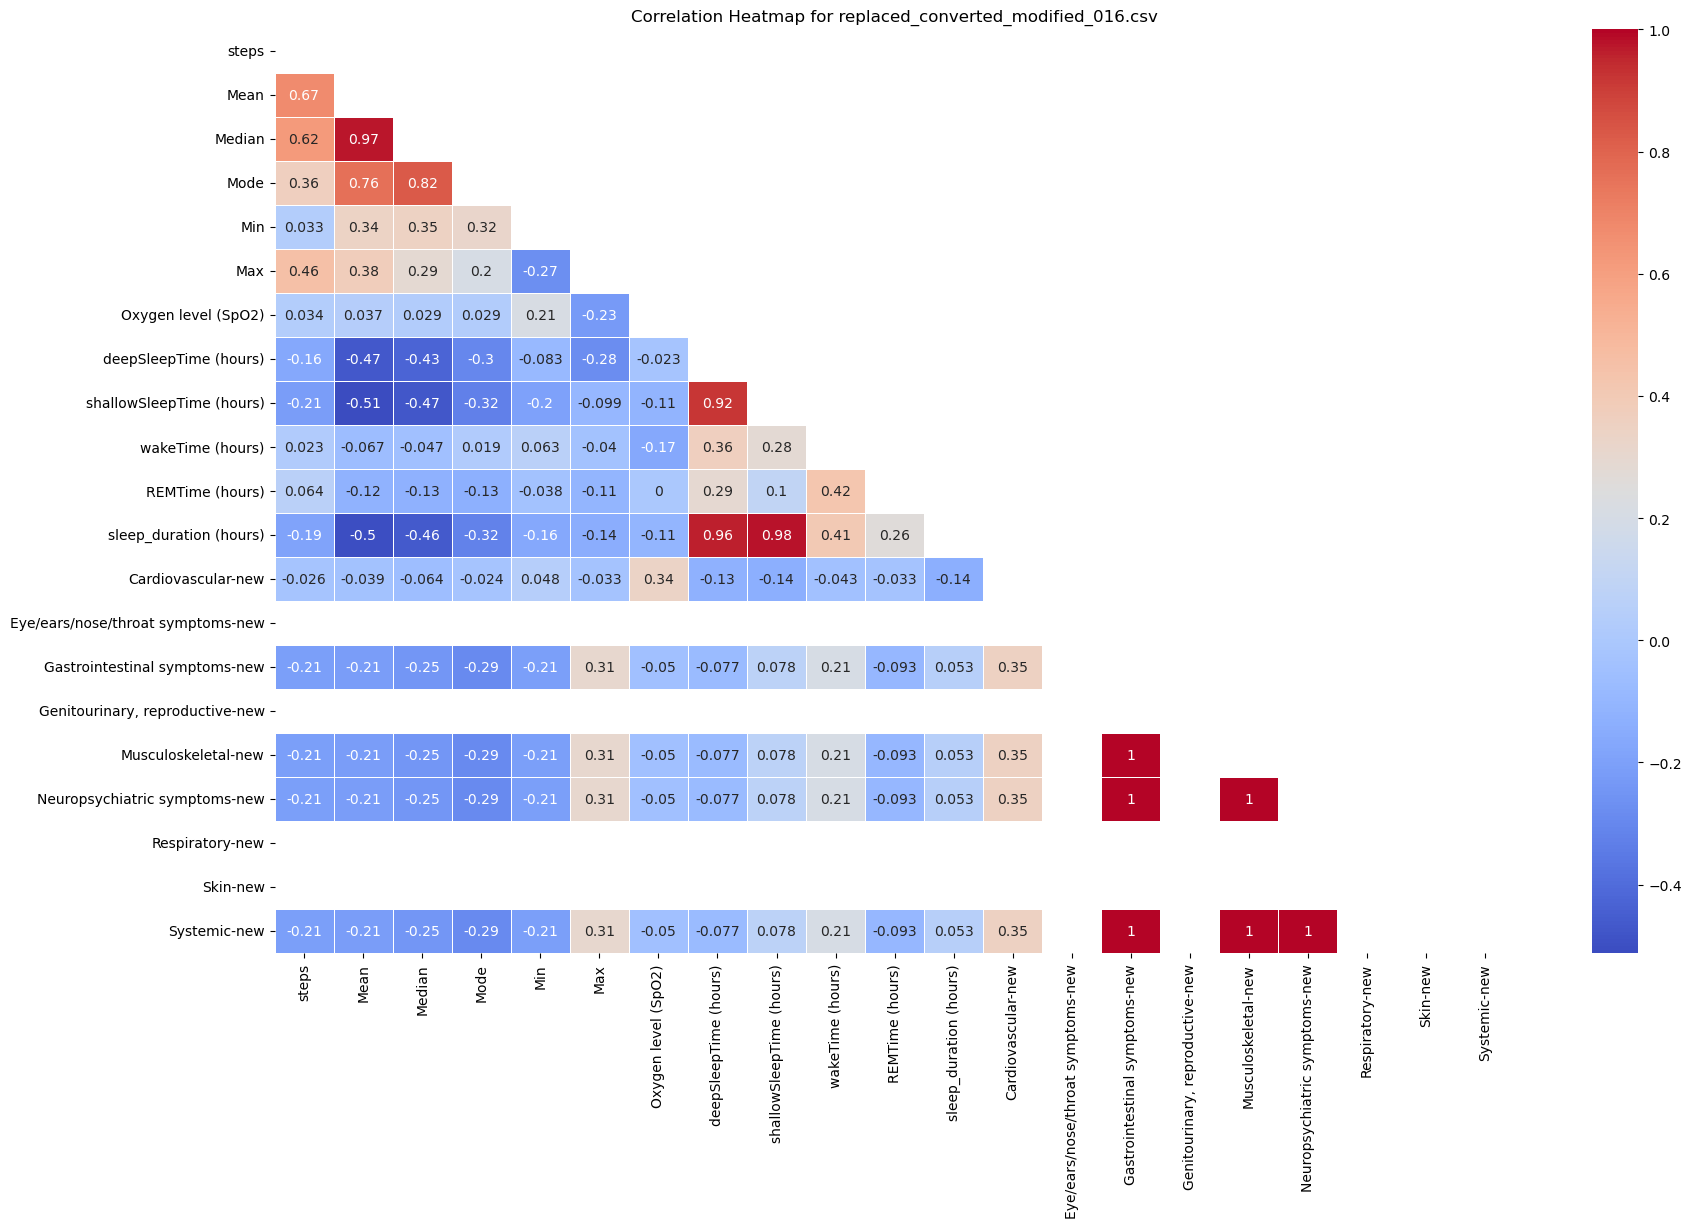

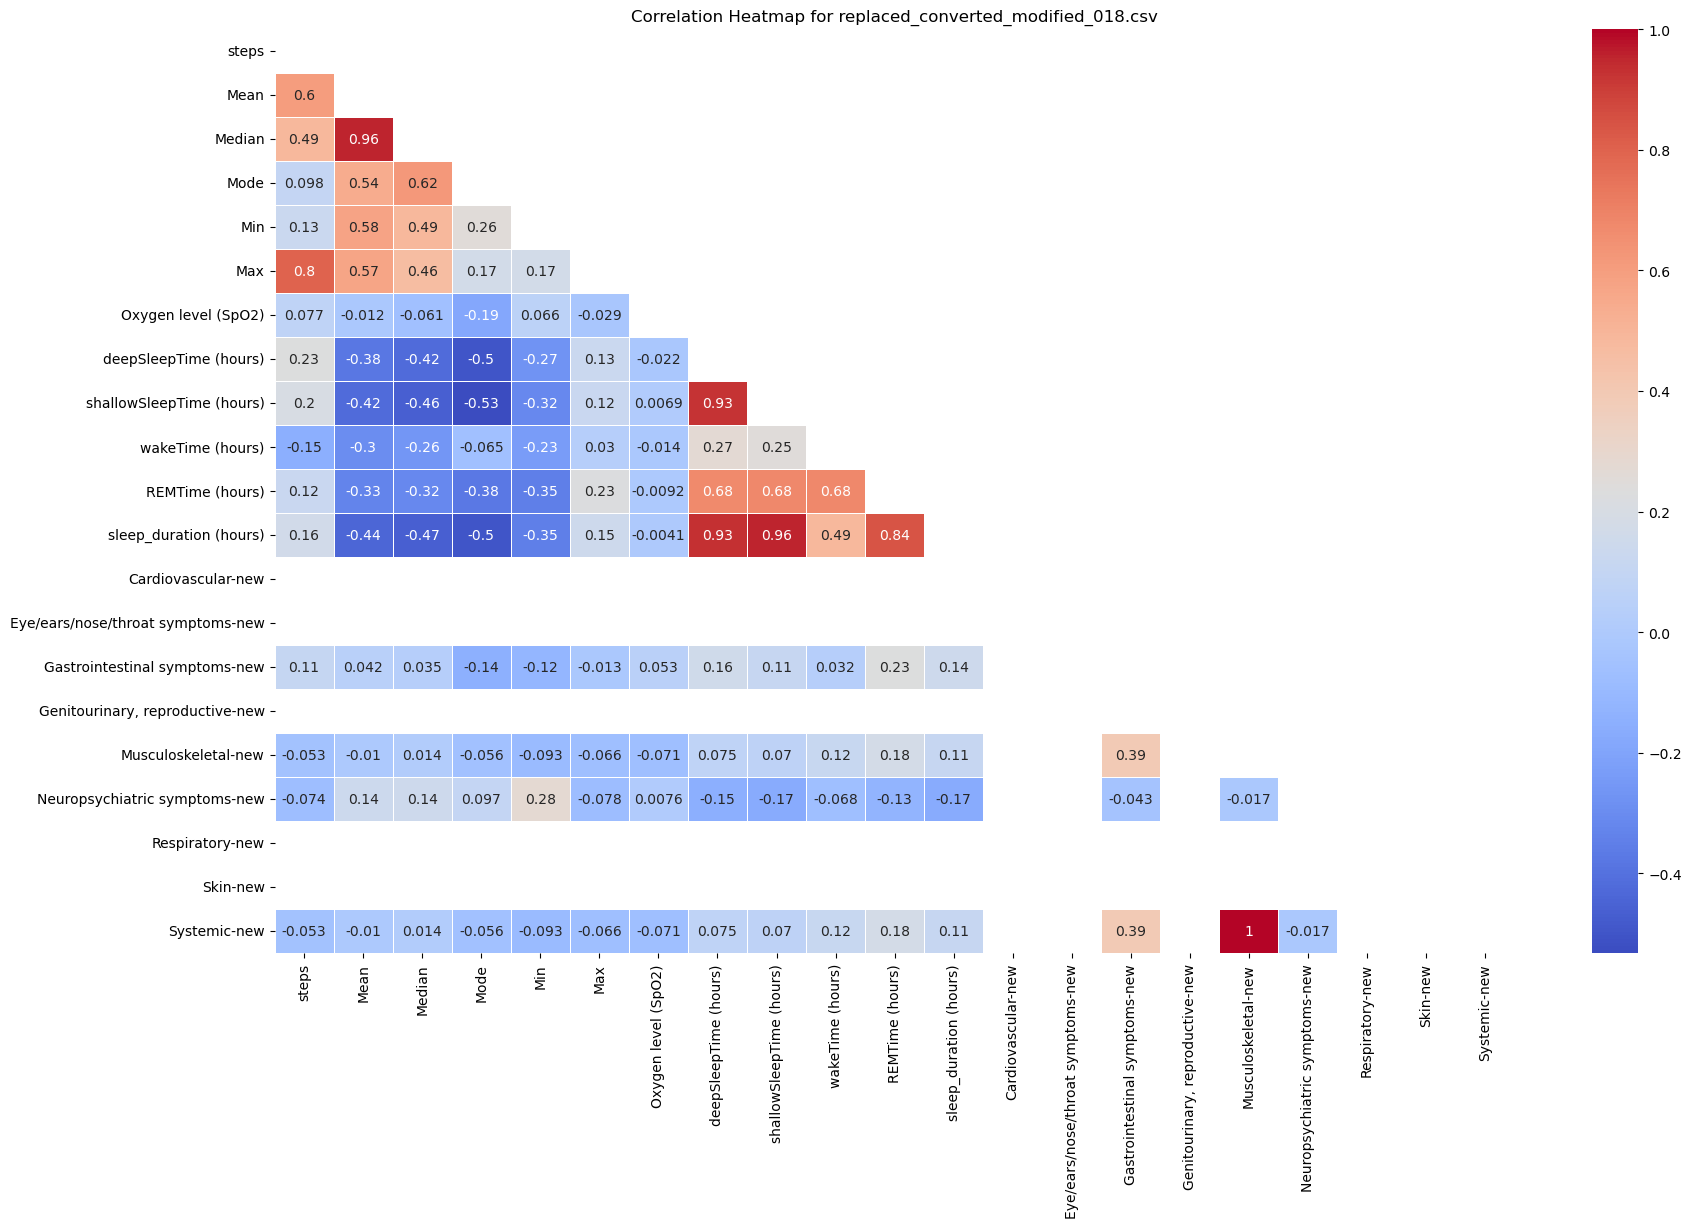

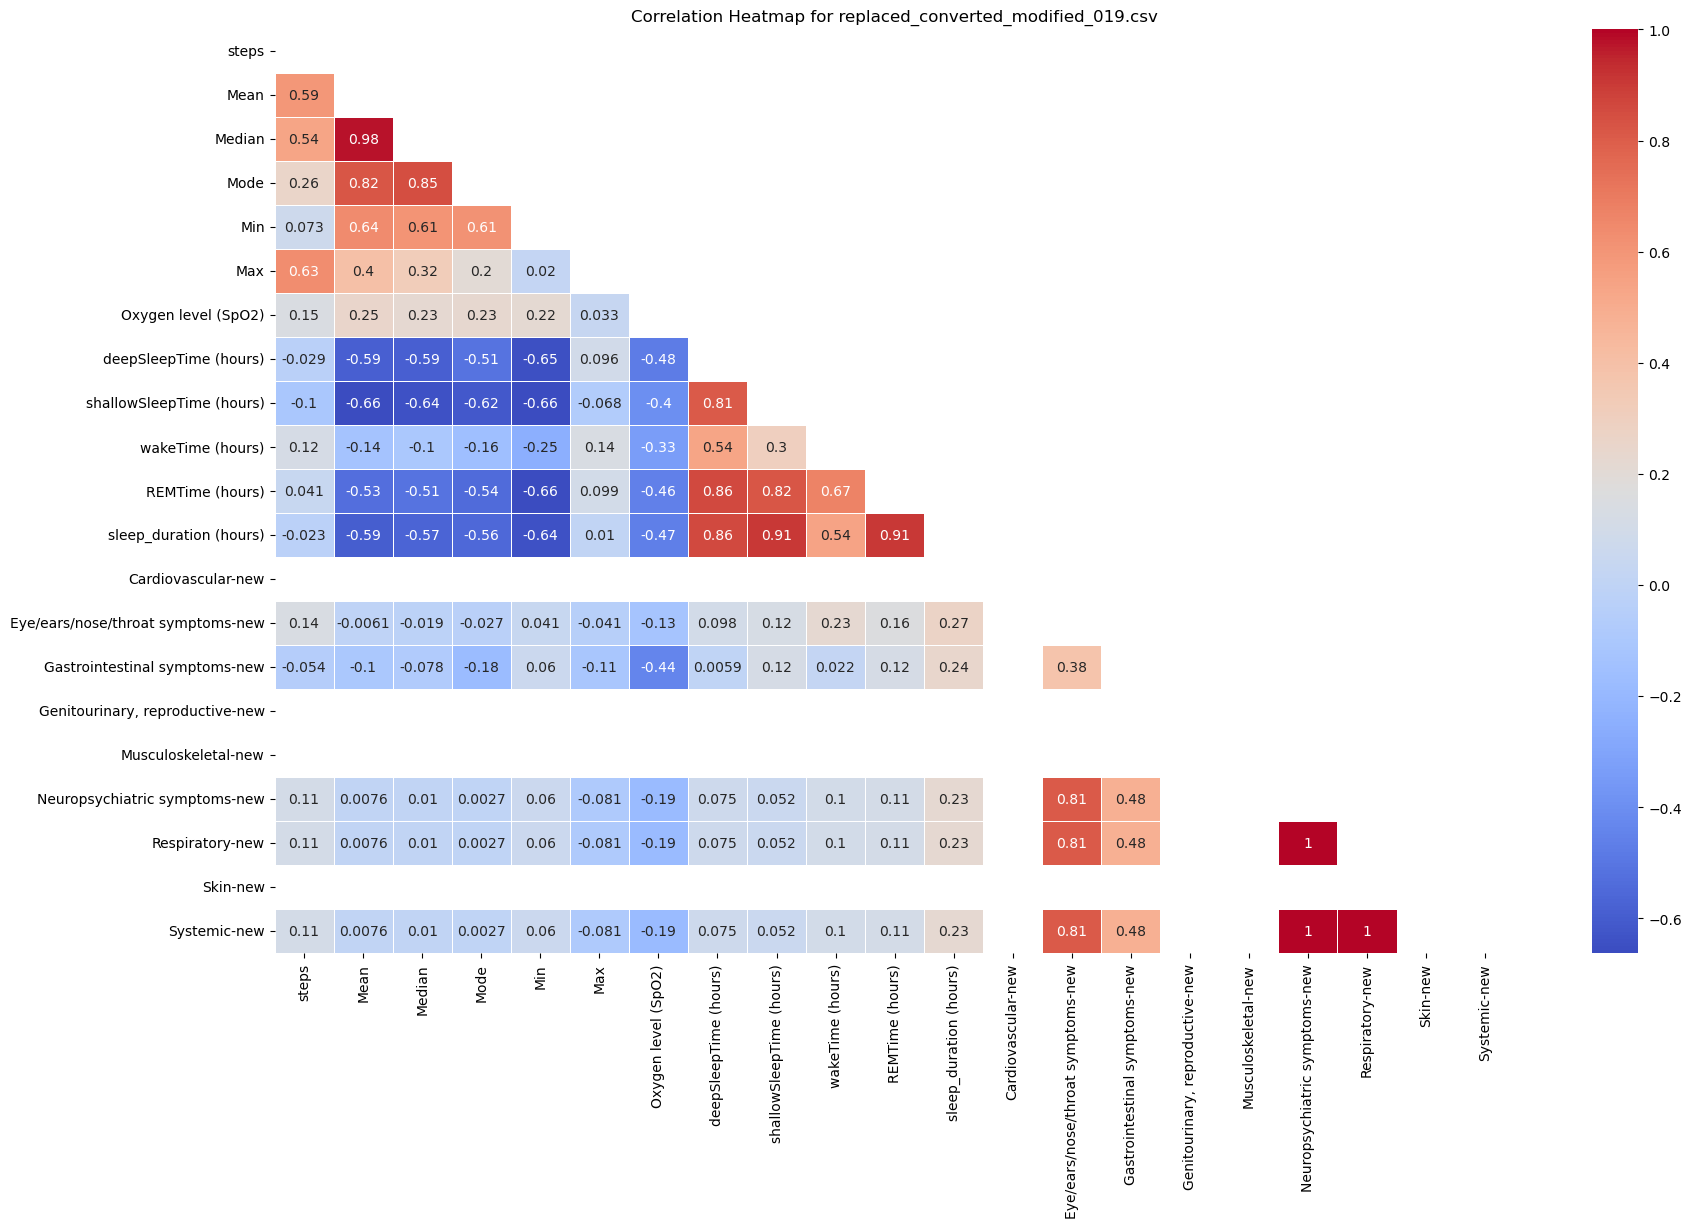

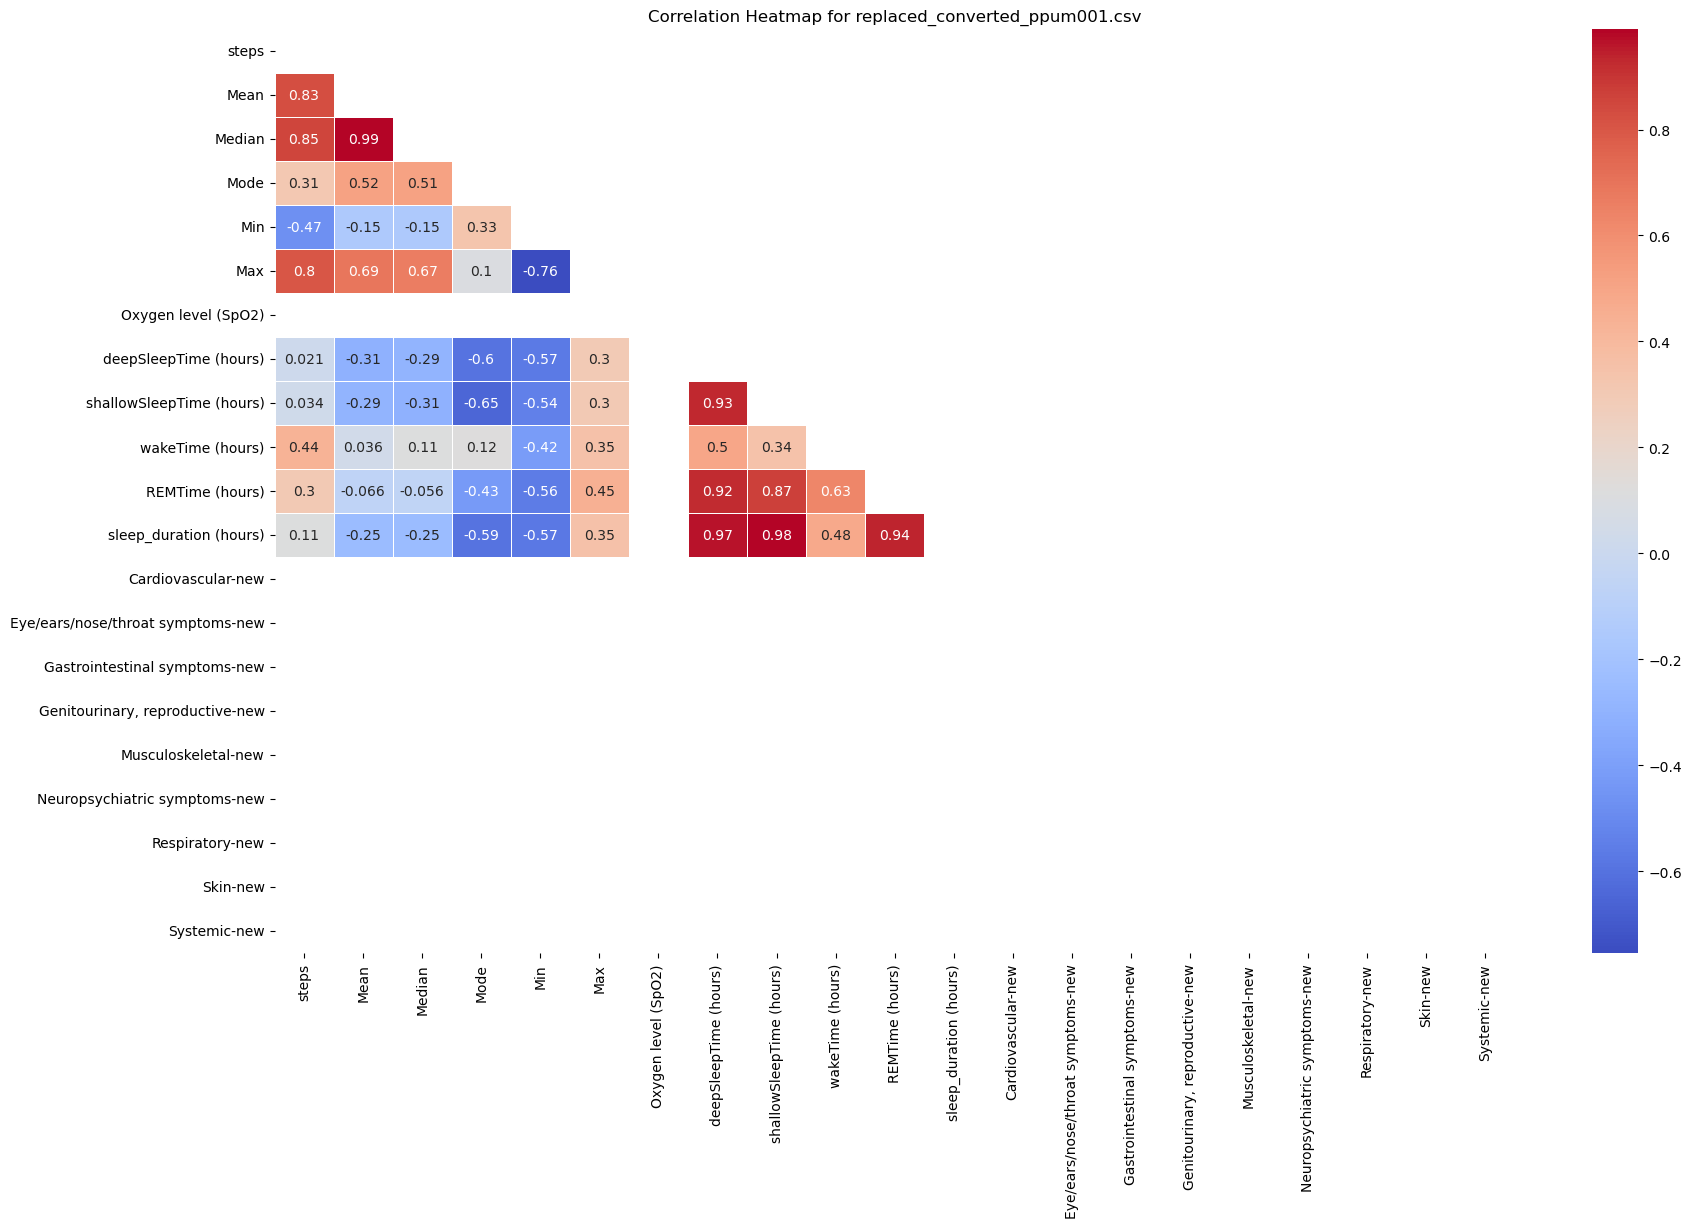

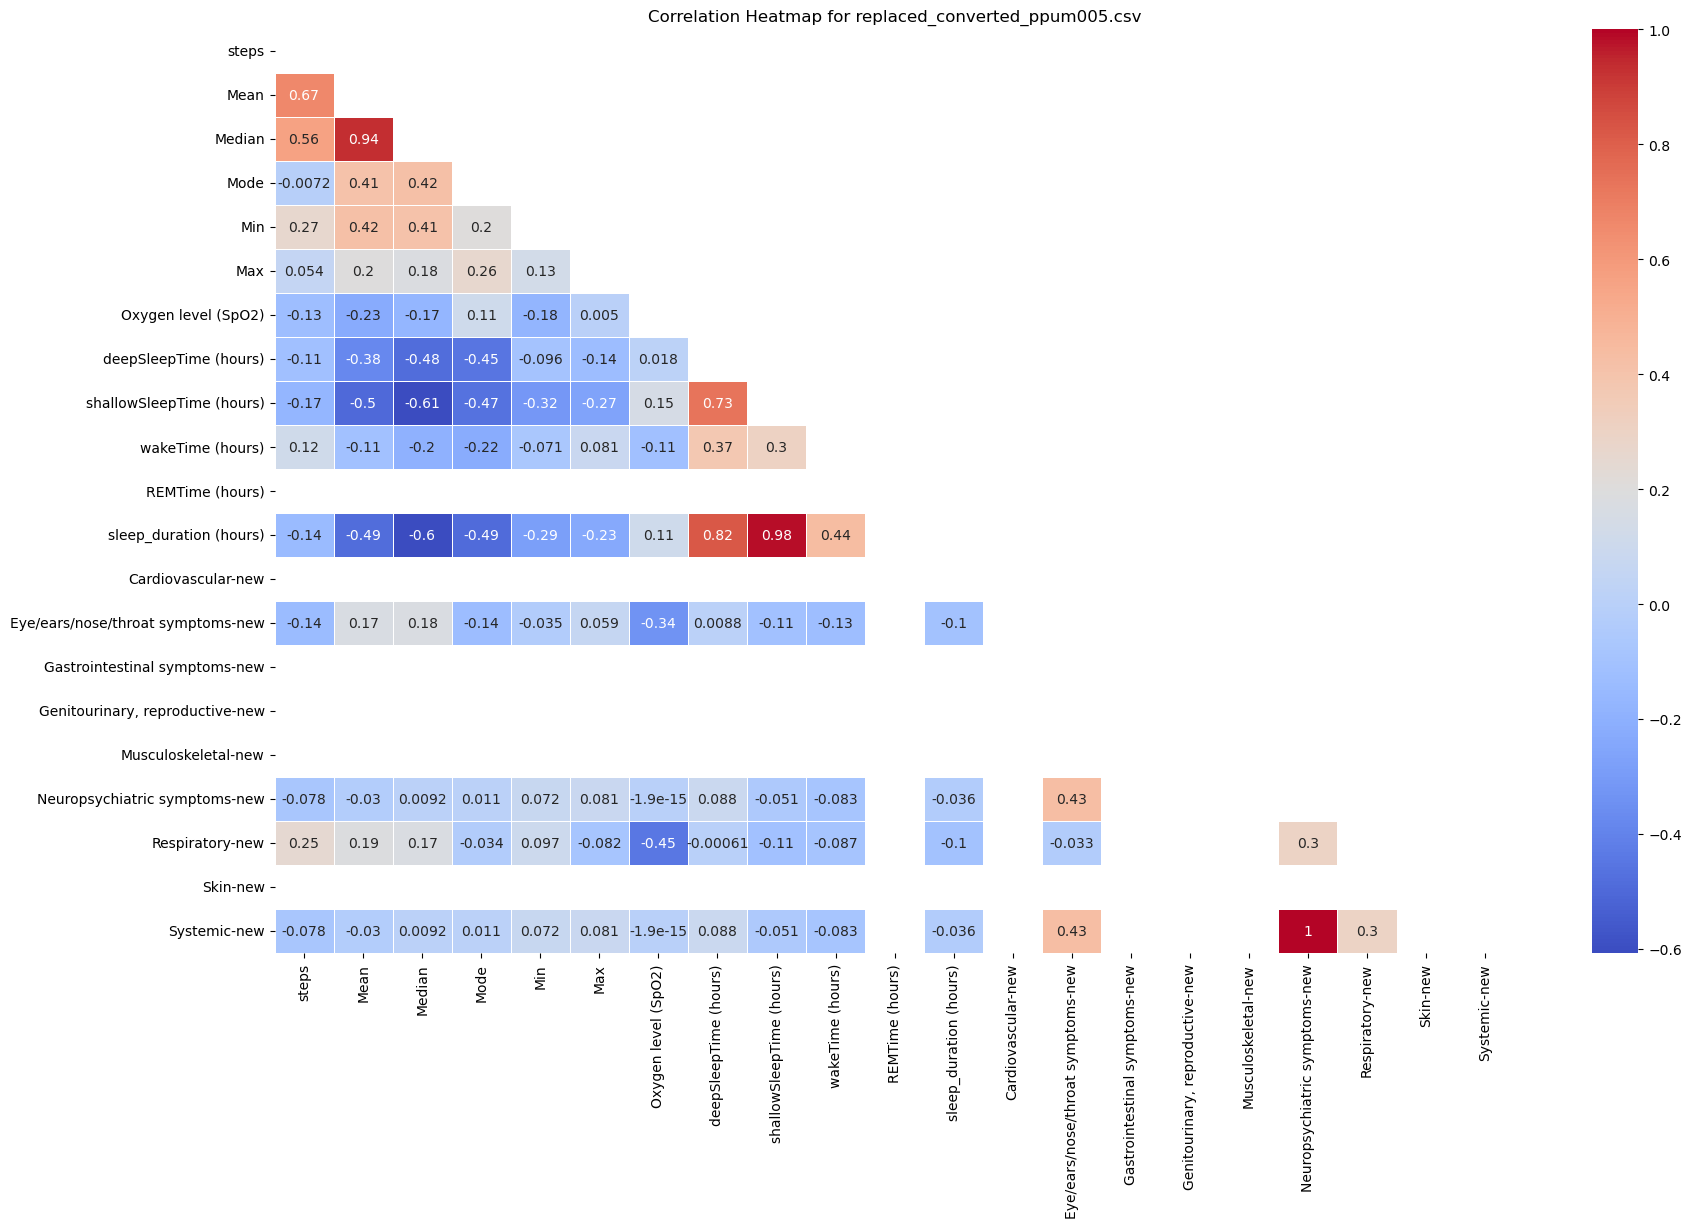

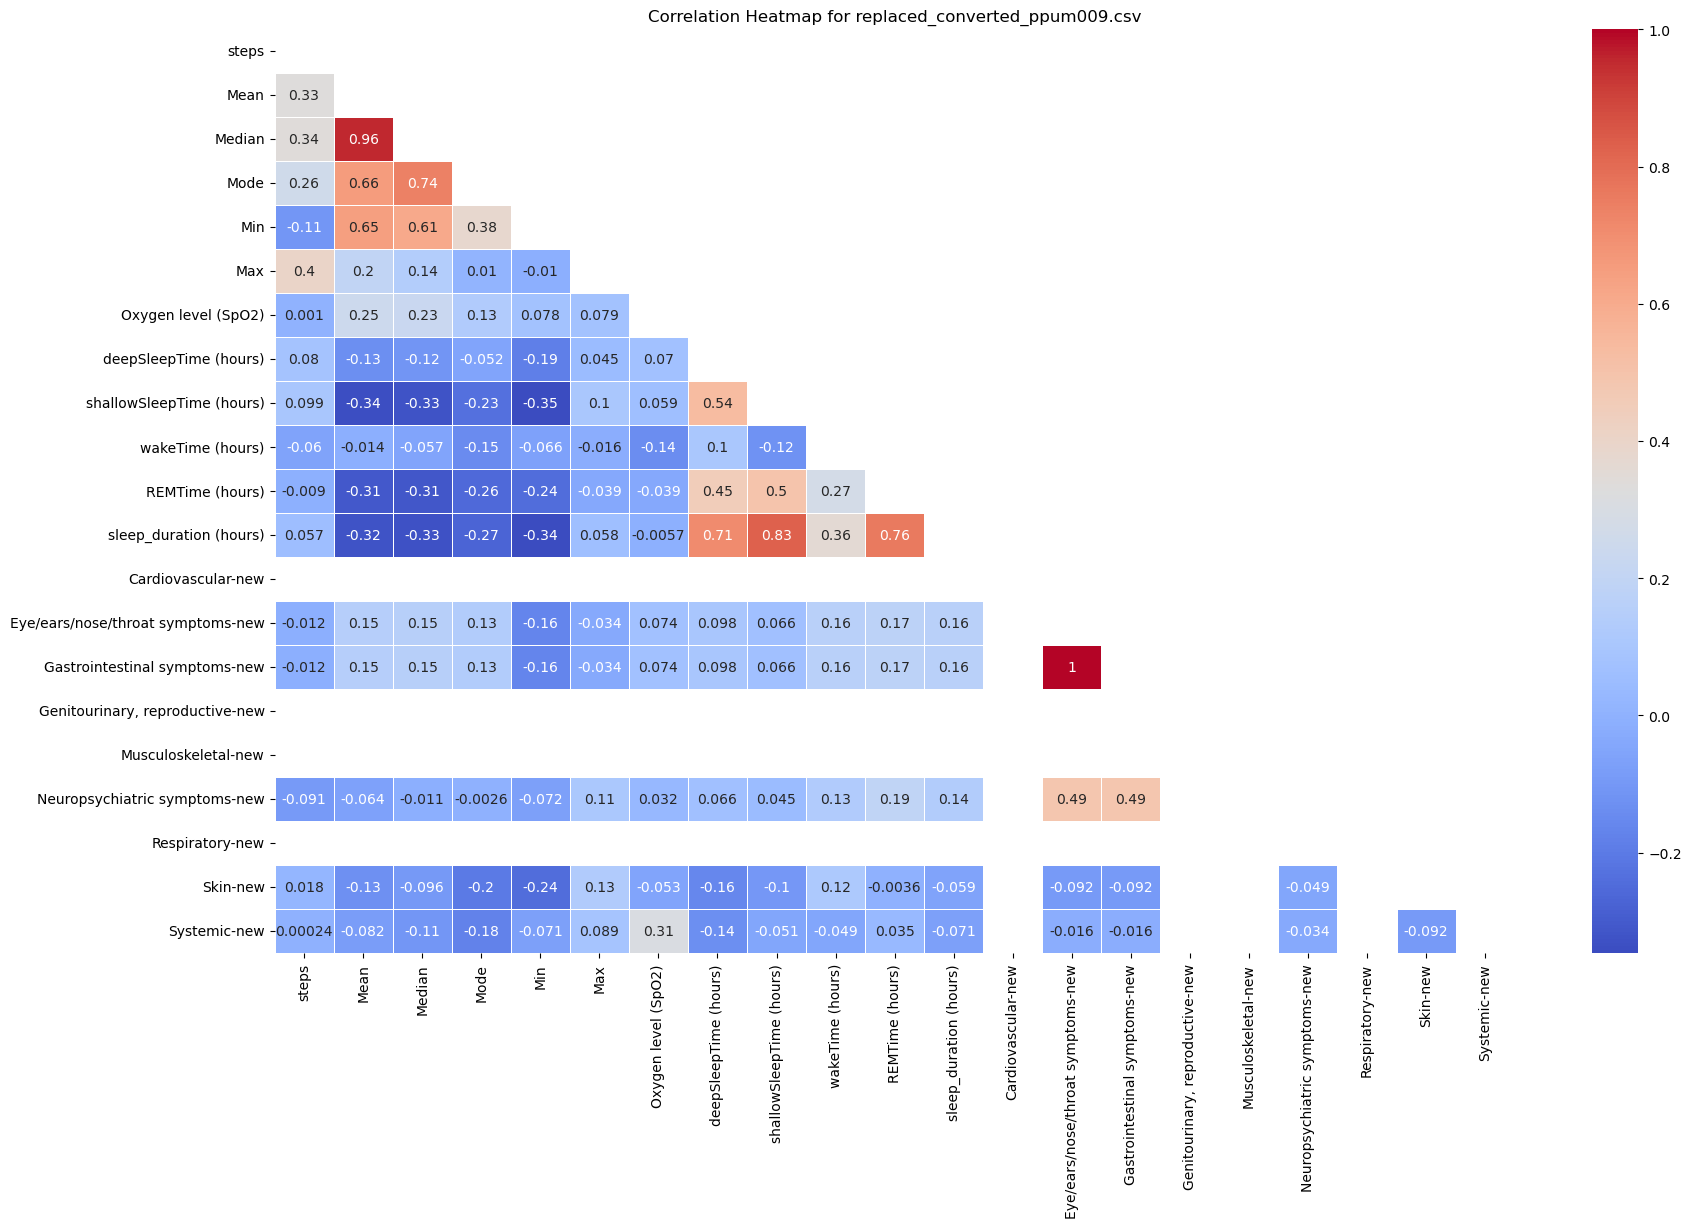

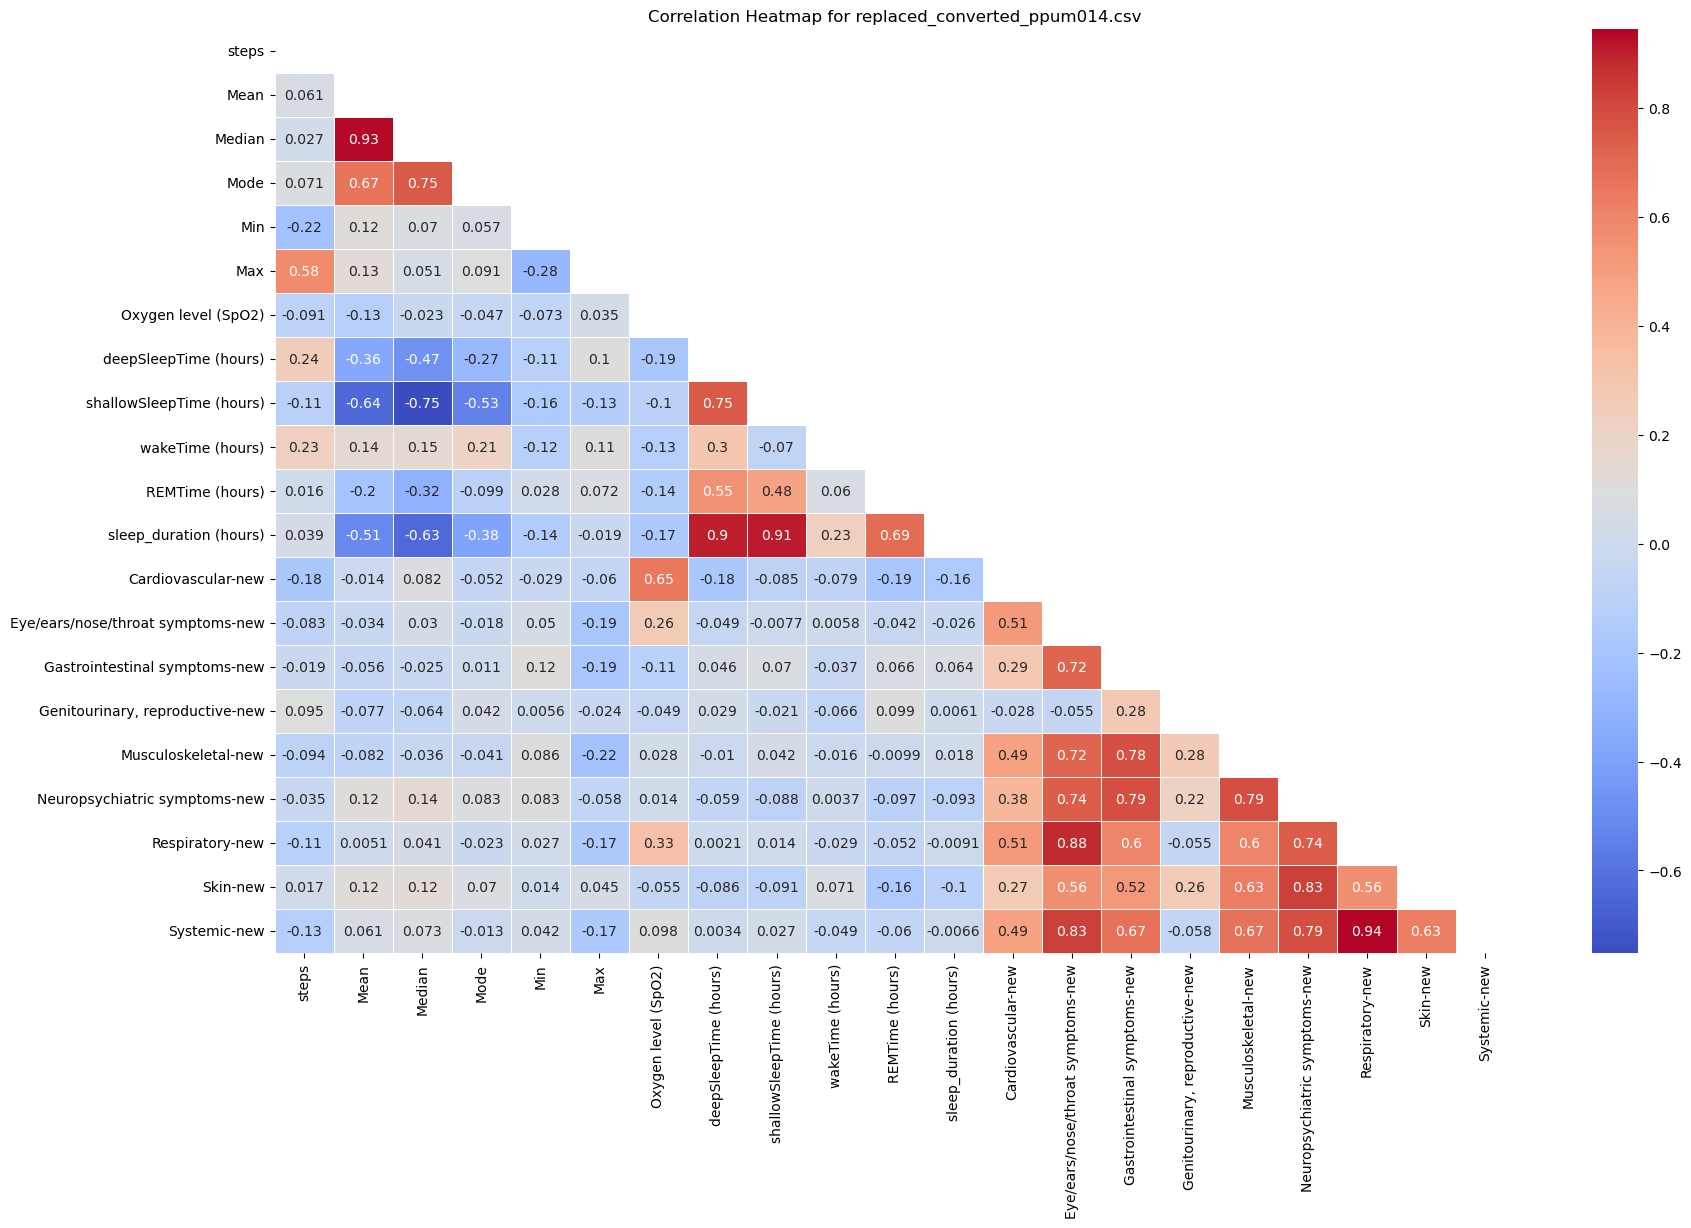

In [30]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/B - MORE THAN 6_2_cleaned'

# Get a list of CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to your data and transform the data
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    correlation_matrix = df_normalized.corr()

    # Create a mask to display only the lower triangular part of the heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(20, 12))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Heatmap for {file}')

    # Print the correlation values for "Neuropsychiatric symptoms" and sort them in descending order
    neuropsychiatric_correlation = correlation_matrix['Neuropsychiatric symptoms-new'].sort_values(ascending=False)
    
    # Print the title in bold
    print('\033[1m' + f'Neuropsychiatric Symptoms Correlation for {file}' + '\033[0m')

    # Print the sorted correlation values
    print(neuropsychiatric_correlation)

## COVID correlation (same_months)

Neuropsychiatric Symptoms Correlation for replaced_converted_modified_011.csv
Neuropsychiatric symptoms-new    1.000000
Oxygen level (SpO2)              0.628539
Mode                             0.512129
Mean                             0.279384
Median                           0.276476
REMTime (hours)                  0.142676
shallowSleepTime (hours)         0.010425
wakeTime (hours)                 0.005651
sleep_duration (hours)           0.000944
Max                             -0.138138
Min                             -0.178088
deepSleepTime (hours)           -0.200448
steps                           -0.246573
Name: Neuropsychiatric symptoms-new, dtype: float64
Neuropsychiatric Symptoms Correlation for replaced_converted_modified_015.csv
Neuropsychiatric symptoms-new    1.000000
Oxygen level (SpO2)              0.535407
deepSleepTime (hours)           -0.026316
shallowSleepTime (hours)        -0.026316
wakeTime (hours)                -0.026316
sleep_duration (hours)          -0.0

Neuropsychiatric Symptoms Correlation for replaced_converted_ppum016.csv
Neuropsychiatric symptoms-new    1.000000e+00
deepSleepTime (hours)            5.229307e-01
shallowSleepTime (hours)         4.193816e-01
sleep_duration (hours)           3.373381e-01
Mode                             2.292984e-01
steps                            1.189302e-01
Max                              1.211978e-02
Median                          -1.005507e-16
Mean                            -5.567796e-02
wakeTime (hours)                -9.774336e-02
REMTime (hours)                 -1.659188e-01
Min                             -2.217955e-01
Oxygen level (SpO2)             -7.302967e-01
Name: Neuropsychiatric symptoms-new, dtype: float64
Neuropsychiatric Symptoms Correlation for replaced_converted_ppum017.csv
Neuropsychiatric symptoms-new    1.000000e+00
REMTime (hours)                  1.955482e-01
deepSleepTime (hours)            1.668533e-01
sleep_duration (hours)           1.507188e-01
shallowSleepTime (ho

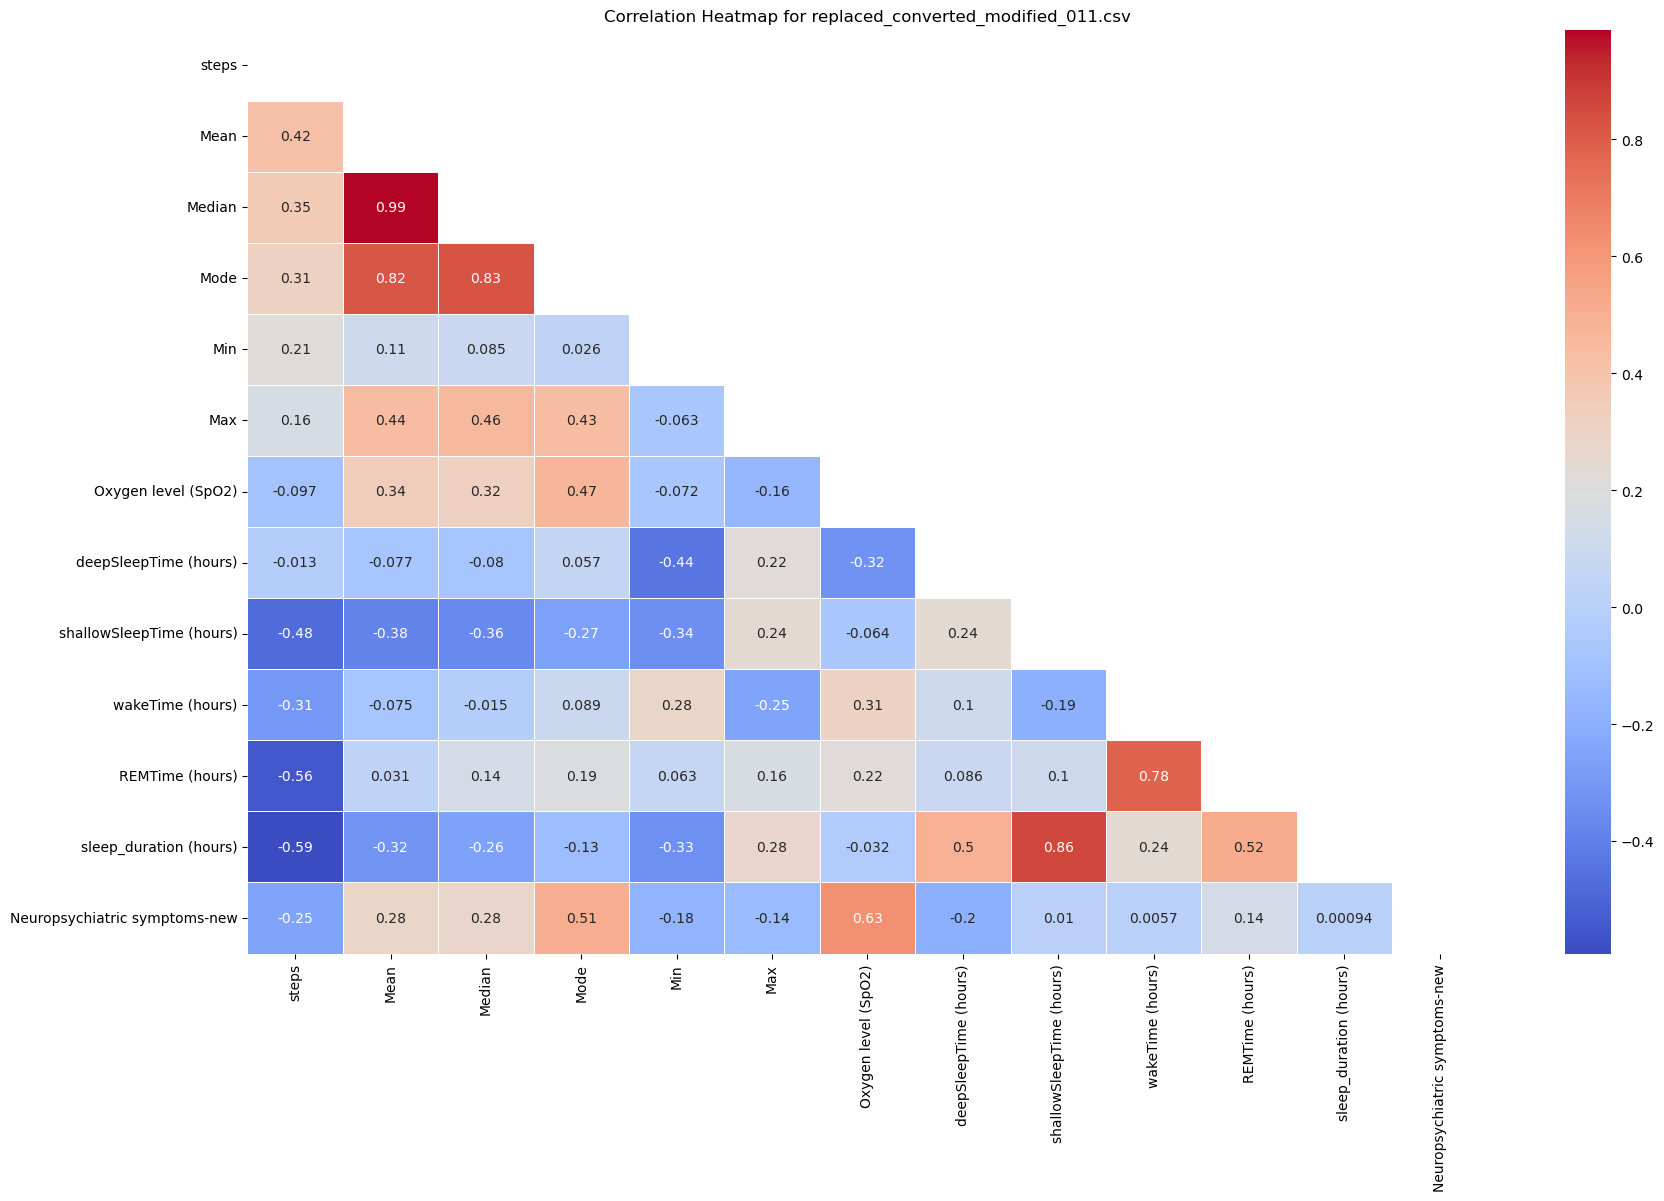

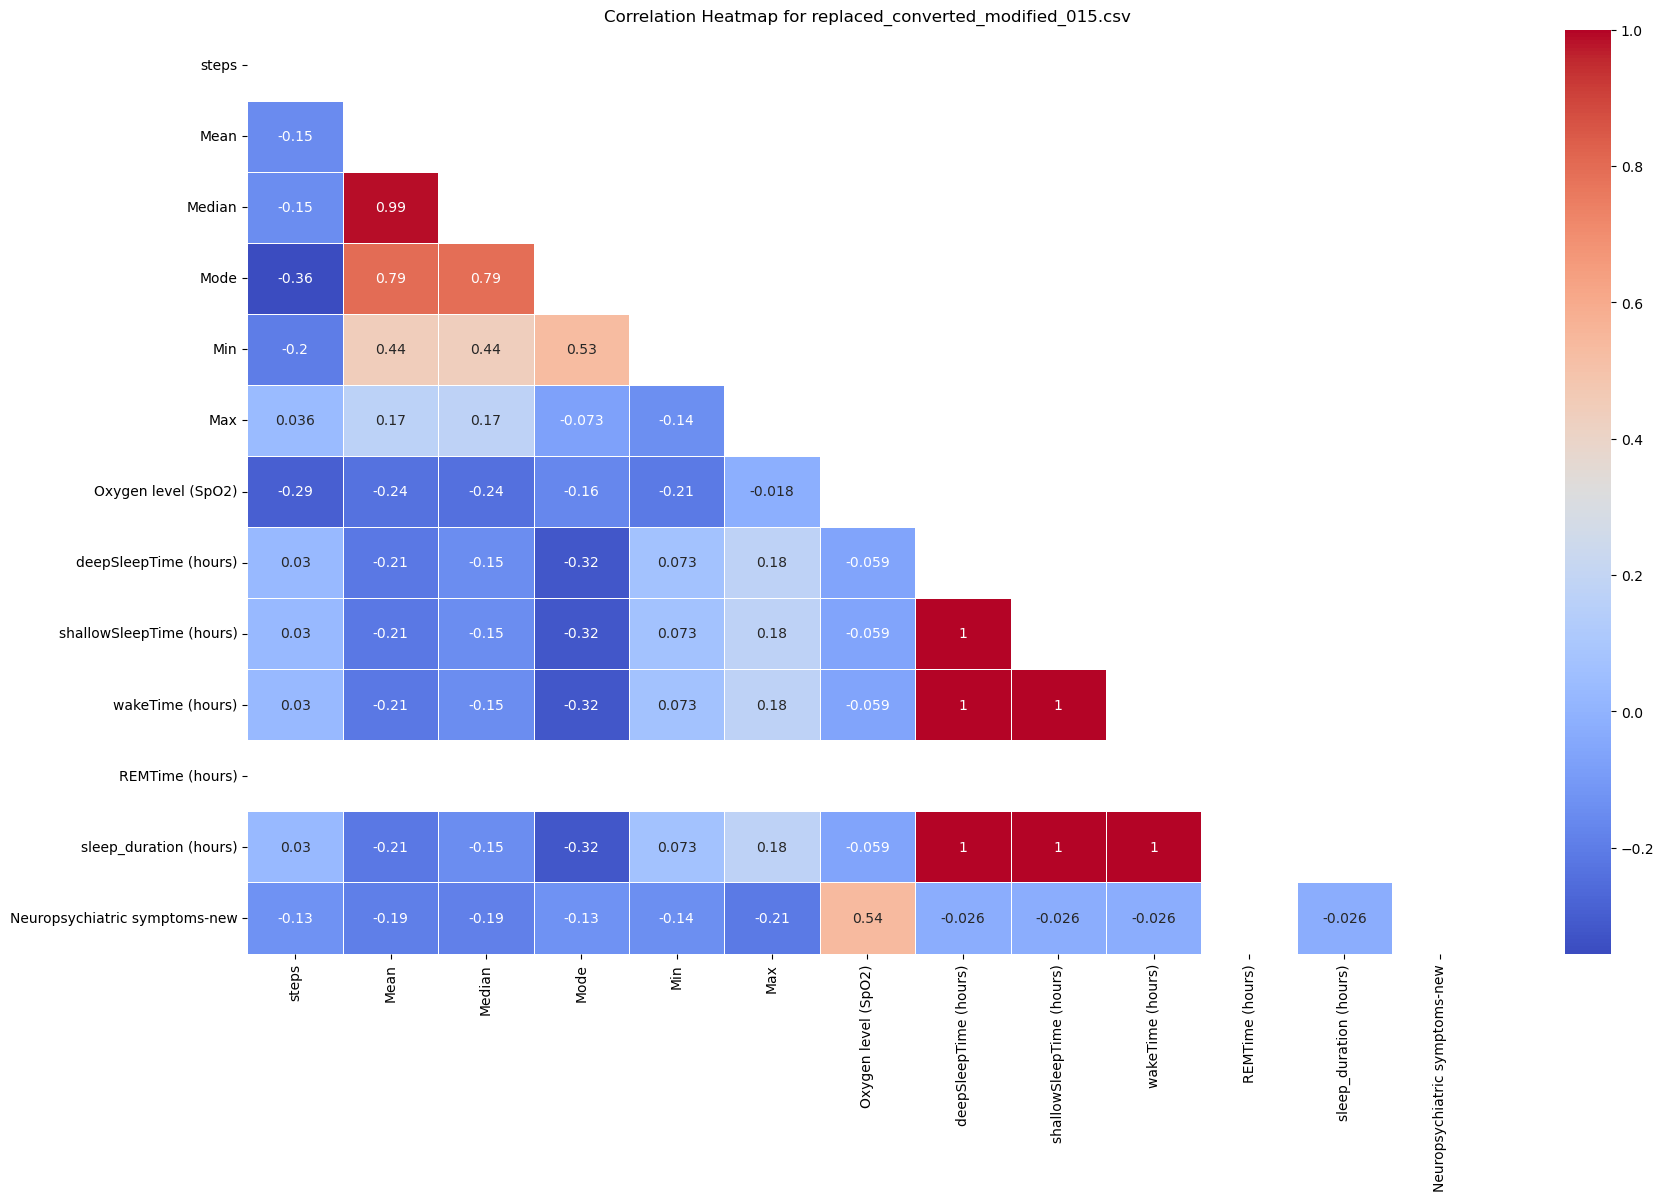

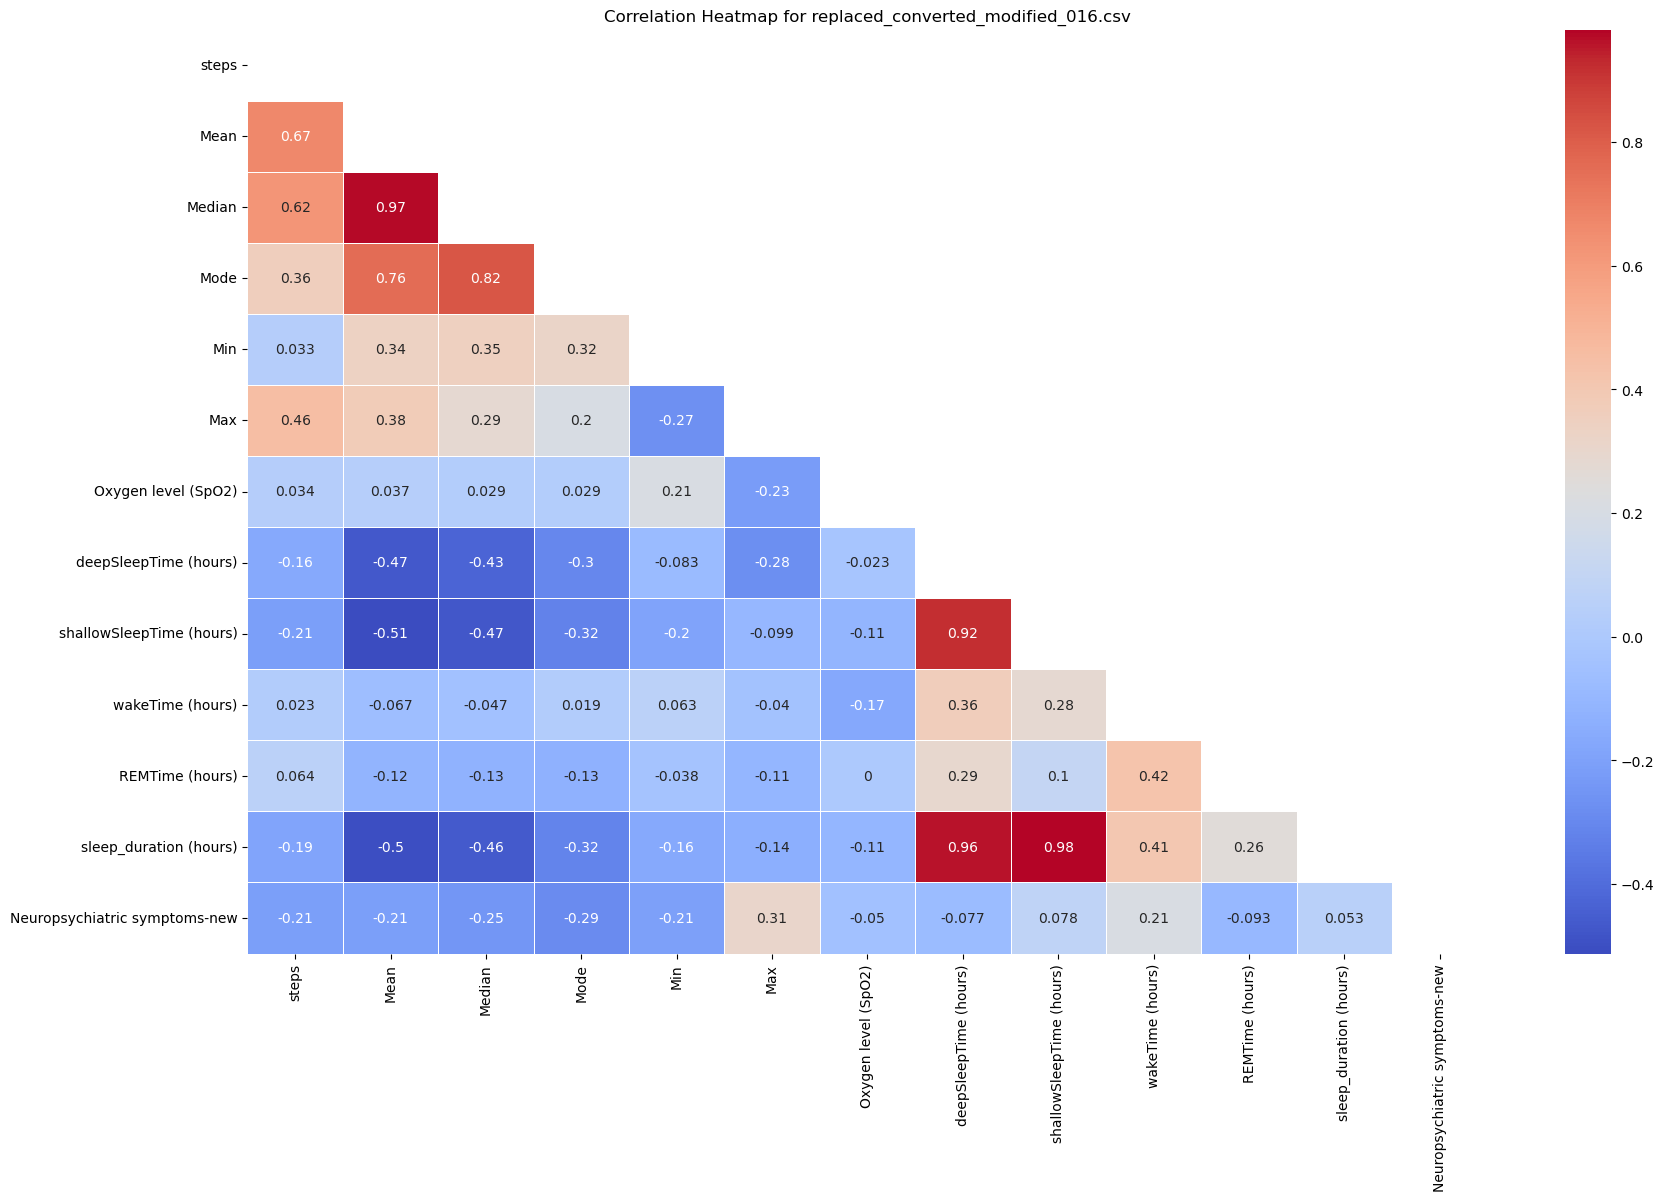

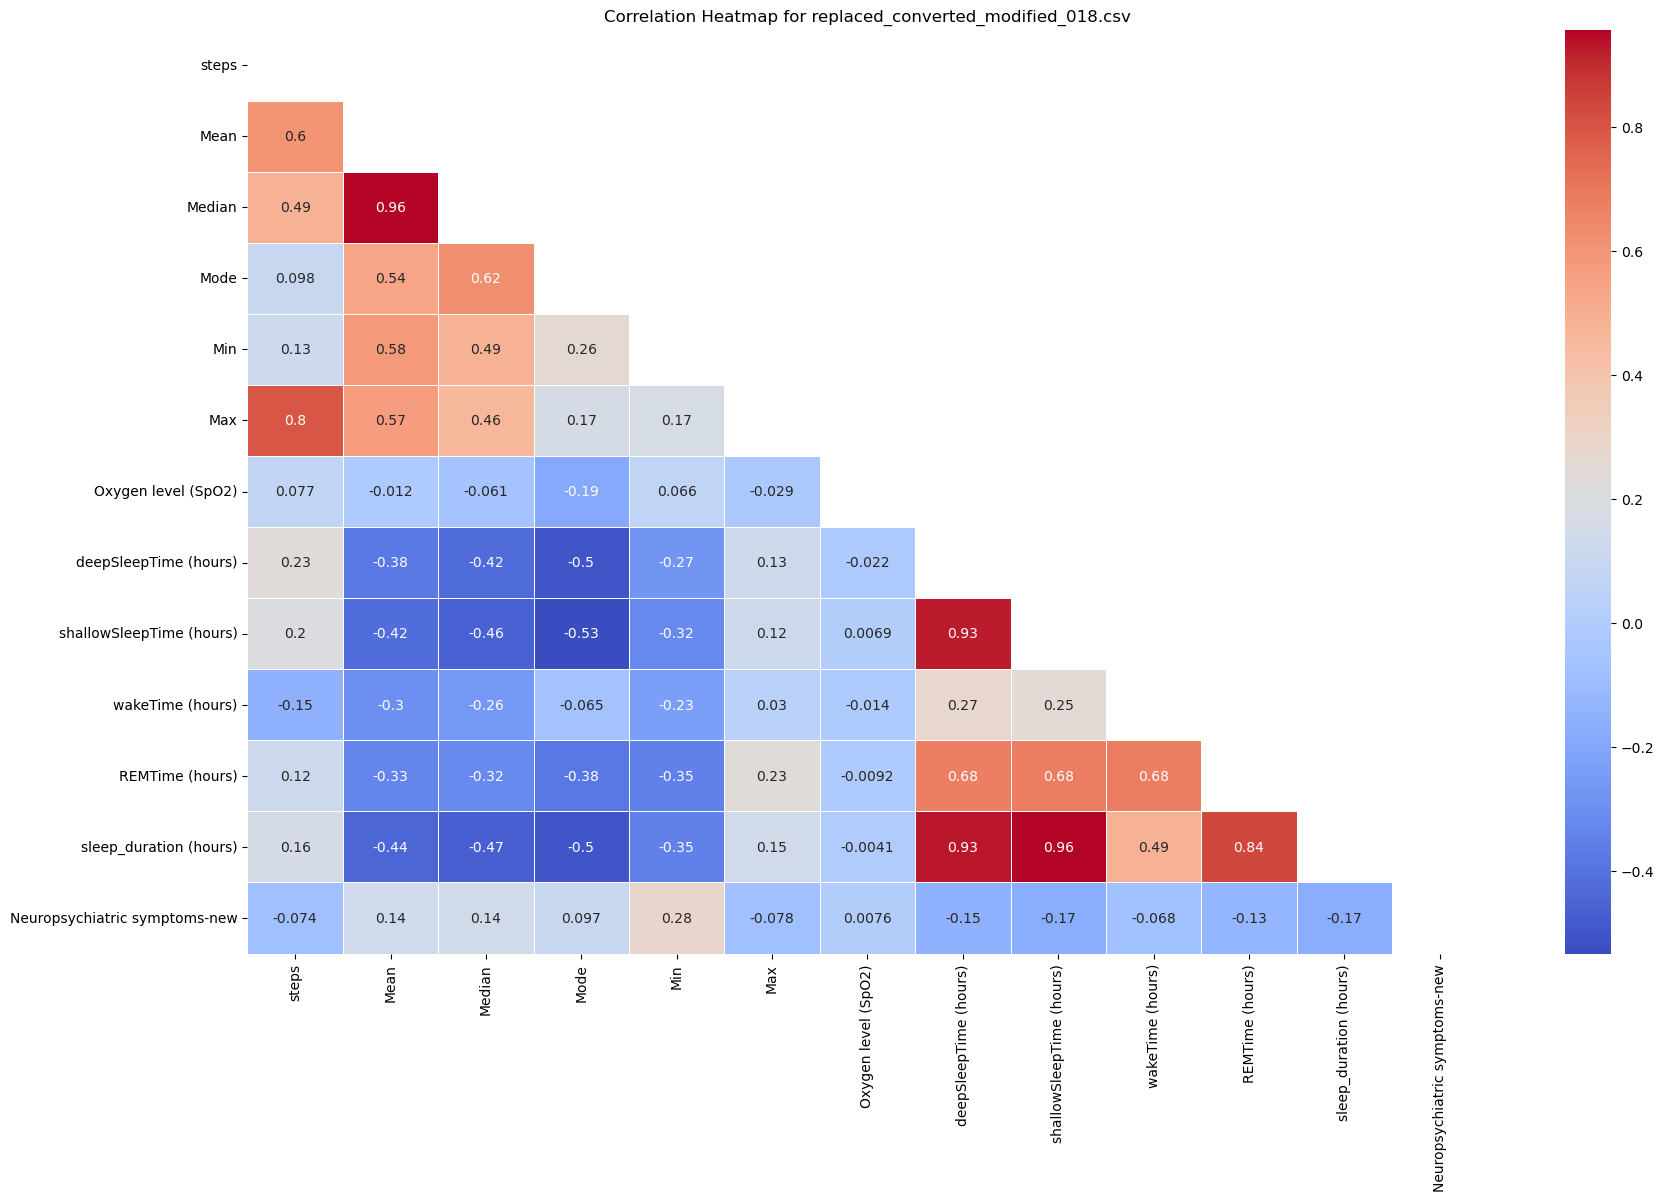

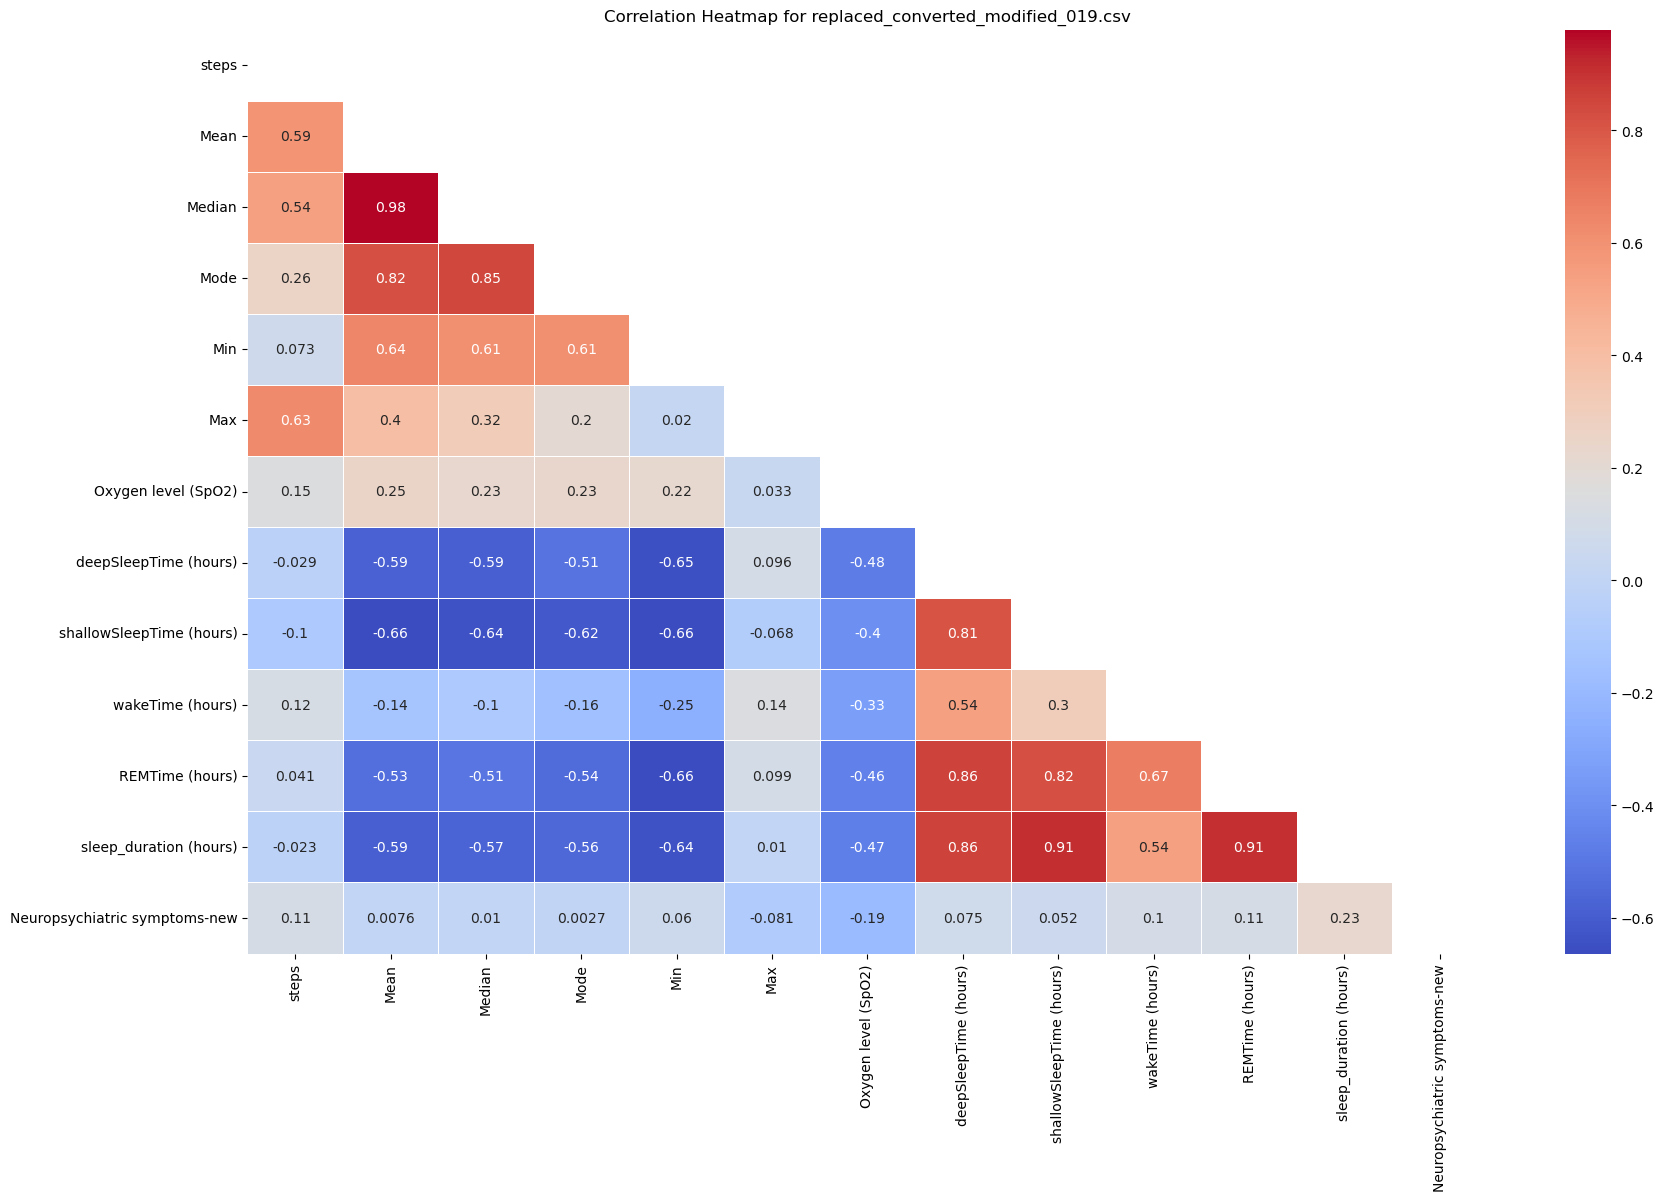

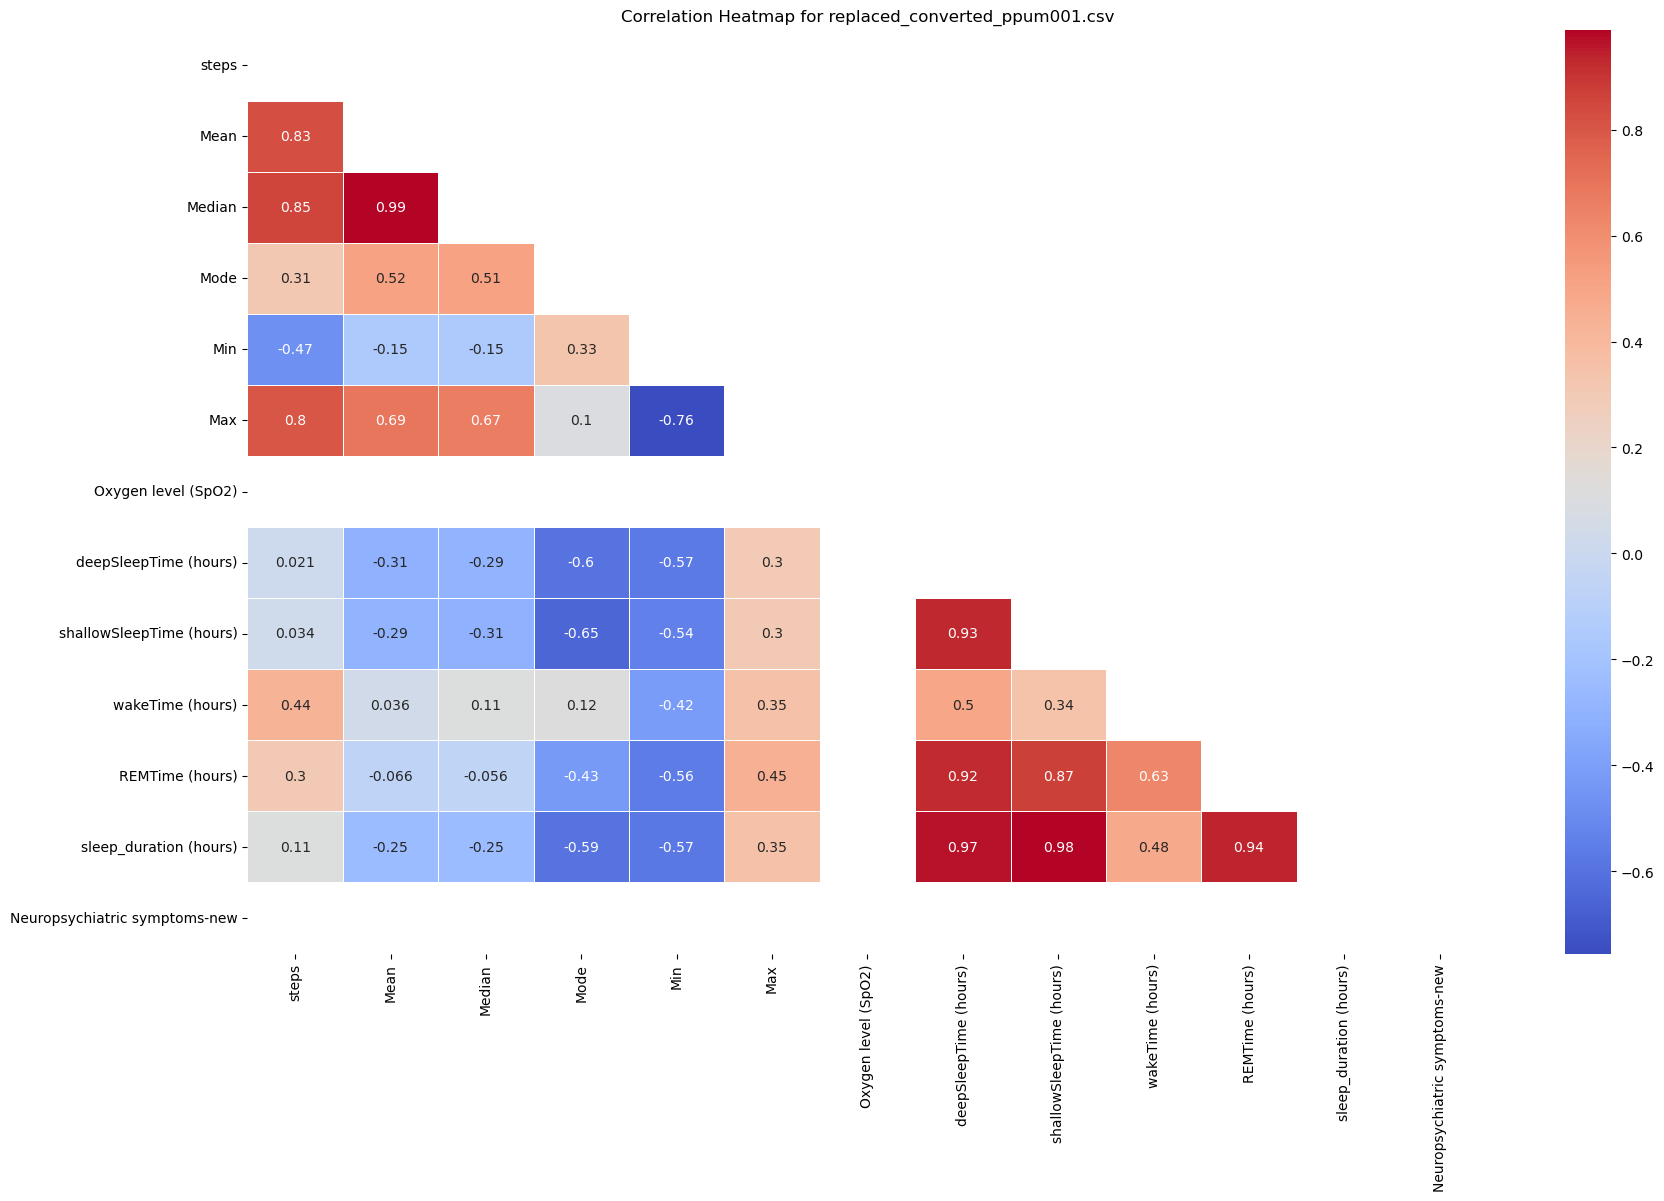

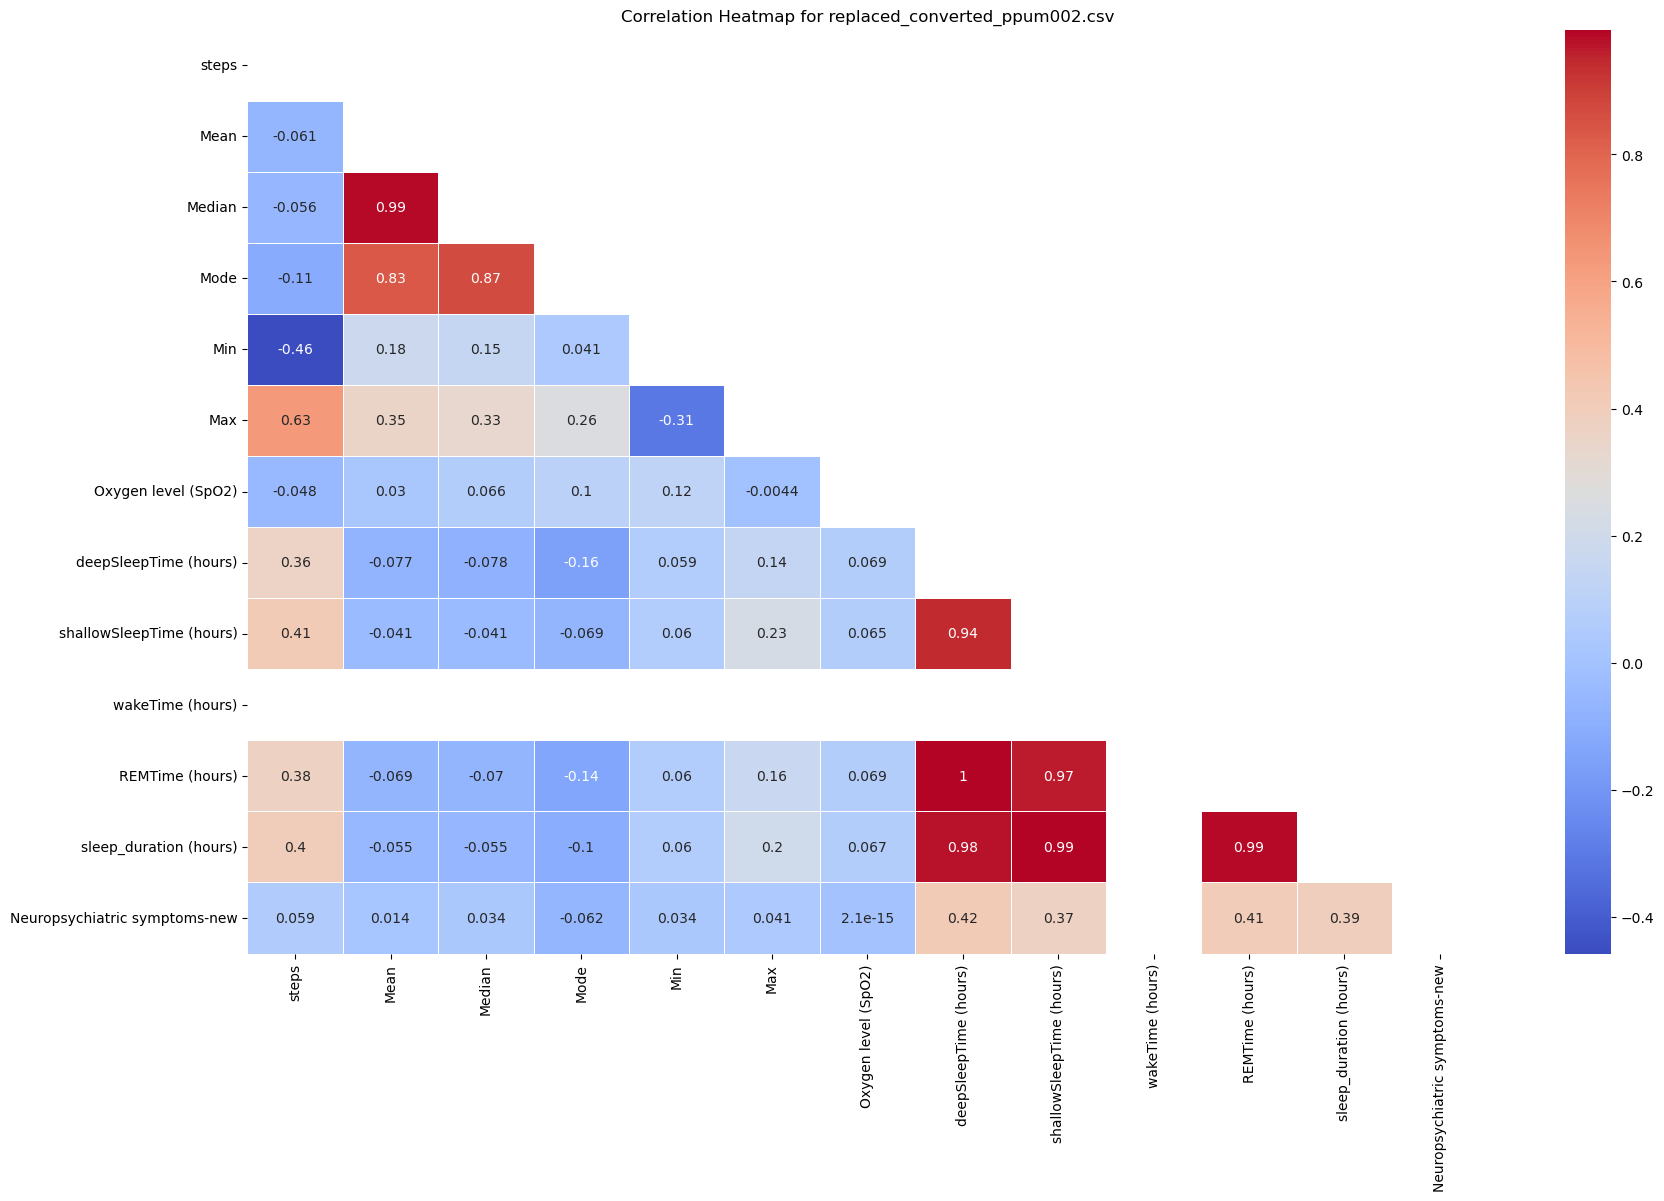

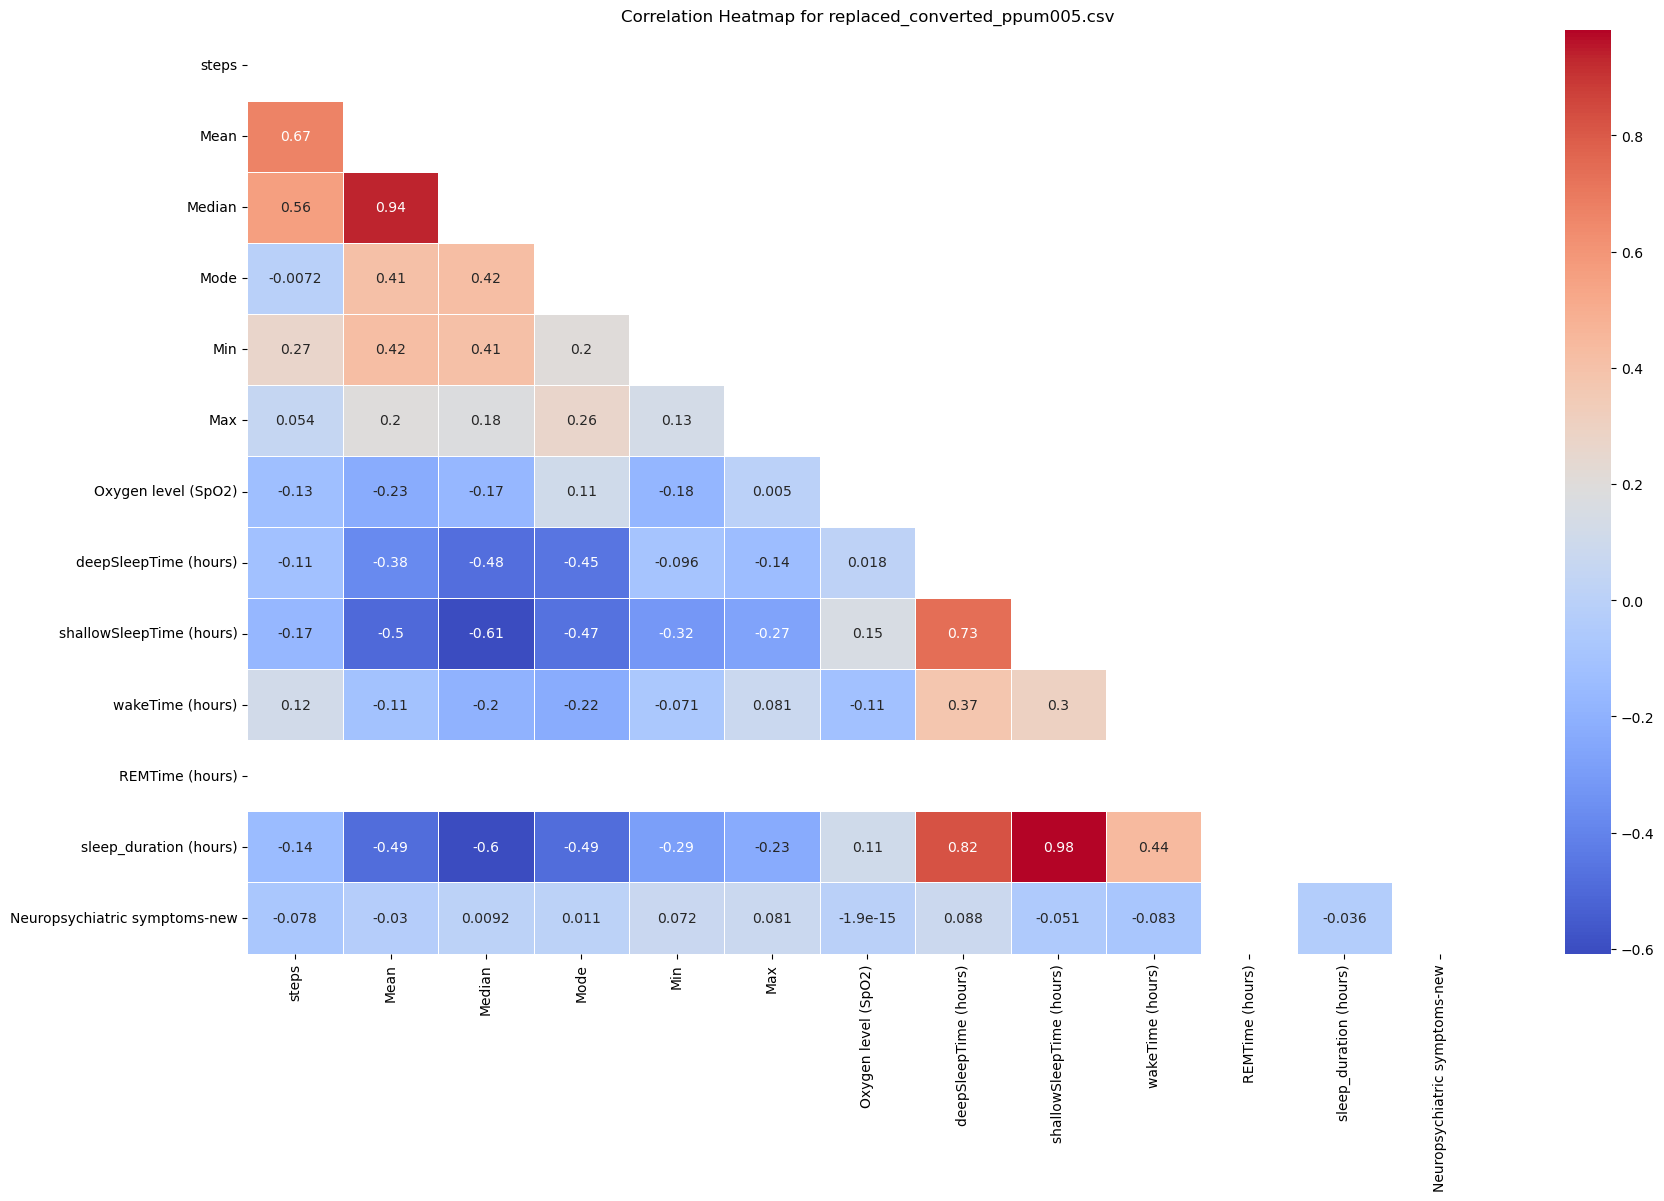

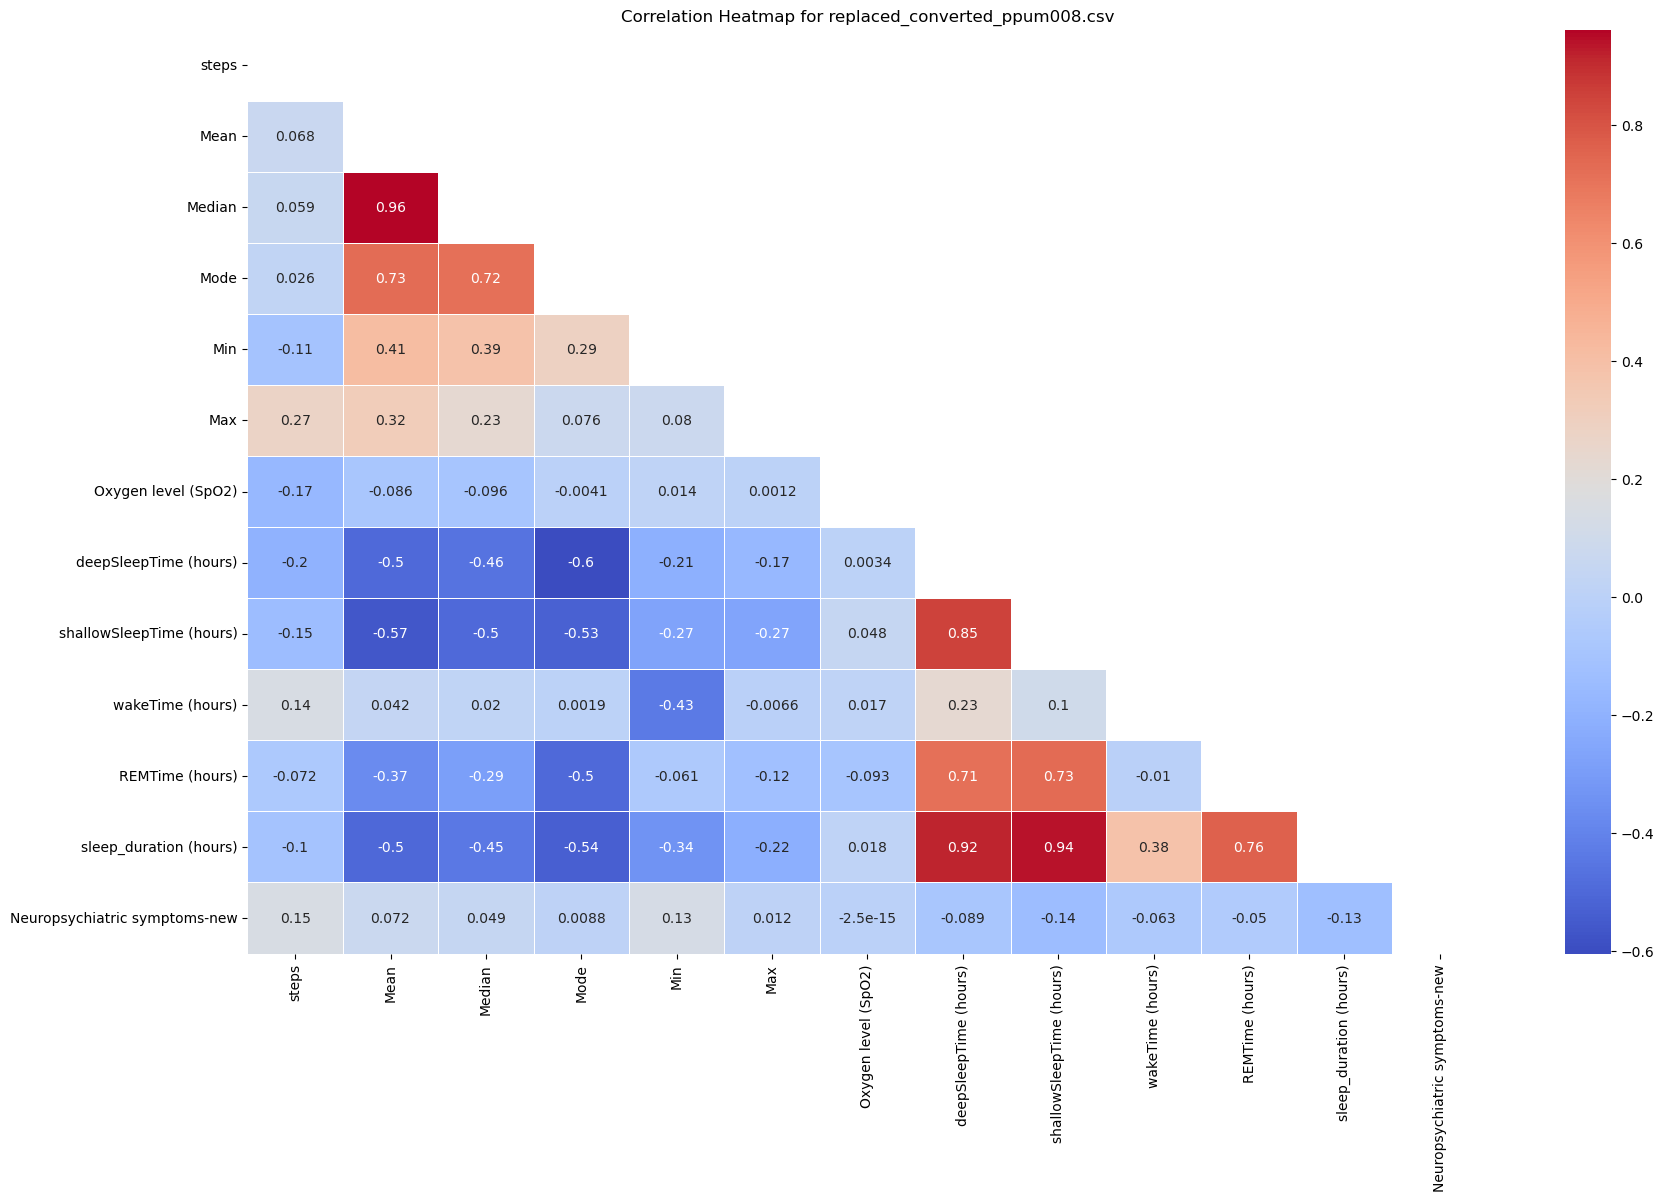

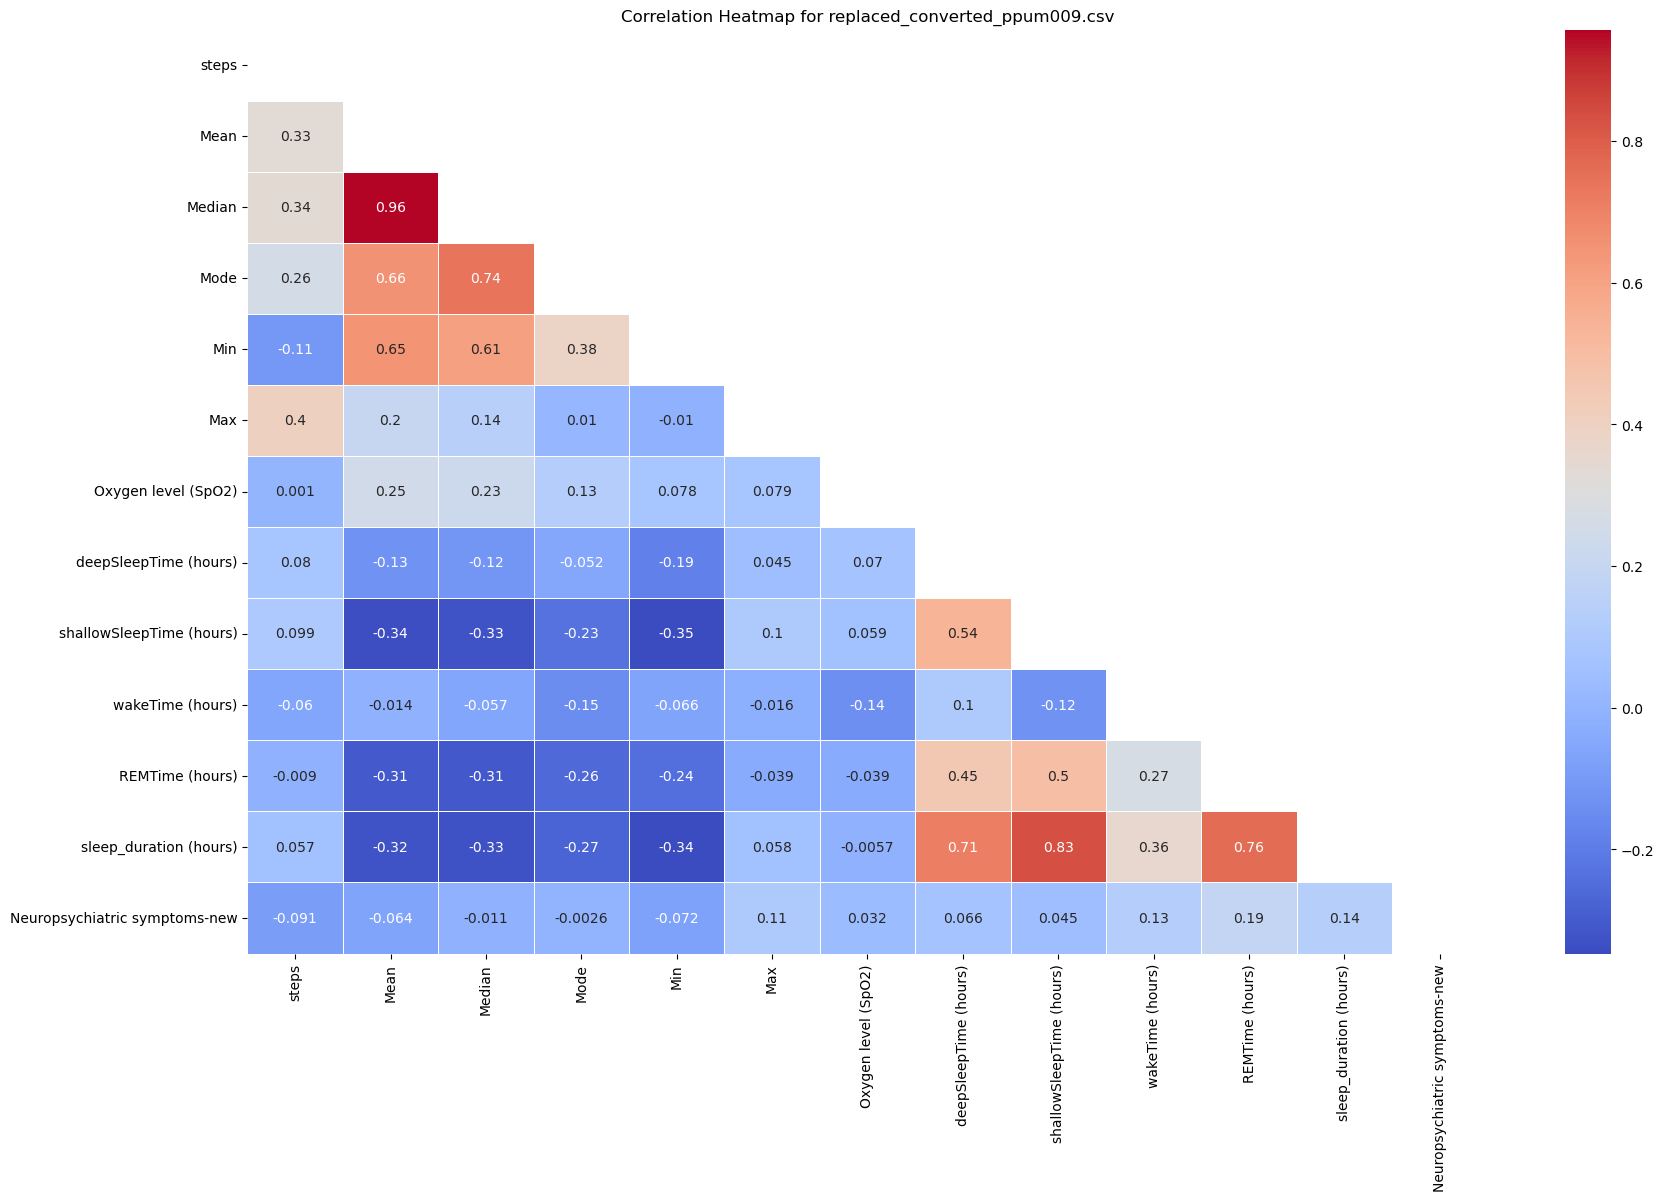

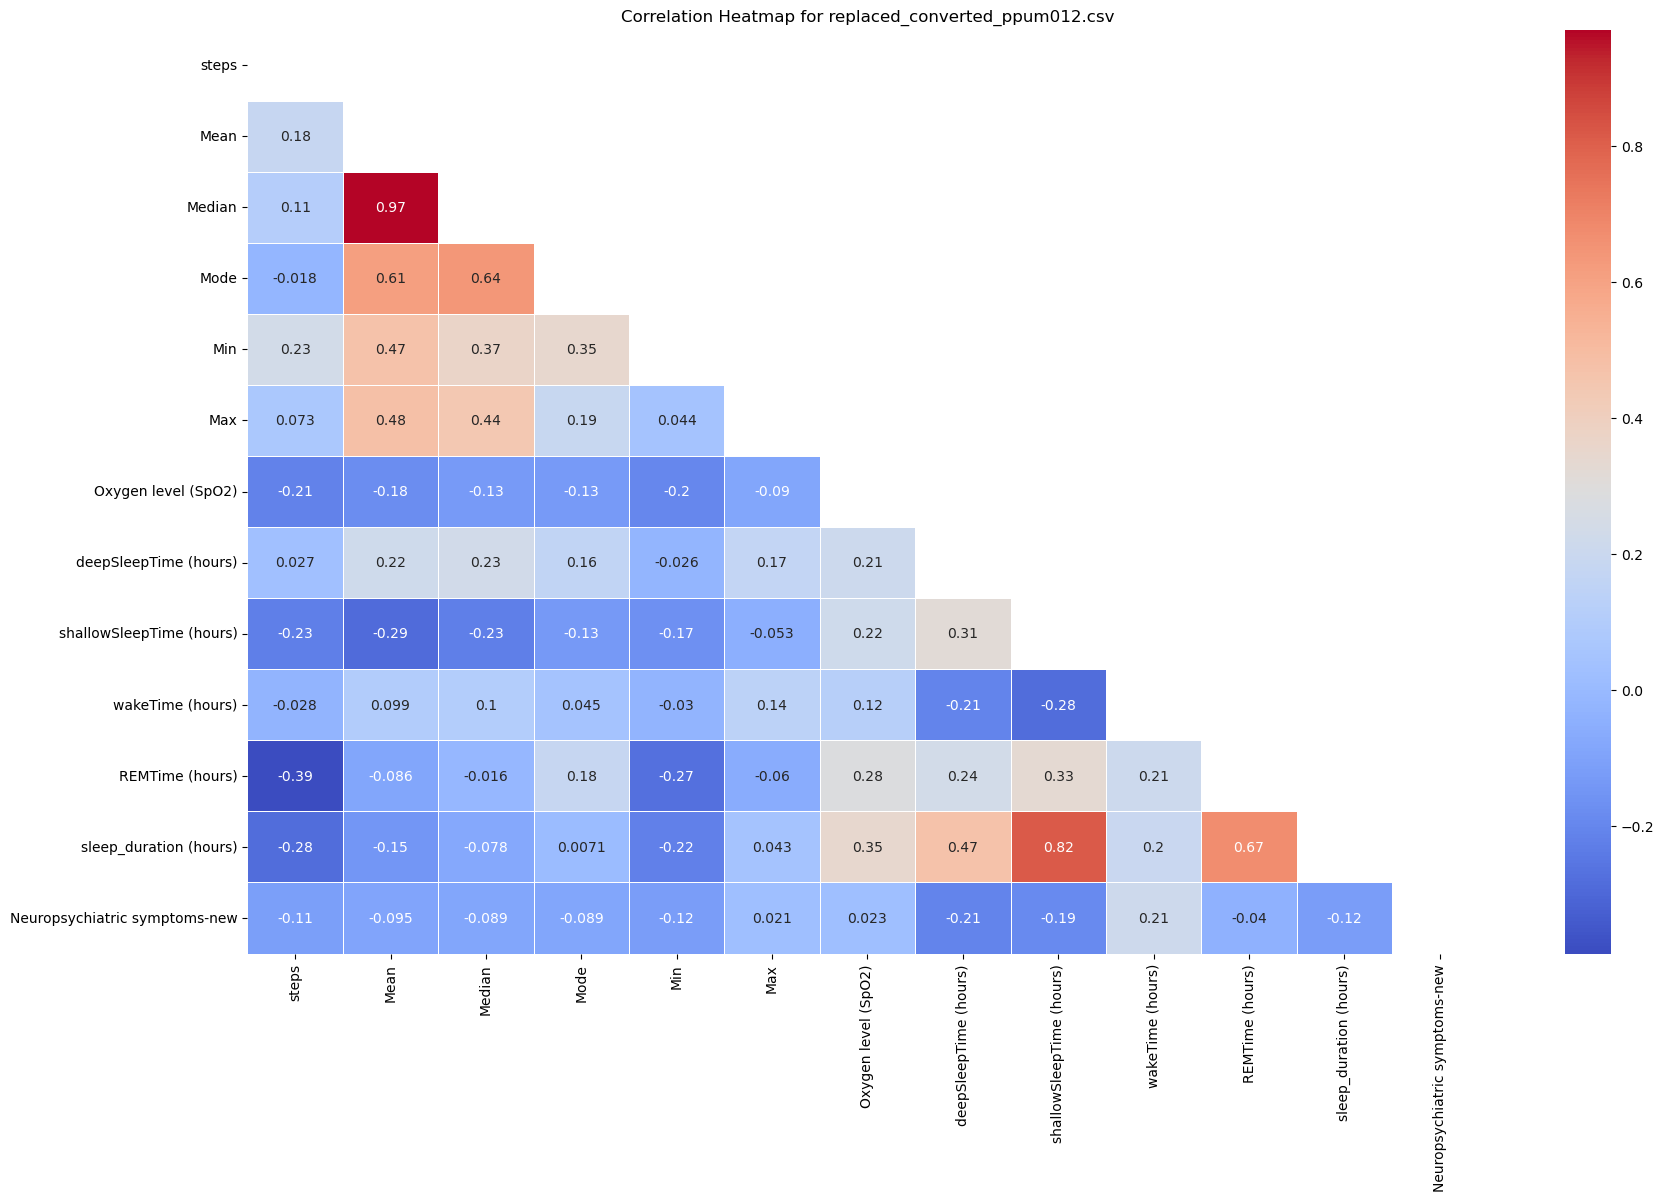

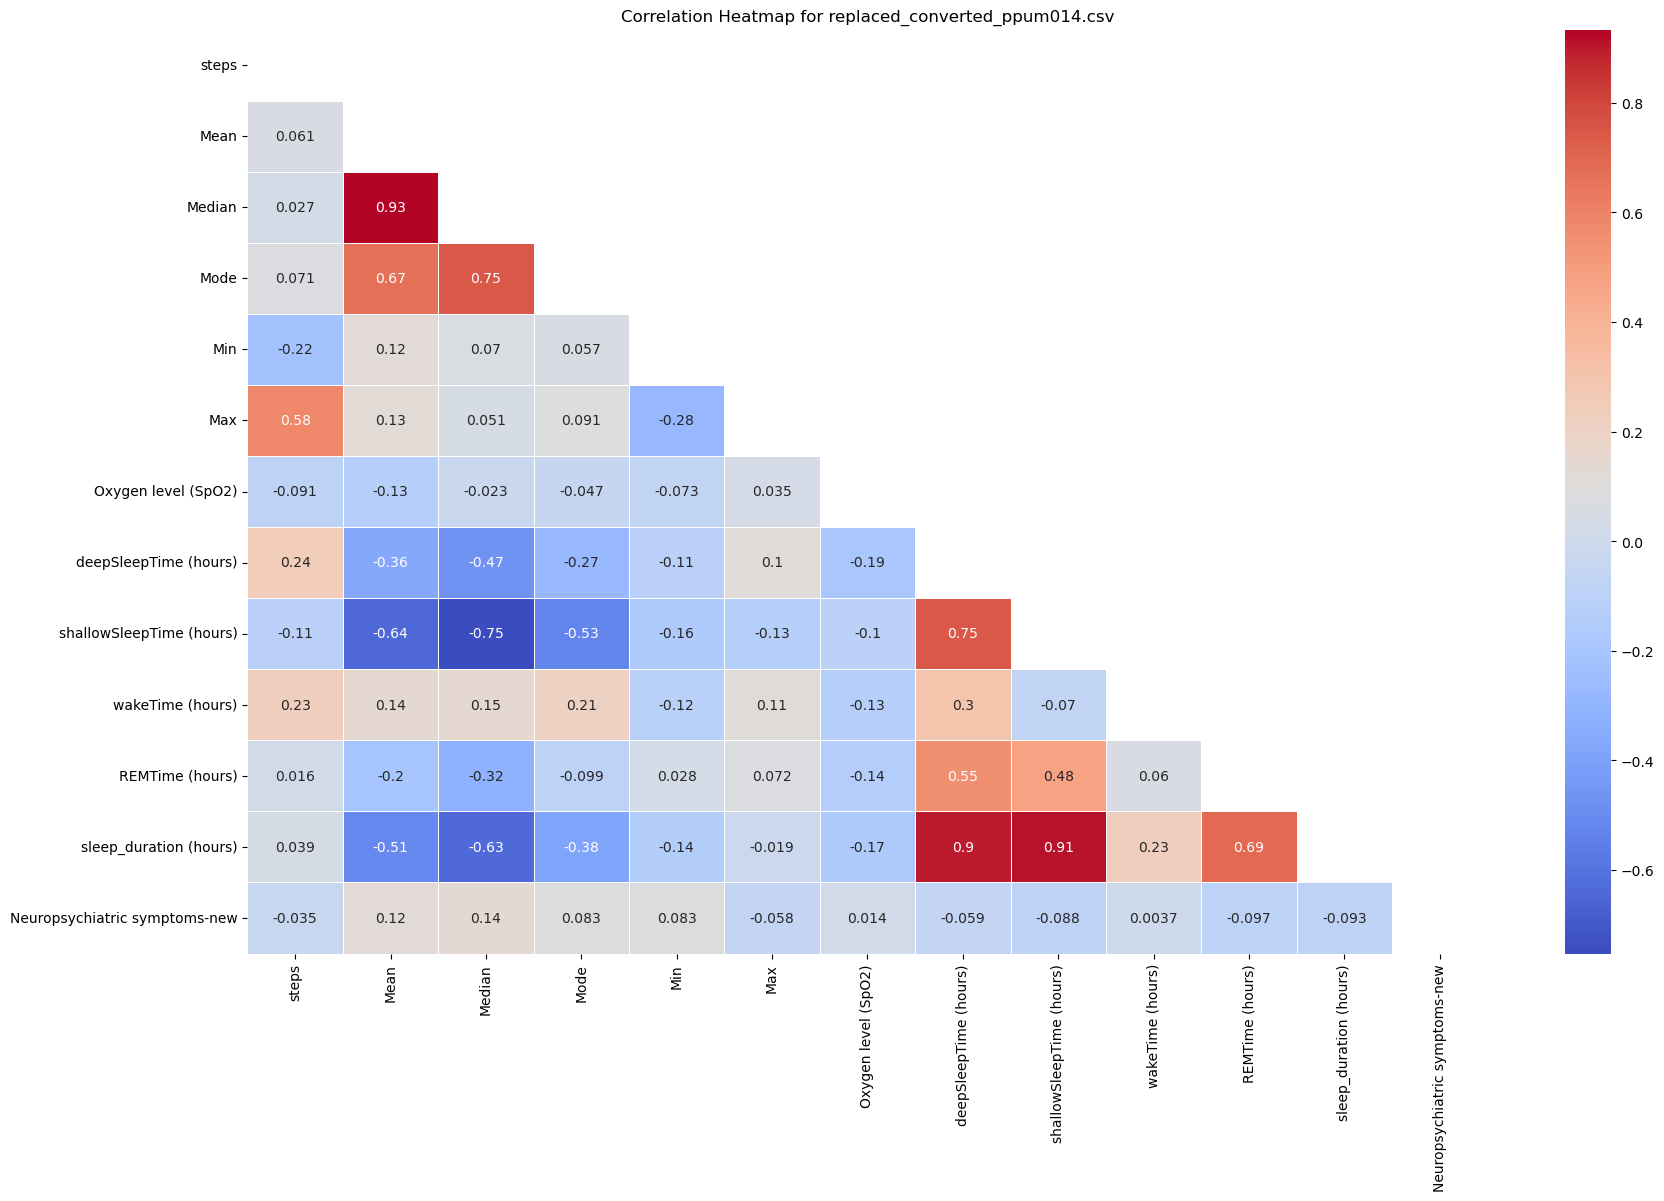

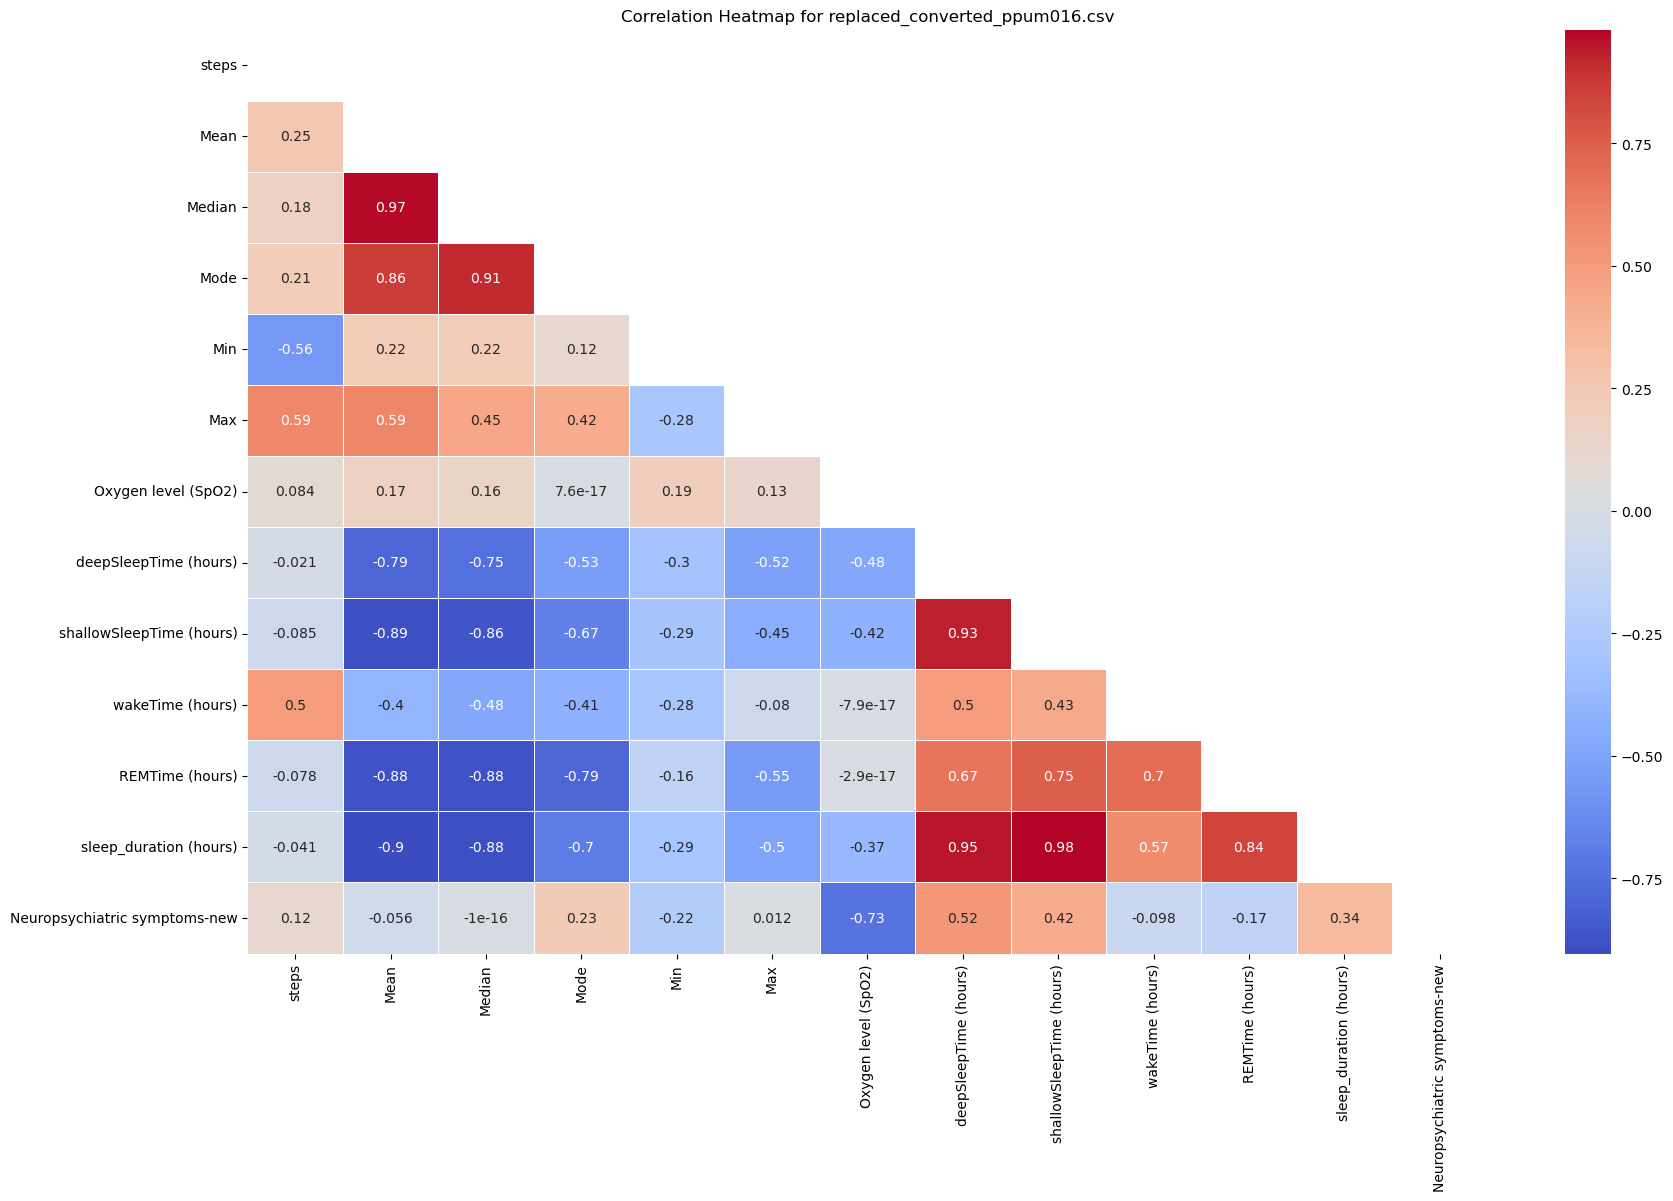

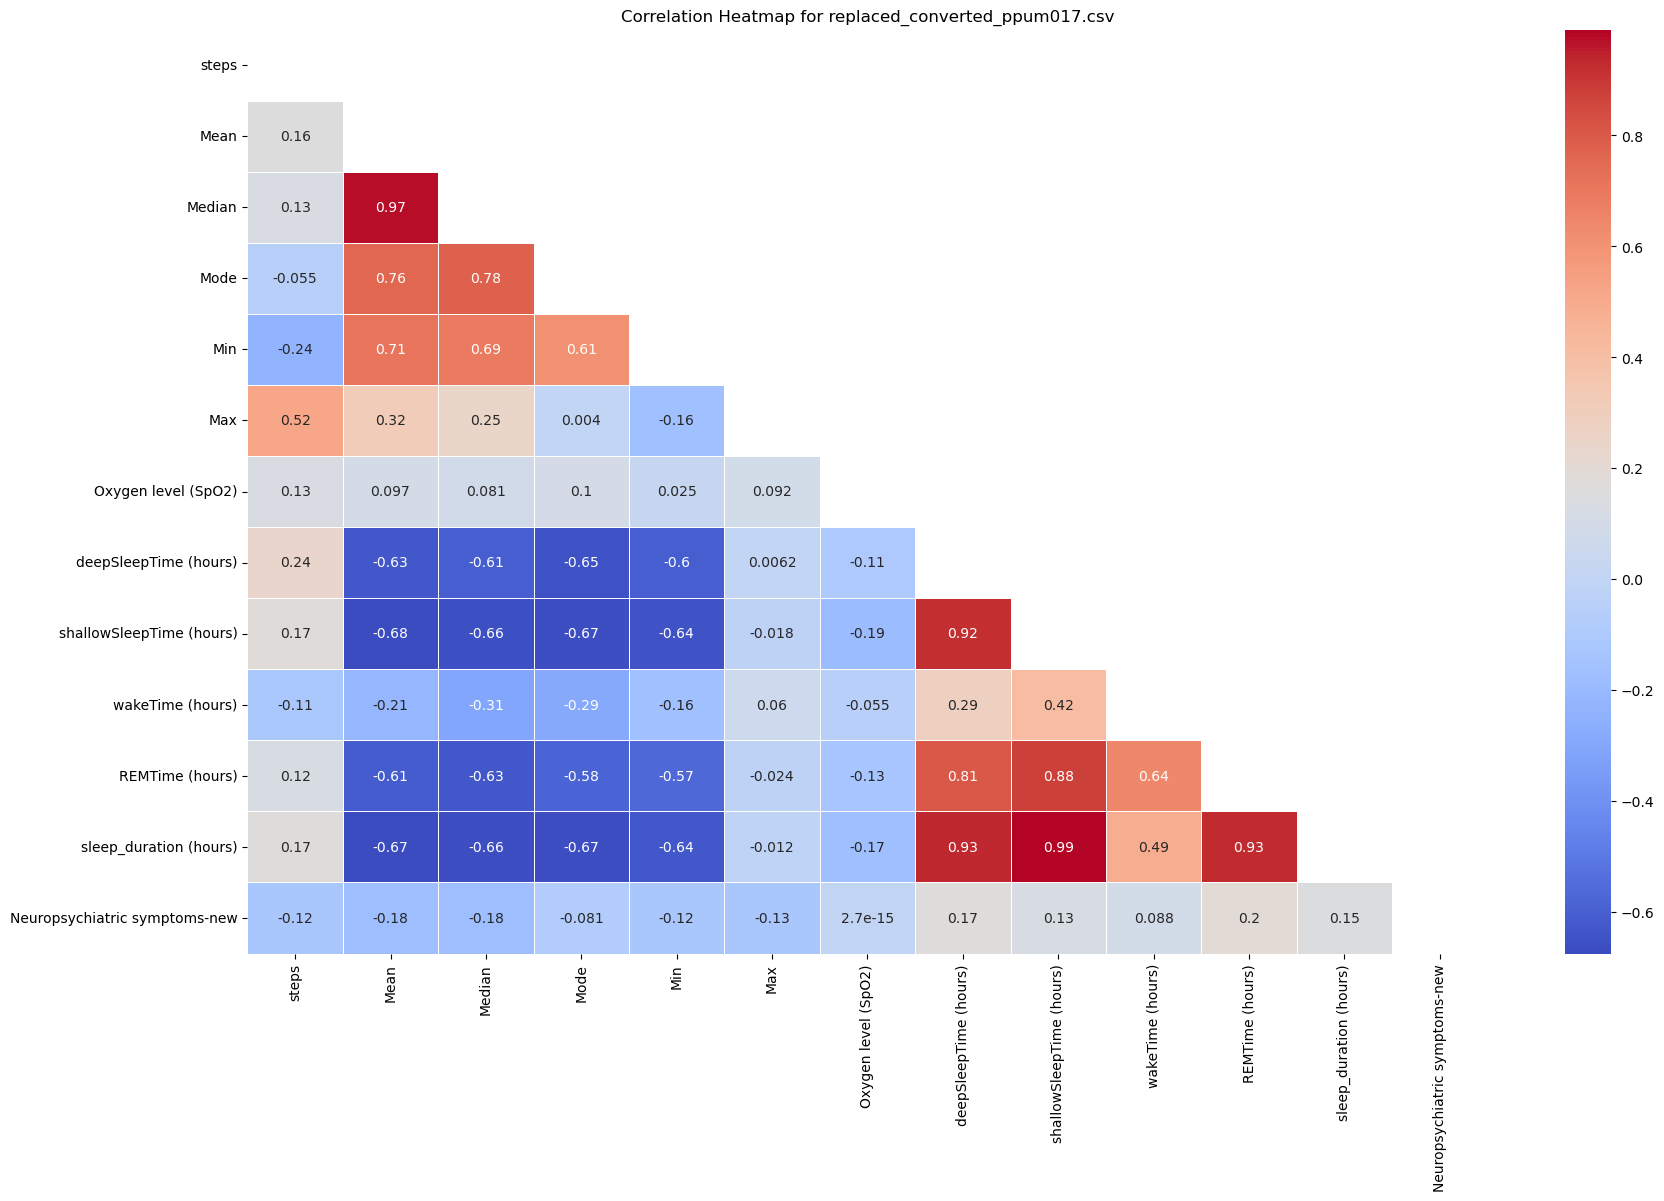

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/COVID_cleaned'

# Get a list of CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Drop specific columns
    columns_to_select = ['steps', 'Mean', 'Median', 'Mode', 'Min', 'Max', 'Oxygen level (SpO2)', 'deepSleepTime (hours)', 'shallowSleepTime (hours)', 'wakeTime (hours)', 'REMTime (hours)', 'sleep_duration (hours)', 'Neuropsychiatric symptoms-new']
    df = df[columns_to_select]

    from sklearn.preprocessing import MinMaxScaler

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to your data and transform the data
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    correlation_matrix = df_normalized.corr()

    # Create a mask to display only the lower triangular part of the heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(20, 12))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Heatmap for {file}')

    # Print the correlation values for "Neuropsychiatric symptoms" and sort them in descending order
    neuropsychiatric_correlation = correlation_matrix['Neuropsychiatric symptoms-new'].sort_values(ascending=False)
    
    # Print the title in bold
    print('\033[1m' + f'Neuropsychiatric Symptoms Correlation for {file}' + '\033[0m')

    # Print the sorted correlation values
    print(neuropsychiatric_correlation)

In [1]:
import pandas as pd
import numpy as np

# Dictionary to store correlations for each CSV file
correlations = {
    '011': {'Neuropsychiatric symptoms-new': 1.000000, 'Oxygen level (SpO2)': 0.628539, 'Mode': 0.512129, 'Mean': 0.279384, 'Median': 0.276476, 'REMTime (hours)': 0.142676, 'shallowSleepTime (hours)': 0.010425, 'wakeTime (hours)': 0.005651, 'sleep_duration': 0.000944},
    '015': {'Neuropsychiatric symptoms-new': 1.000000, 'Oxygen level (SpO2)': 0.535407},
    '016': {'Neuropsychiatric symptoms-new': 1.000000, 'Max': 0.308028, 'wakeTime (hours)': 0.207147, 'shallowSleepTime (hours)': 0.077501, 'sleep_duration (hours)': 0.052857},
    '018': {'Neuropsychiatric symptoms-new': 1.000000, 'Min': 0.276771, 'Median': 0.144737, 'Mean': 0.138962, 'Mode': 0.096879, 'Oxygen level (SpO2)':0.007650},
    '019': {'Neuropsychiatric symptoms-new': 1.000000, 'sleep_duration (hours)': 0.225376, 'steps': 0.109563, 'REMTime (hours)': 0.109461, 'wakeTime (hours)': 0.100667, 'deepSleepTime (hours)': 0.074744, 'Min': 0.059629, 'shallowSleepTime (hours)': 0.051579, 'Median': 0.010217, 'Mean': 0.007598, 'Mode': 0.002682},
    'ppum002': {'Neuropsychiatric symptoms-new': 1.000000e+00, 'deepSleepTime (hours)': 4.152274e-01, 'REMTime (hours)': 4.082711e-01, 'sleep_duration (hours)': 3.907119e-01, 'shallowSleepTime (hours)': 3.688374e-01, 'steps': 5.866993e-02, 'Max': 4.102926e-02, 'Min': 3.424435e-02, 'Median': 3.415769e-02, 'Mean': 1.403863e-02, 'Oxygen level (SpO2)': 2.054122e-15},
    'ppum005': {'Neuropsychiatric symptoms-new': 1.000000e+00, 'deepSleepTime (hours)': 8.760035e-02, 'Max': 8.099975e-02, 'Min': 7.176062e-02, 'Mode': 1.099050e-02, 'Median': 9.151094e-03},
    'ppum008': {'Neuropsychiatric symptoms-new': 1.000000e+00, 'steps': 1.465288e-01, 'Min': 1.298976e-01, 'Mean': 7.209216e-02, 'Median': 4.891182e-02, 'Max': 1.198979e-02, 'Mode': 8.765748e-03},
    'ppum009': {'Neuropsychiatric symptoms-new': 1.000000, 'REMTime (hours)': 0.191389, 'sleep_duration (hours)': 0.135783, 'wakeTime (hours)': 0.128428, 'Max': 0.105753, 'deepSleepTime (hours)': 0.066045, 'shallowSleepTime (hours)': 0.045097, 'Oxygen level (SpO2)': 0.031843},
    'ppum012': {'Neuropsychiatric symptoms-new': 1.000000, 'wakeTime (hours)': 0.213947, 'Oxygen level (SpO2)': 0.022580, 'Max': 0.021143},
    'ppum014': {'Neuropsychiatric symptoms-new': 1.000000, 'Median': 0.143000, 'Mean': 0.118091, 'Min': 0.083148, 'Mode': 0.082567, 'Oxygen level (SpO2)': 0.014183, 'wakeTime (hours)': 0.003744},
    'ppum016': {'Neuropsychiatric symptoms-new': 1.000000e+00, 'deepSleepTime (hours)': 5.229307e-01, 'shallowSleepTime (hours)': 4.193816e-01, 'sleep_duration (hours)': 3.373381e-01, 'Mode': 2.292984e-01, 'steps': 1.189302e-01, 'Max': 1.211978e-02},
    'ppum017': {'Neuropsychiatric symptoms-new': 1.000000e+00, 'REMTime (hours)': 1.955482e-01, 'deepSleepTime (hours)': 1.668533e-01, 'sleep_duration (hours)': 1.507188e-01, 'shallowSleepTime (hours)': 1.250364e-01, 'wakeTime (hours)': 8.792393e-02, 'Oxygen level (SpO2)': 2.731518e-15}
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(correlations)

# Transpose the DataFrame for easier calculations
df = df.T
df

# Calculate the average correlation for each positive correlation feature
average_corr = df.mean()

# Sort the average_corr in descending order
average_corr_sorted = average_corr.sort_values(ascending=False)

# Display the result
print("Average Correlation for Positive Correlation Features:")
print(average_corr_sorted)

# df.to_csv('average_corr.csv', index=False)

Average Correlation for Positive Correlation Features:
Neuropsychiatric symptoms-new    1.000000
deepSleepTime (hours)            0.222233
sleep_duration (hours)           0.215464
REMTime (hours)                  0.209469
shallowSleepTime (hours)         0.156837
Oxygen level (SpO2)              0.155025
Mode                             0.134759
Min                              0.109242
steps                            0.108423
wakeTime (hours)                 0.106787
Mean                             0.105028
Median                           0.095236
Max                              0.083009
sleep_duration                   0.000944
dtype: float64


## normal_correlation (same_months)

Neuropsychiatric Symptoms Correlation for replaced_modified_converted_001.csv
Neuropsychiatric symptoms-new    1.000000
REMTime (hours)                  0.562339
wakeTime (hours)                 0.431787
sleep_duration (hours)           0.376472
deepSleepTime (hours)            0.268691
shallowSleepTime (hours)         0.246836
Min                              0.178356
Mode                             0.064118
Oxygen level (SpO2)              0.036720
Median                          -0.033784
Mean                            -0.073391
steps                           -0.172243
Max                             -0.188276
Name: Neuropsychiatric symptoms-new, dtype: float64
Neuropsychiatric Symptoms Correlation for replaced_modified_converted_002.csv
Neuropsychiatric symptoms-new    1.000000
Max                              0.171180
Oxygen level (SpO2)              0.000000
Median                          -0.024408
Mean                            -0.079213
steps                           -0.1

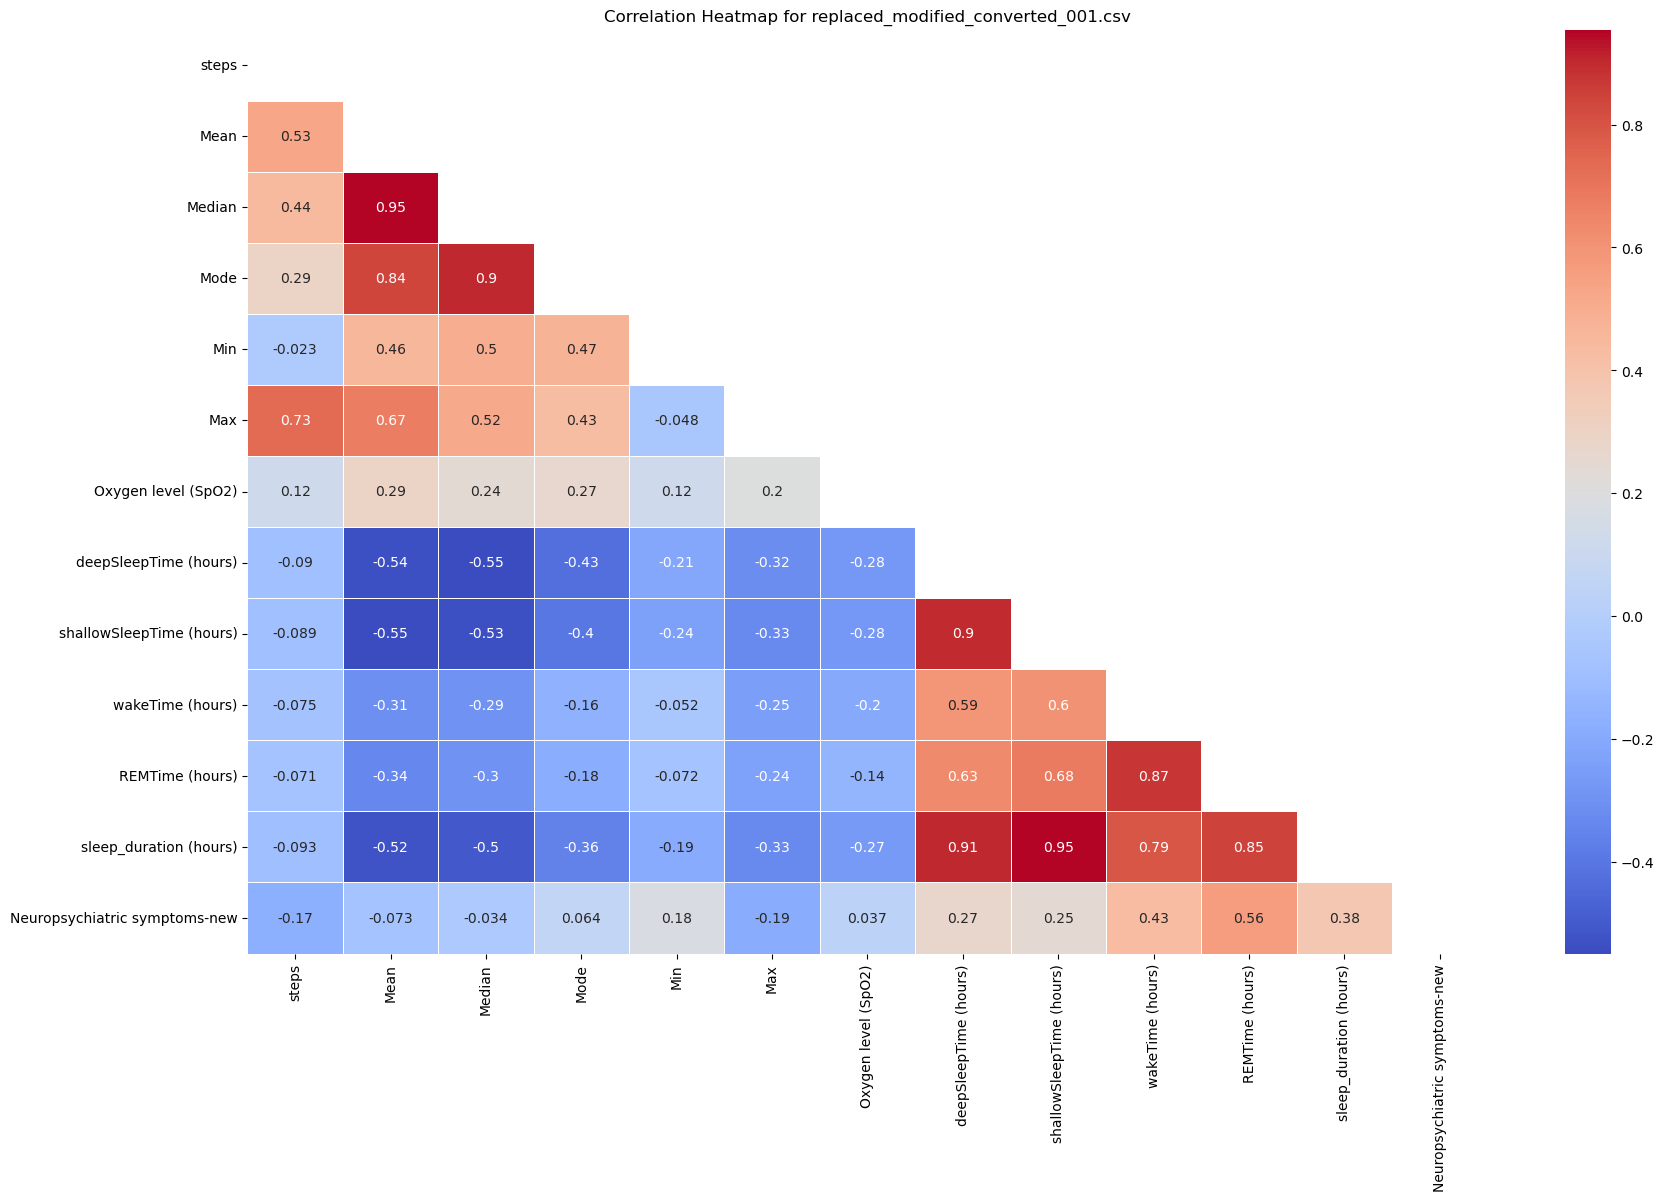

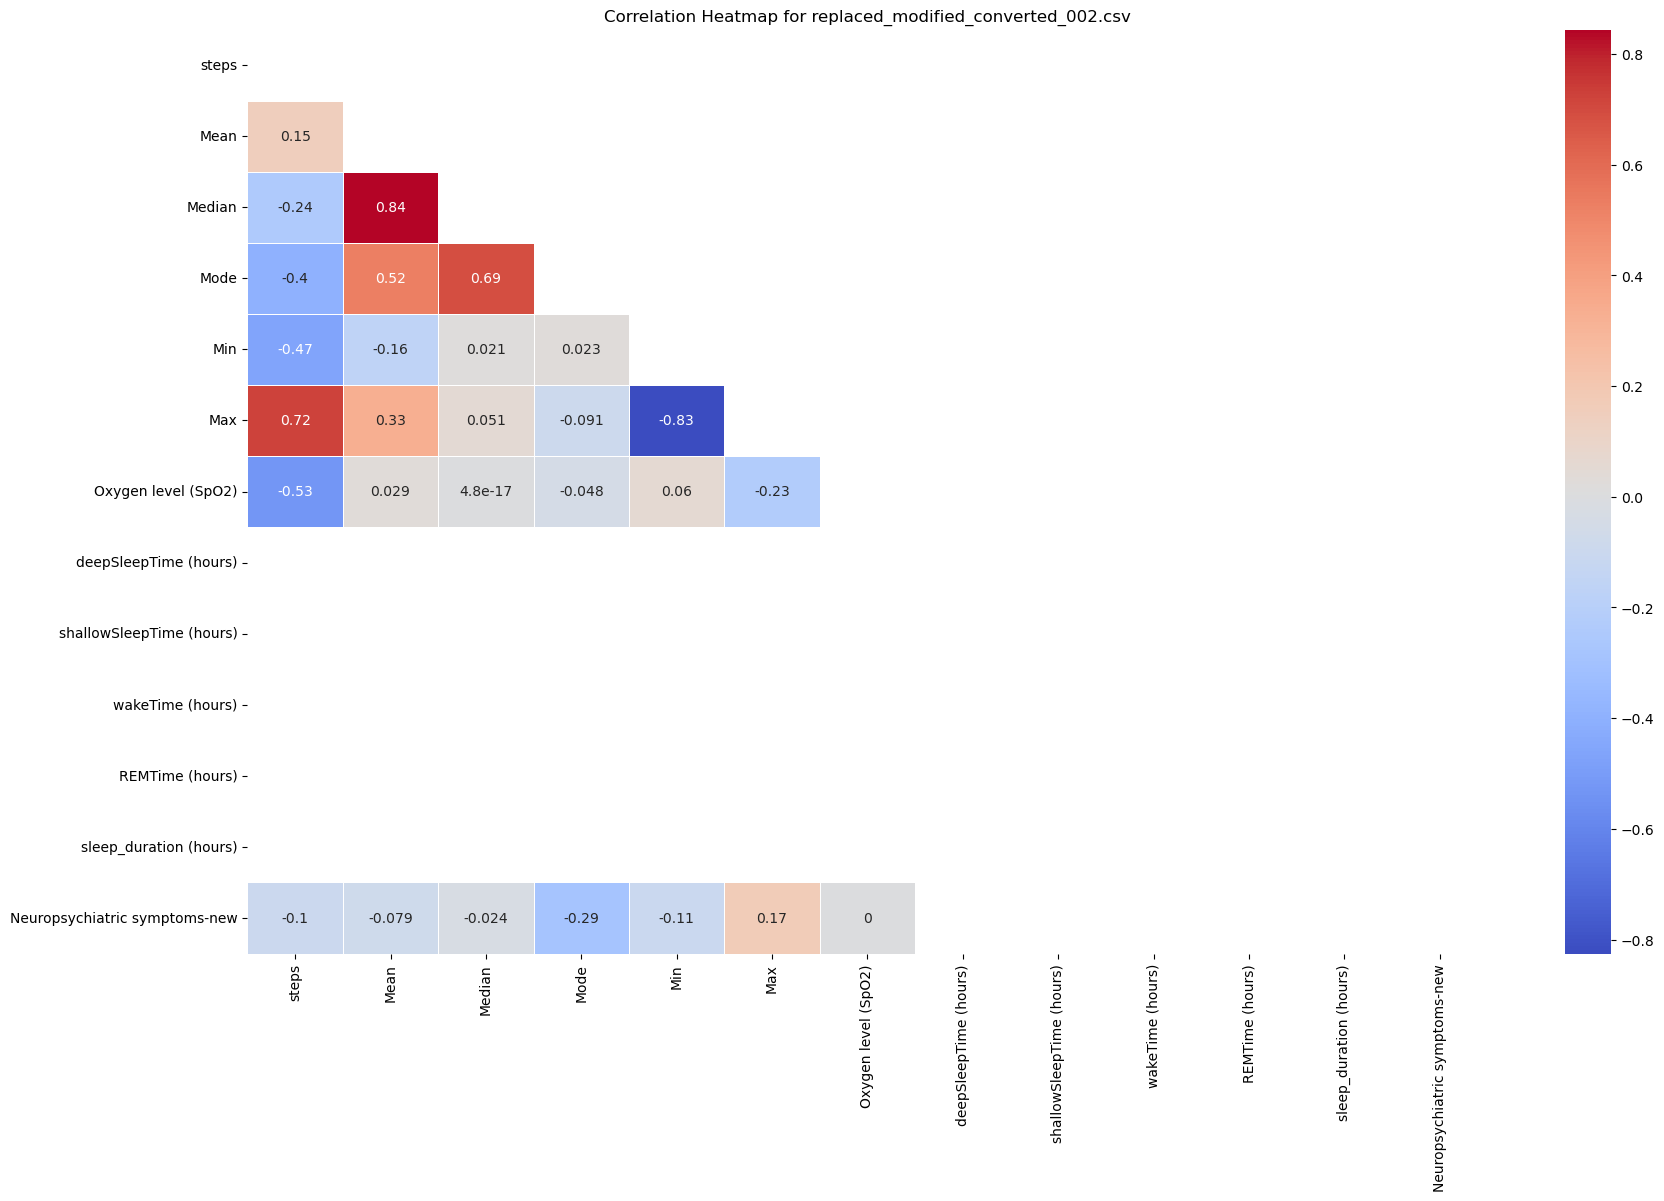

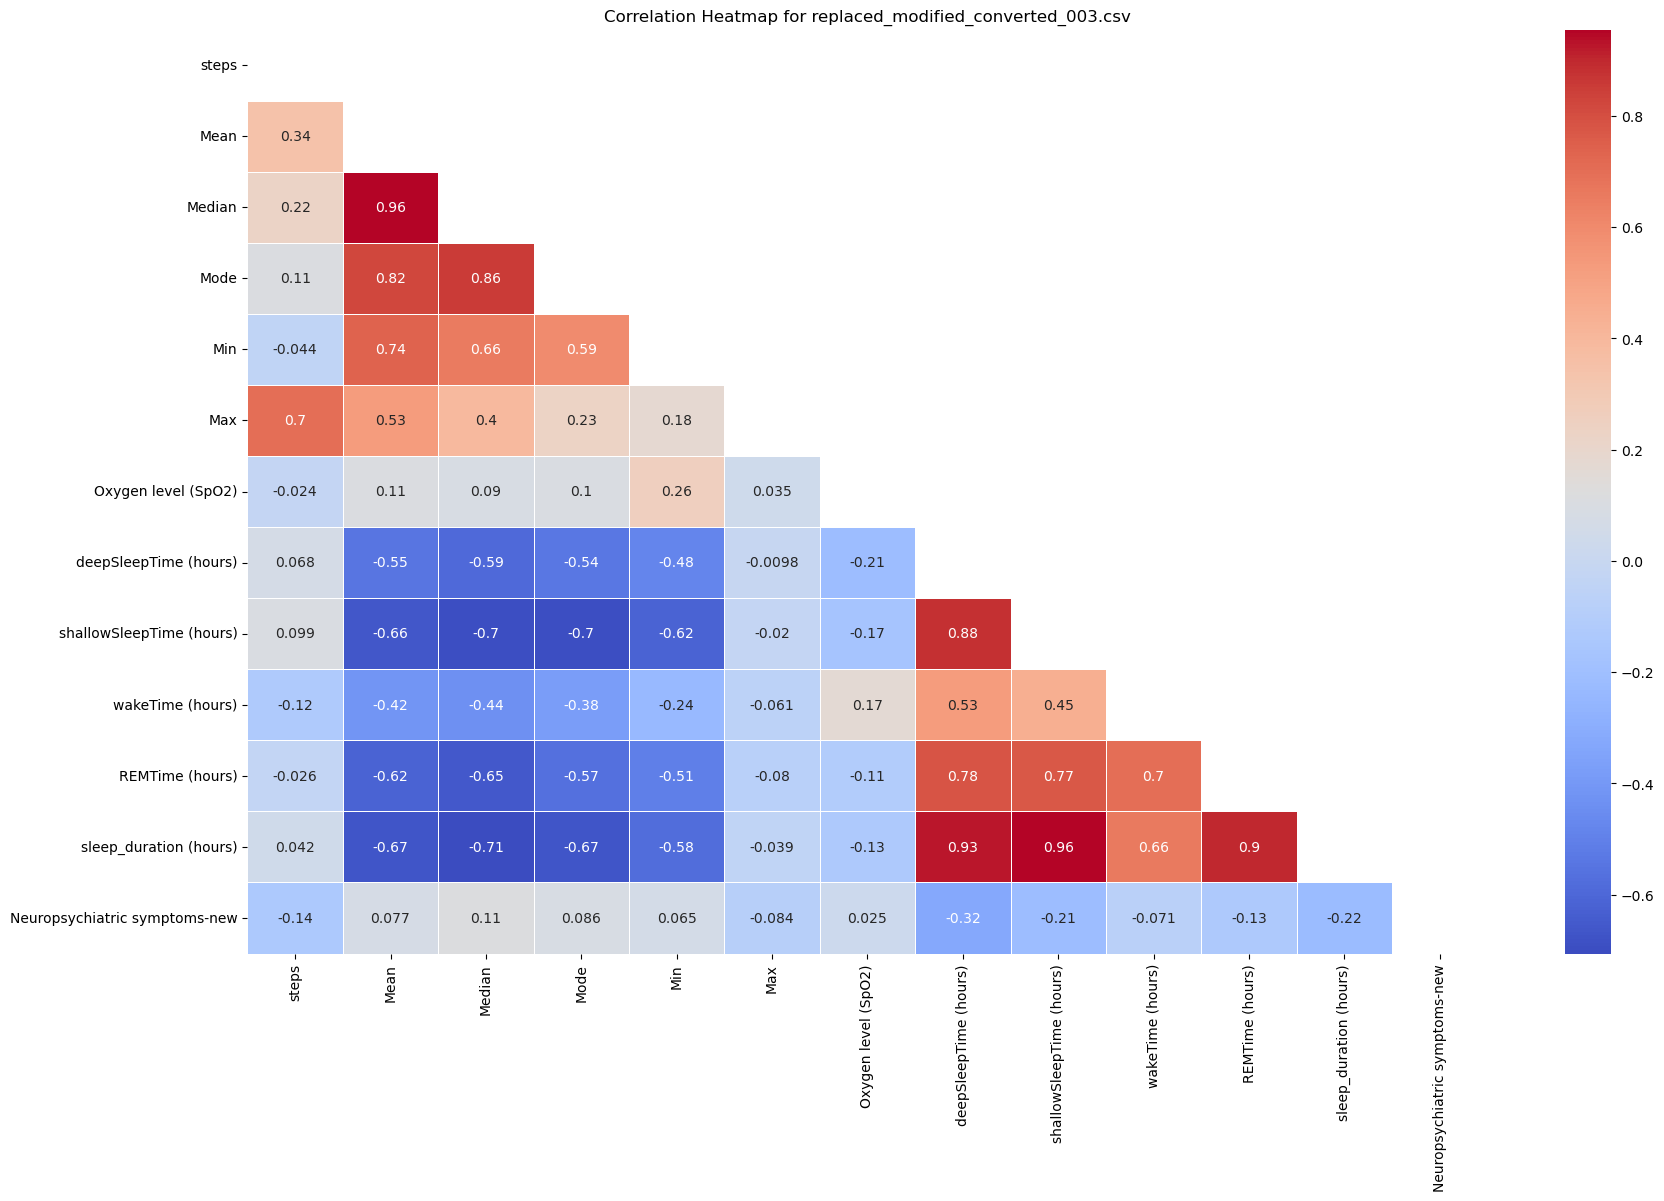

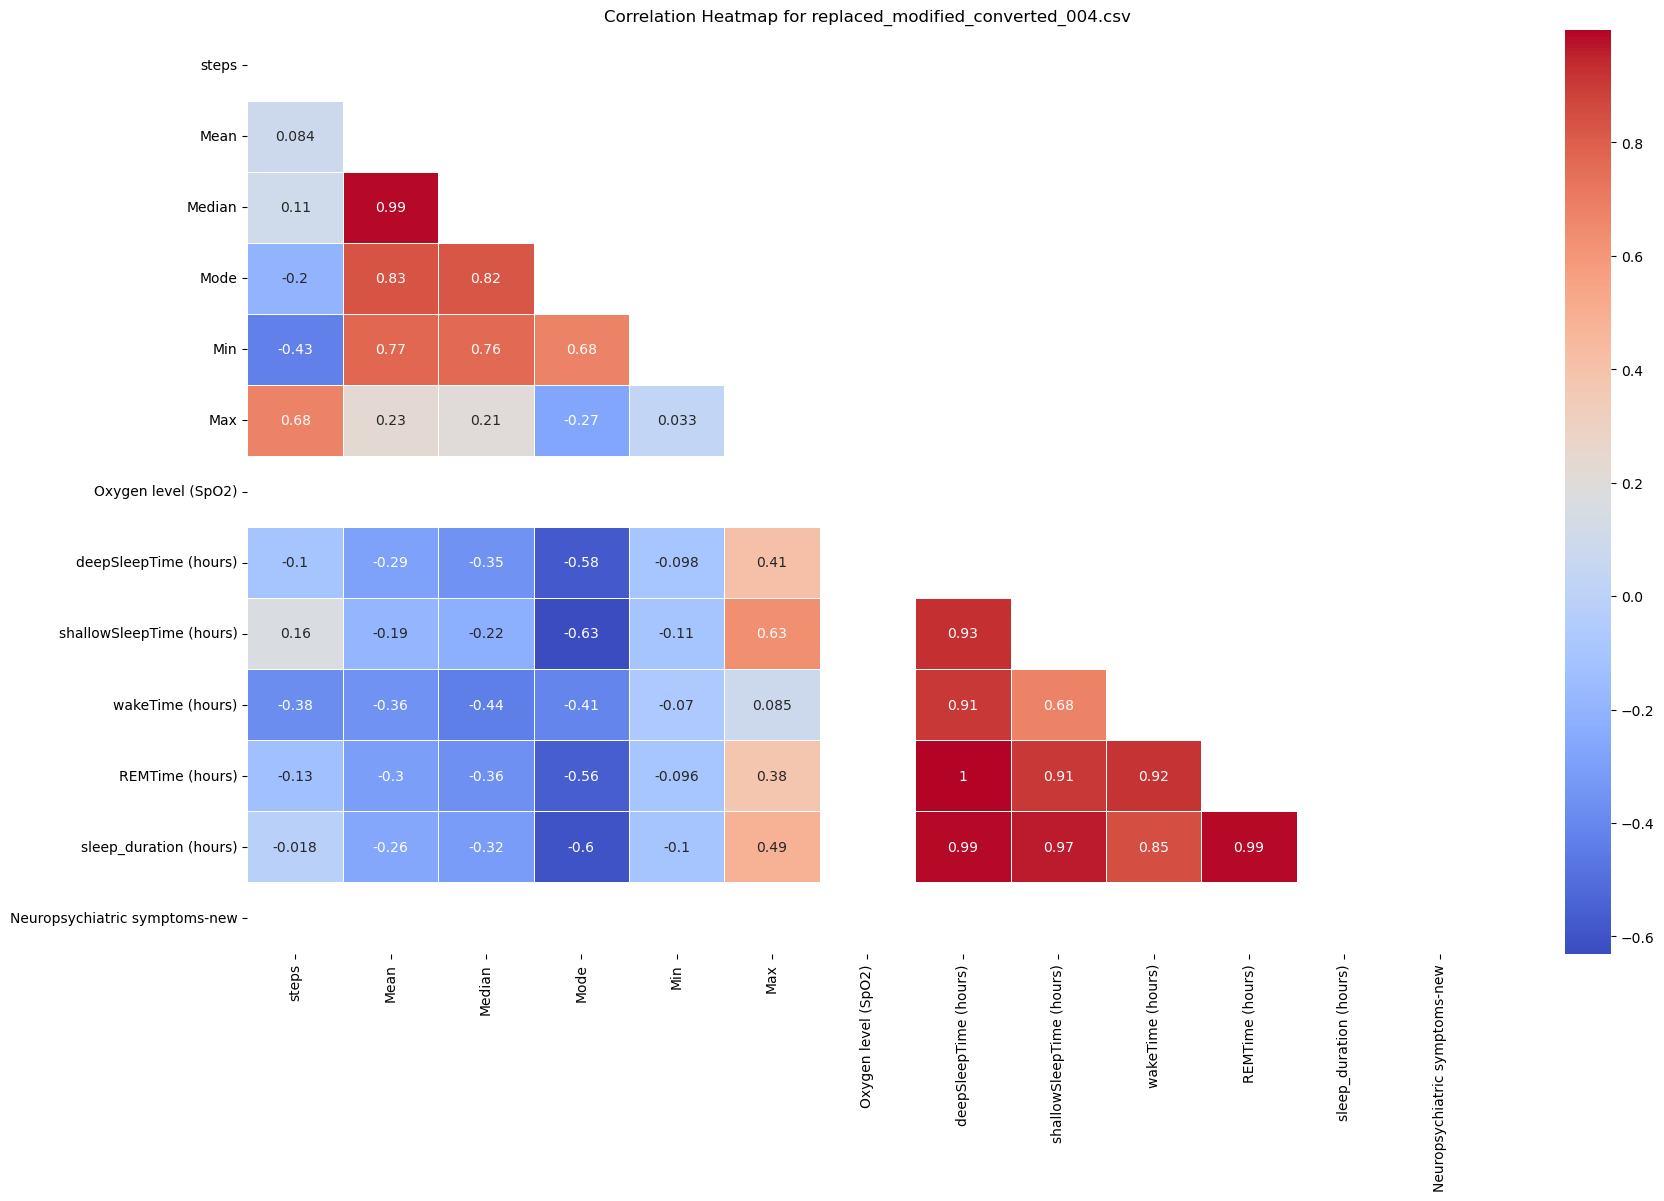

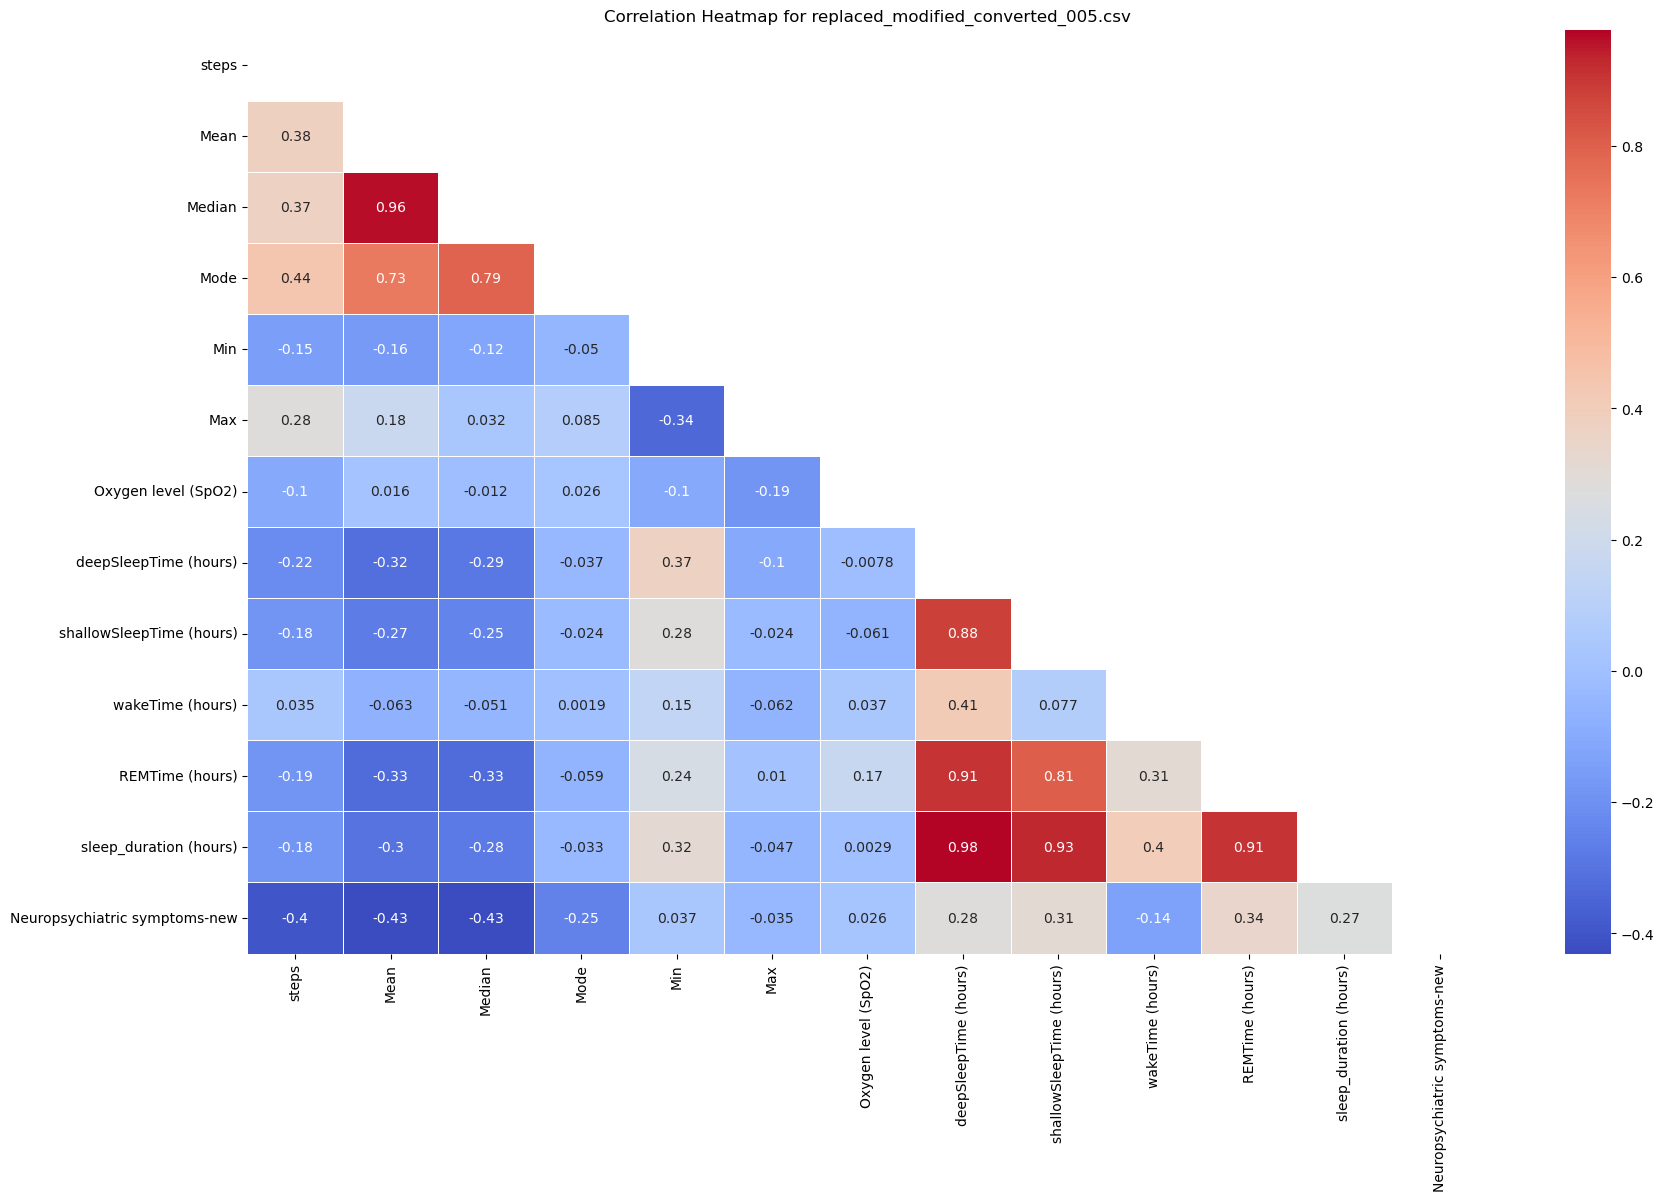

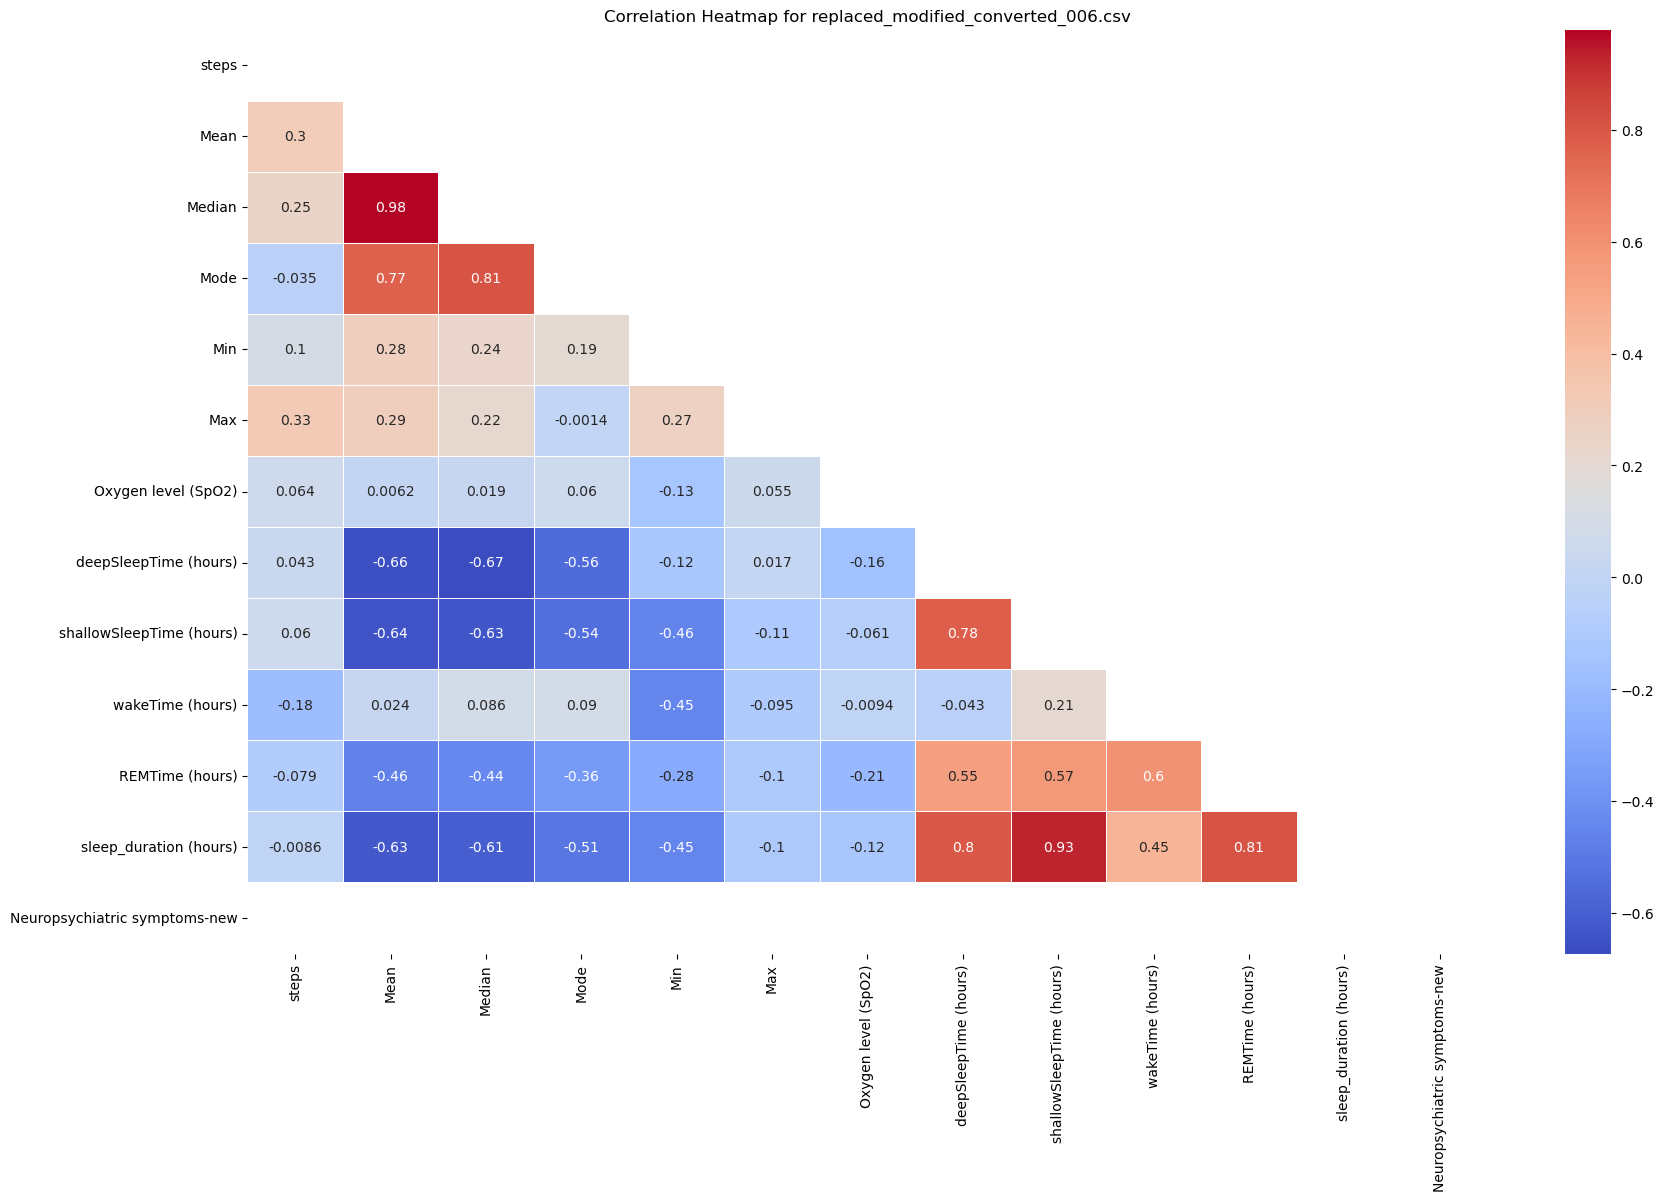

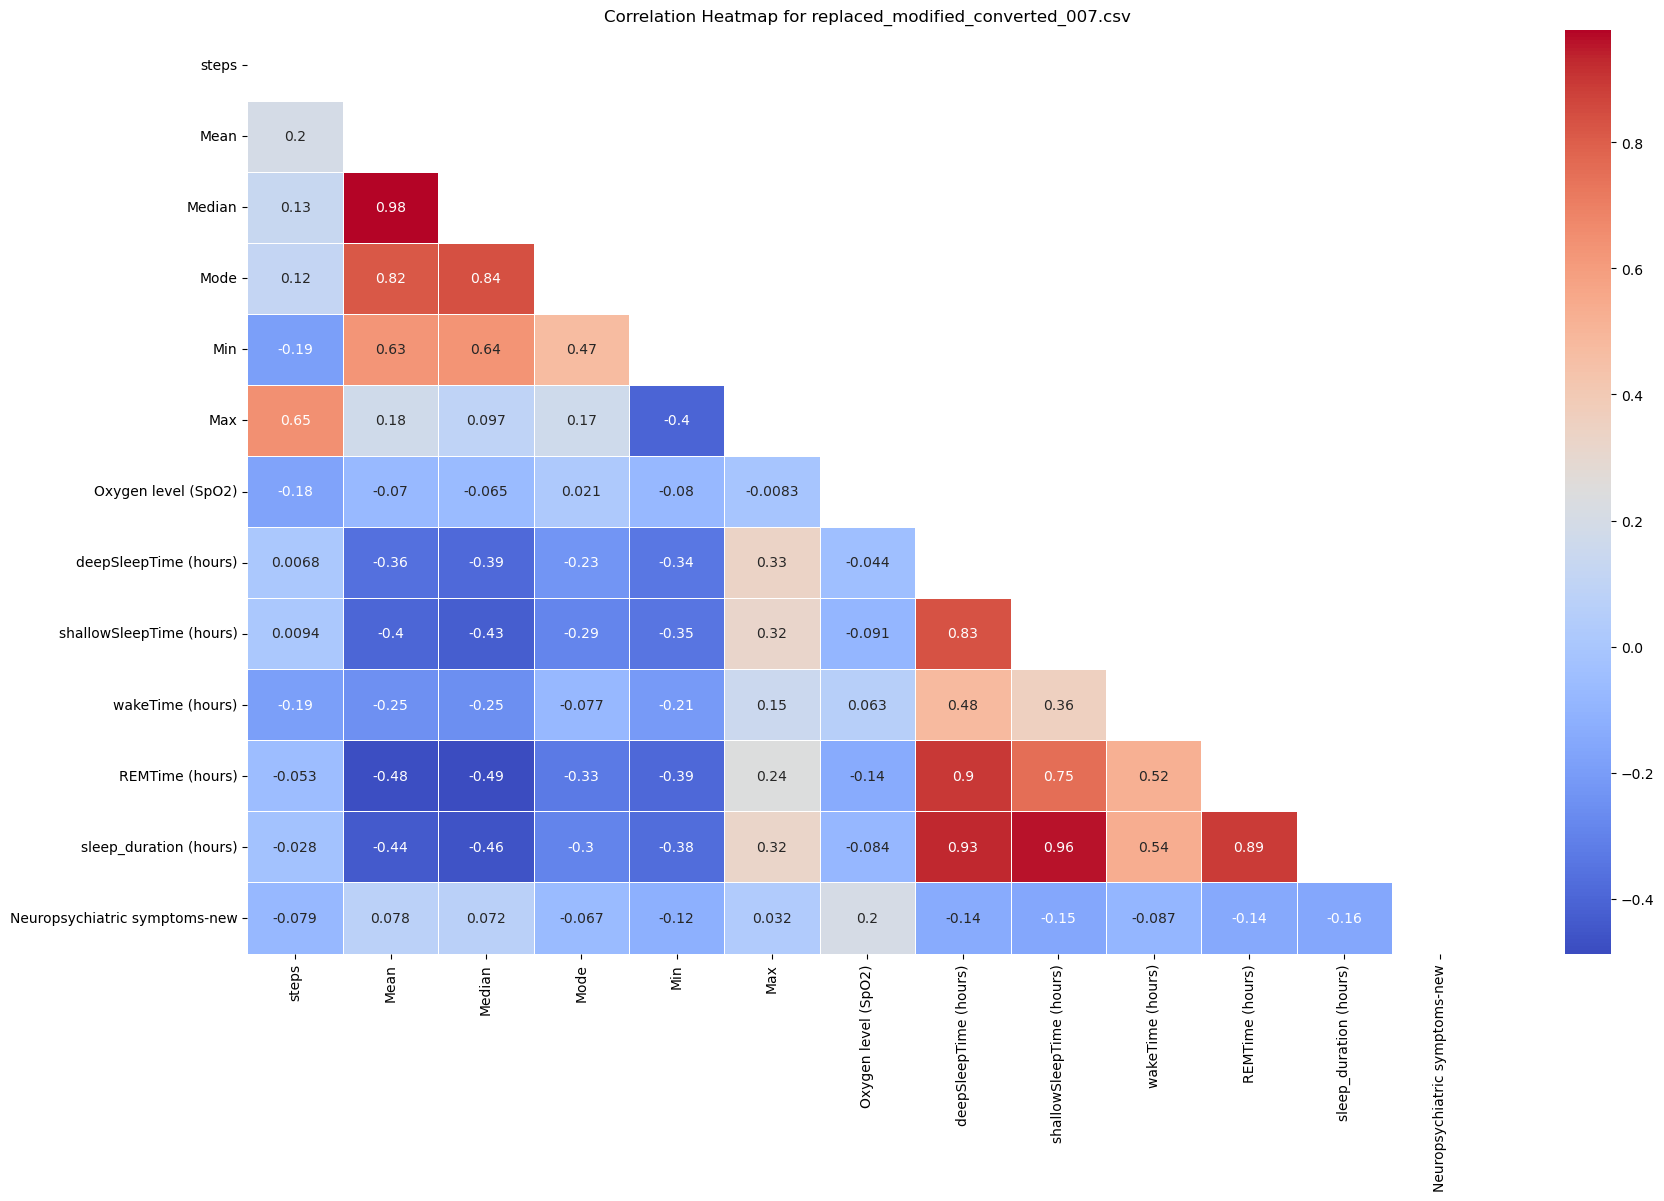

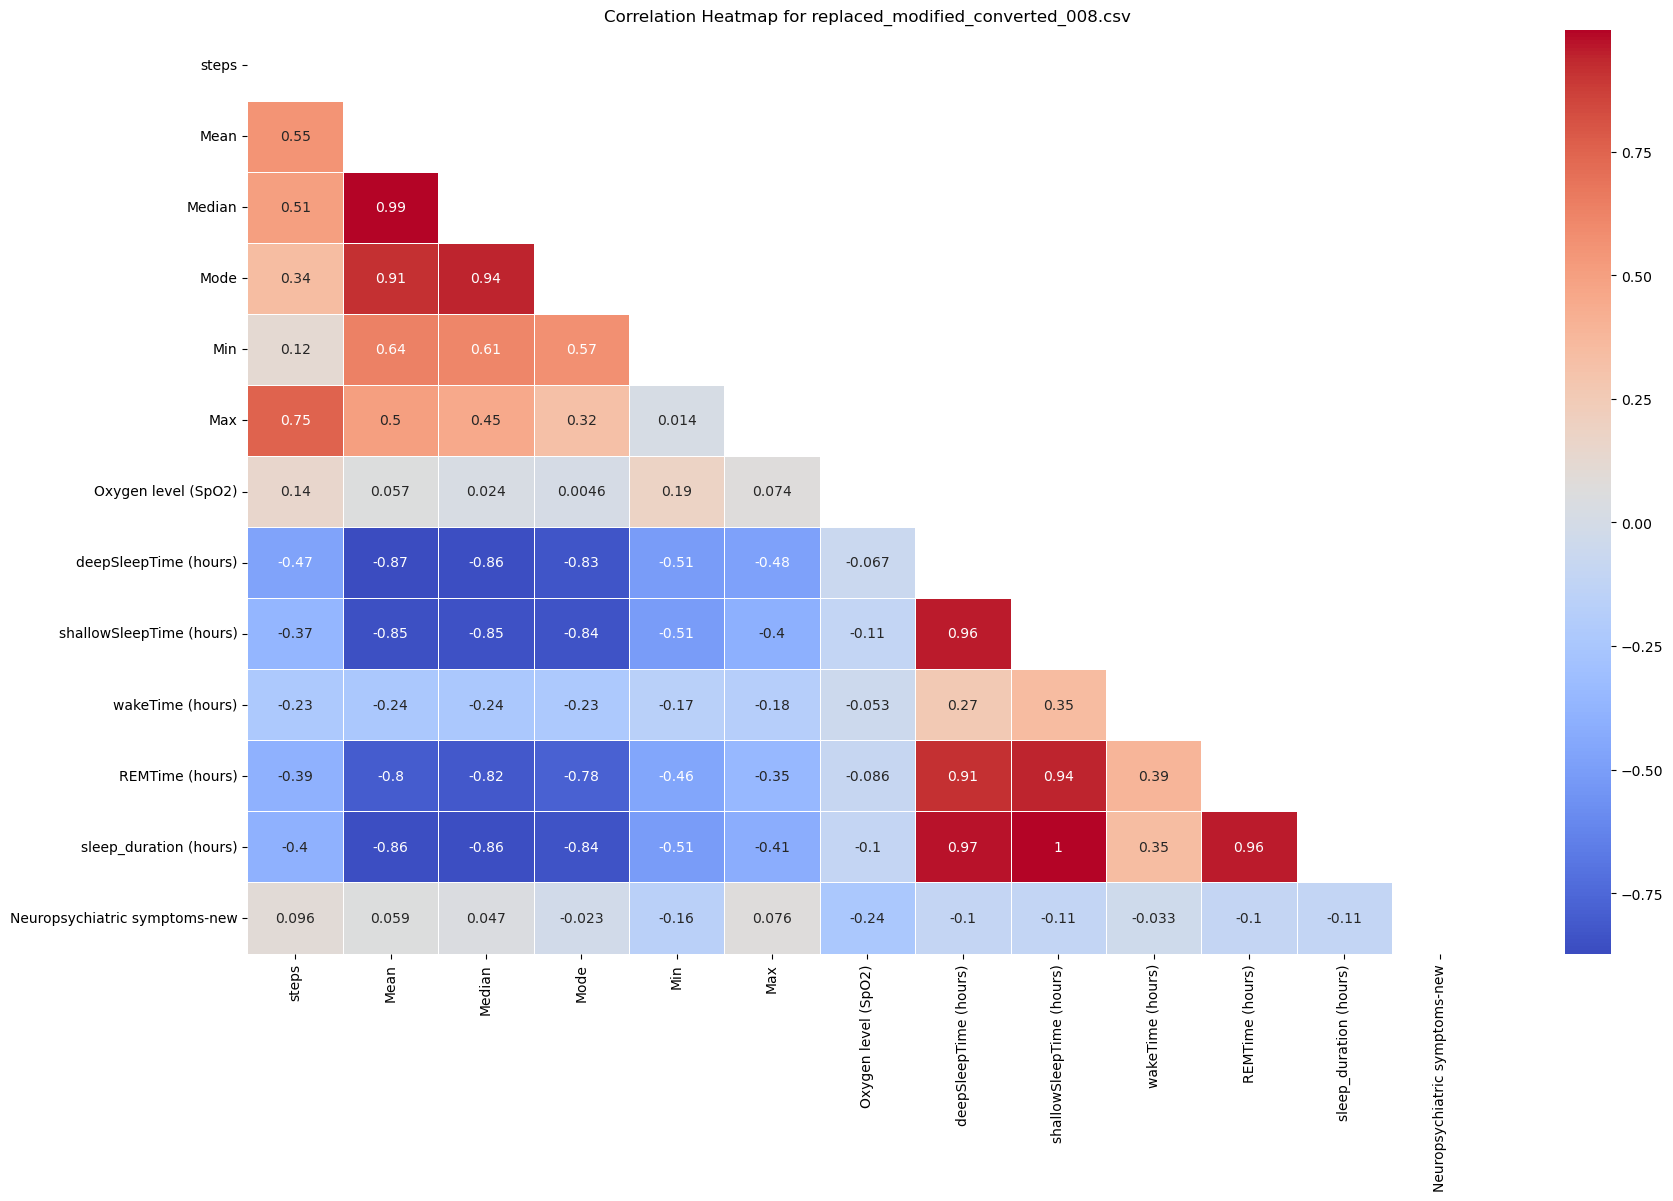

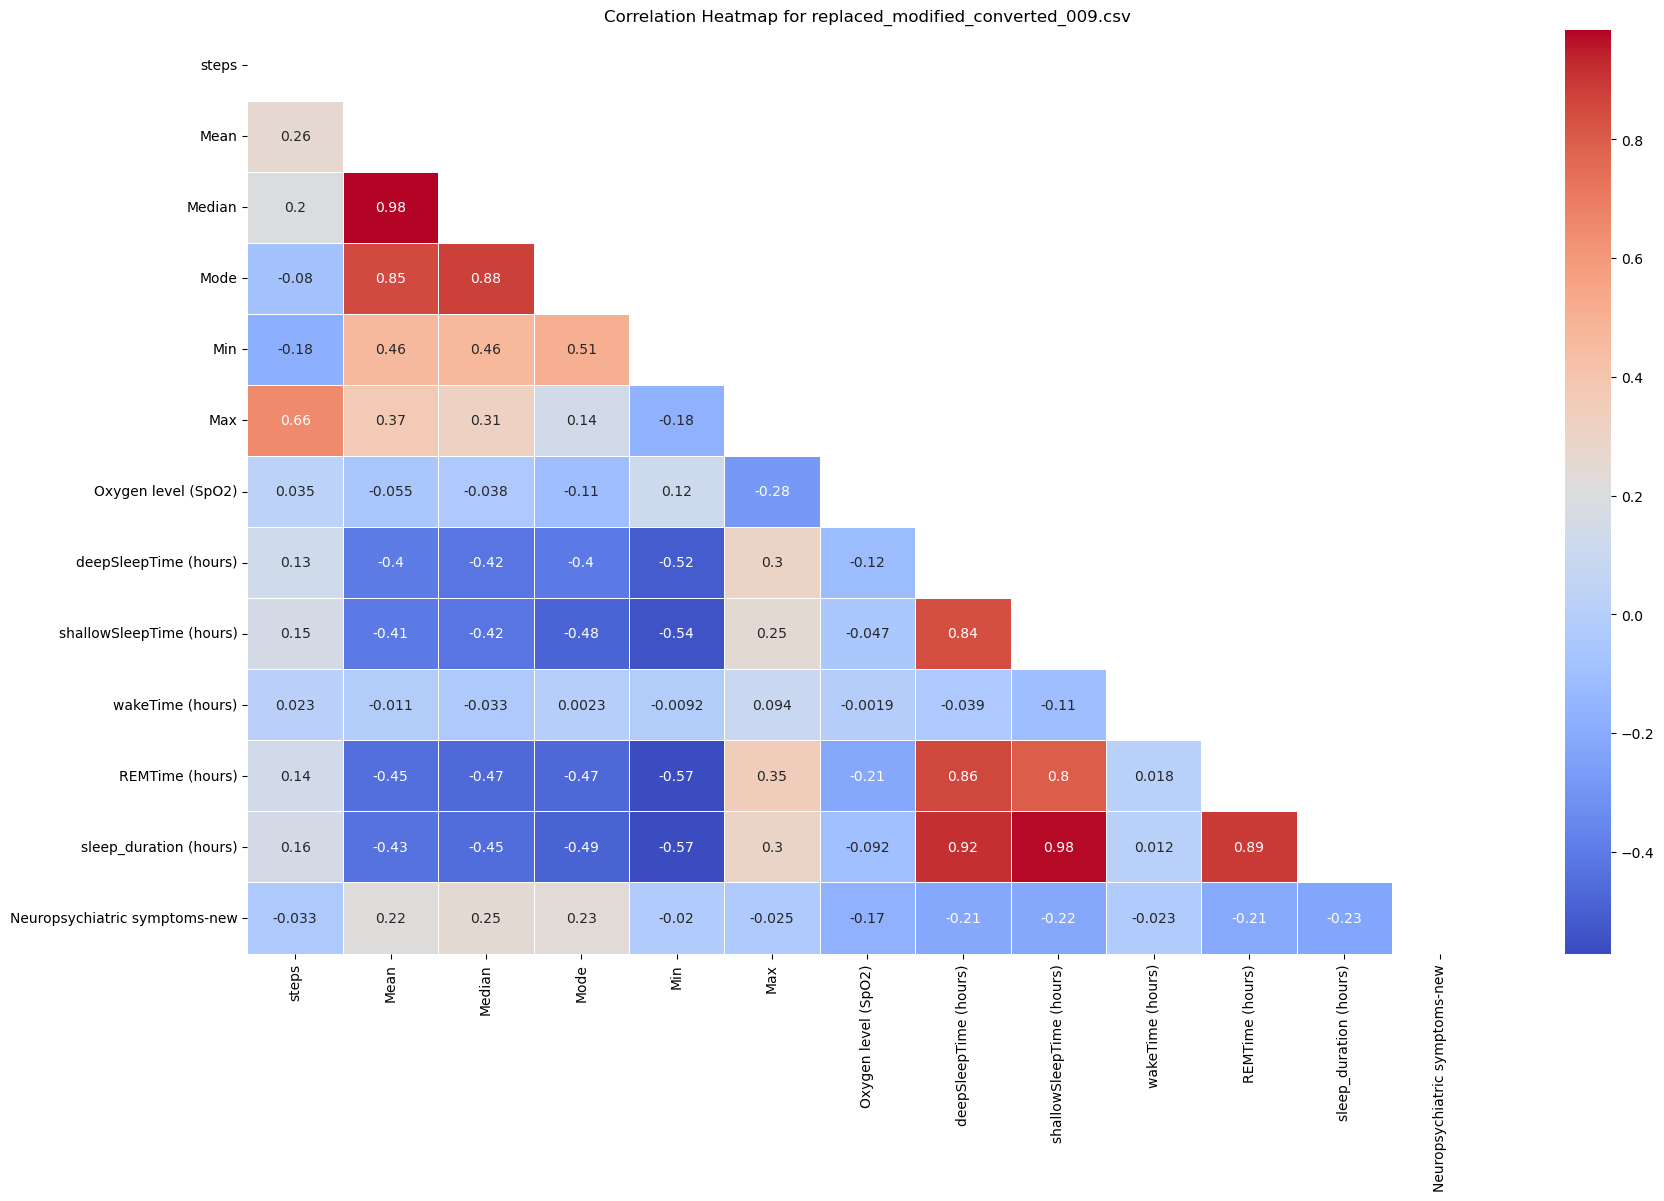

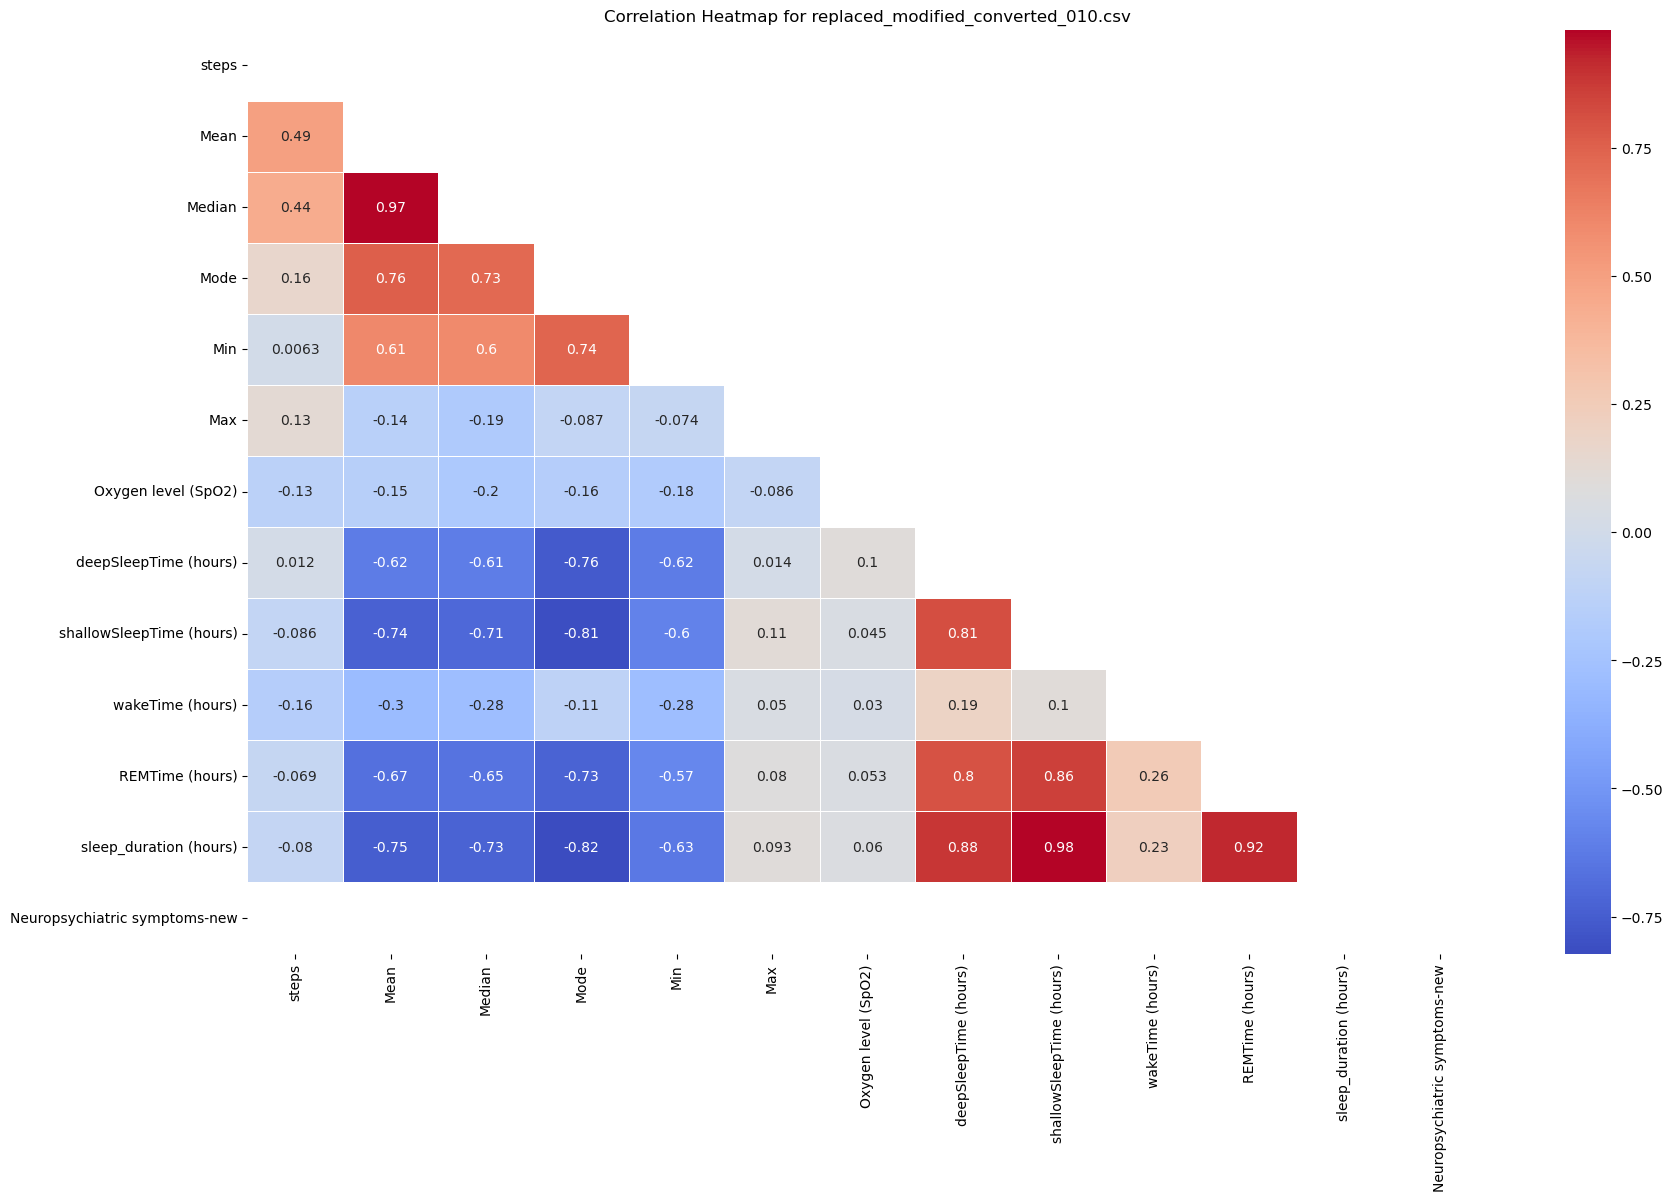

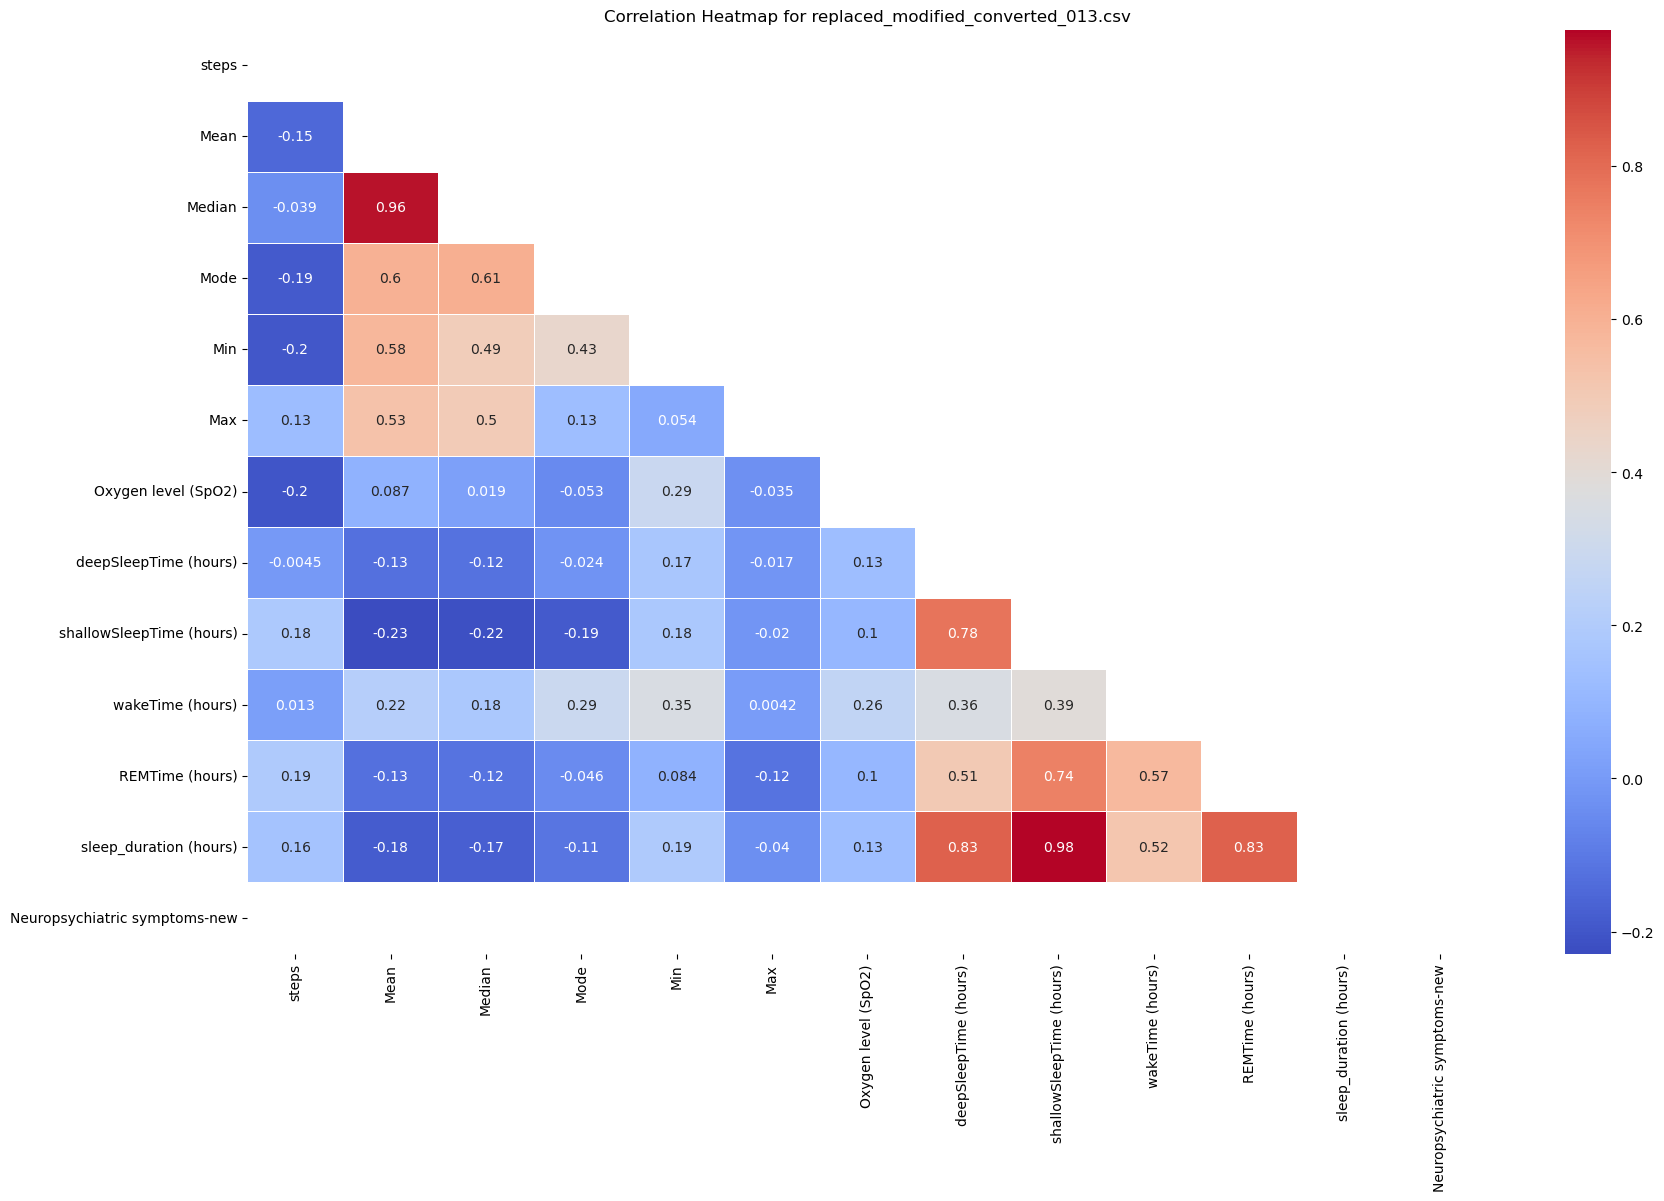

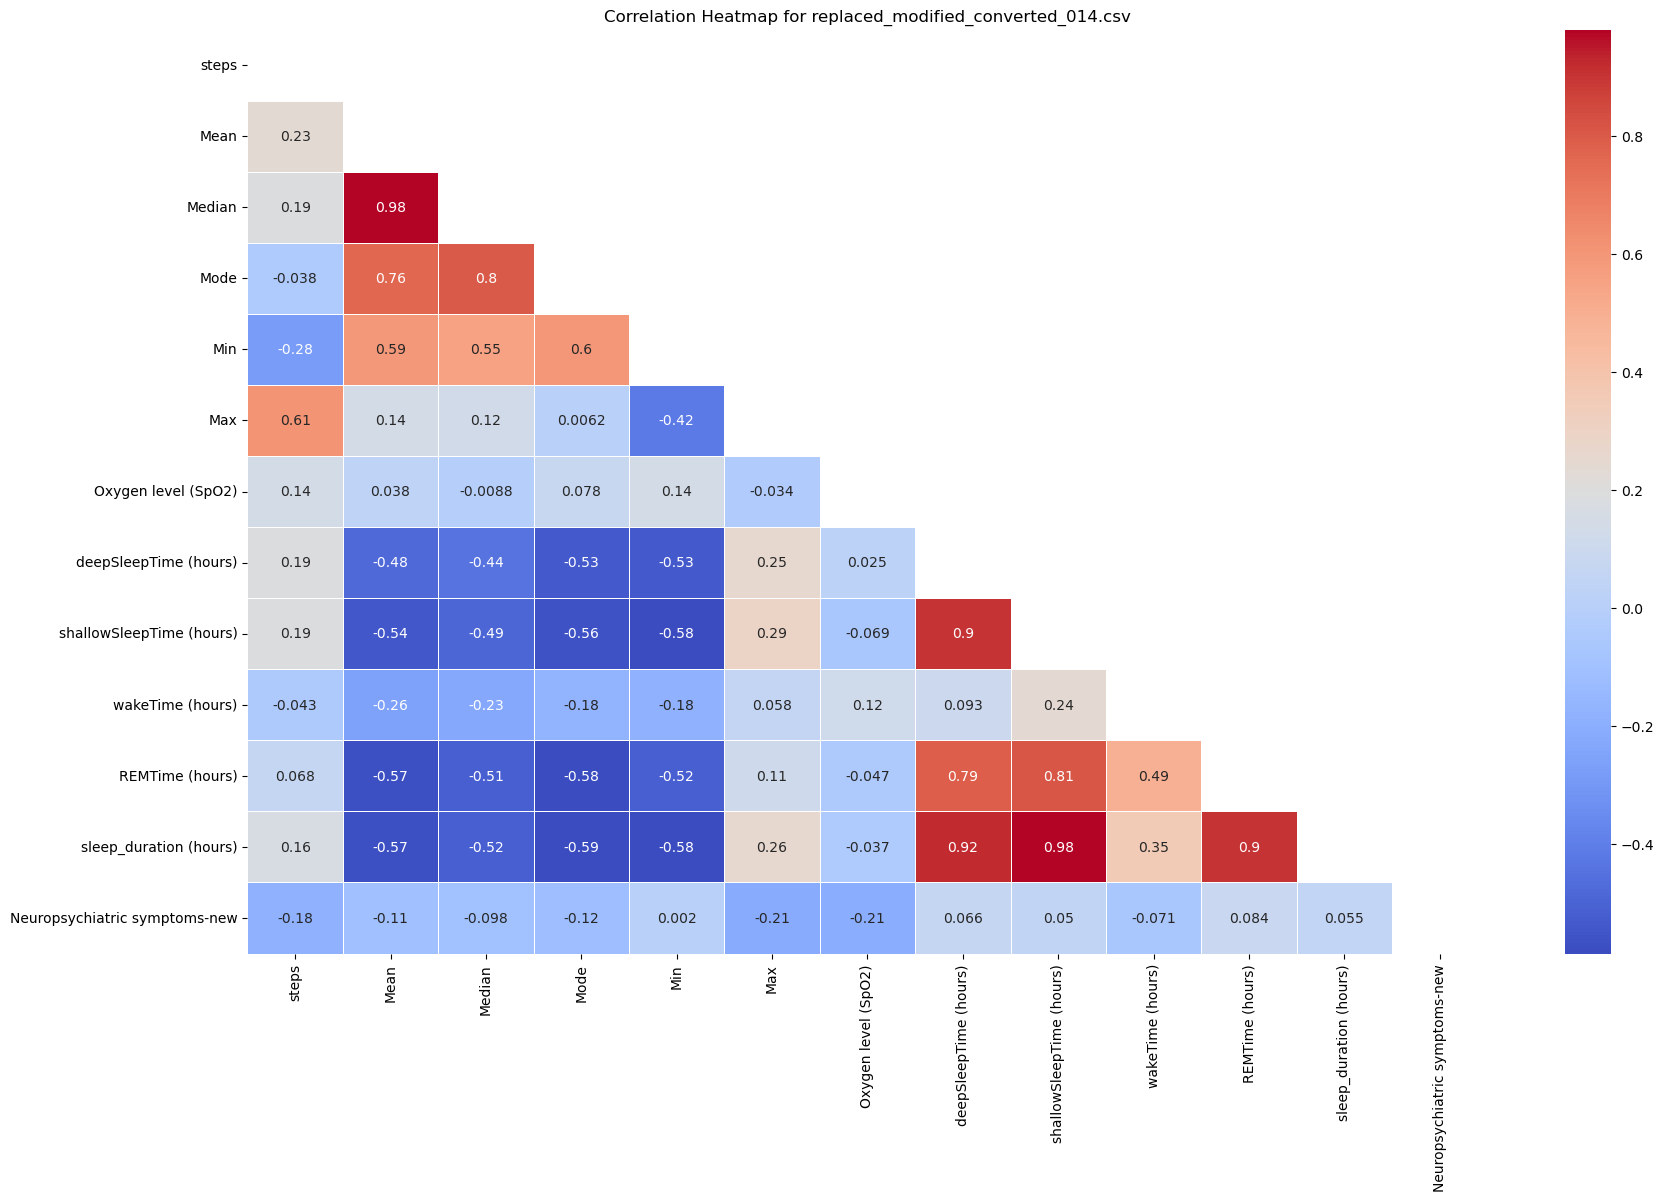

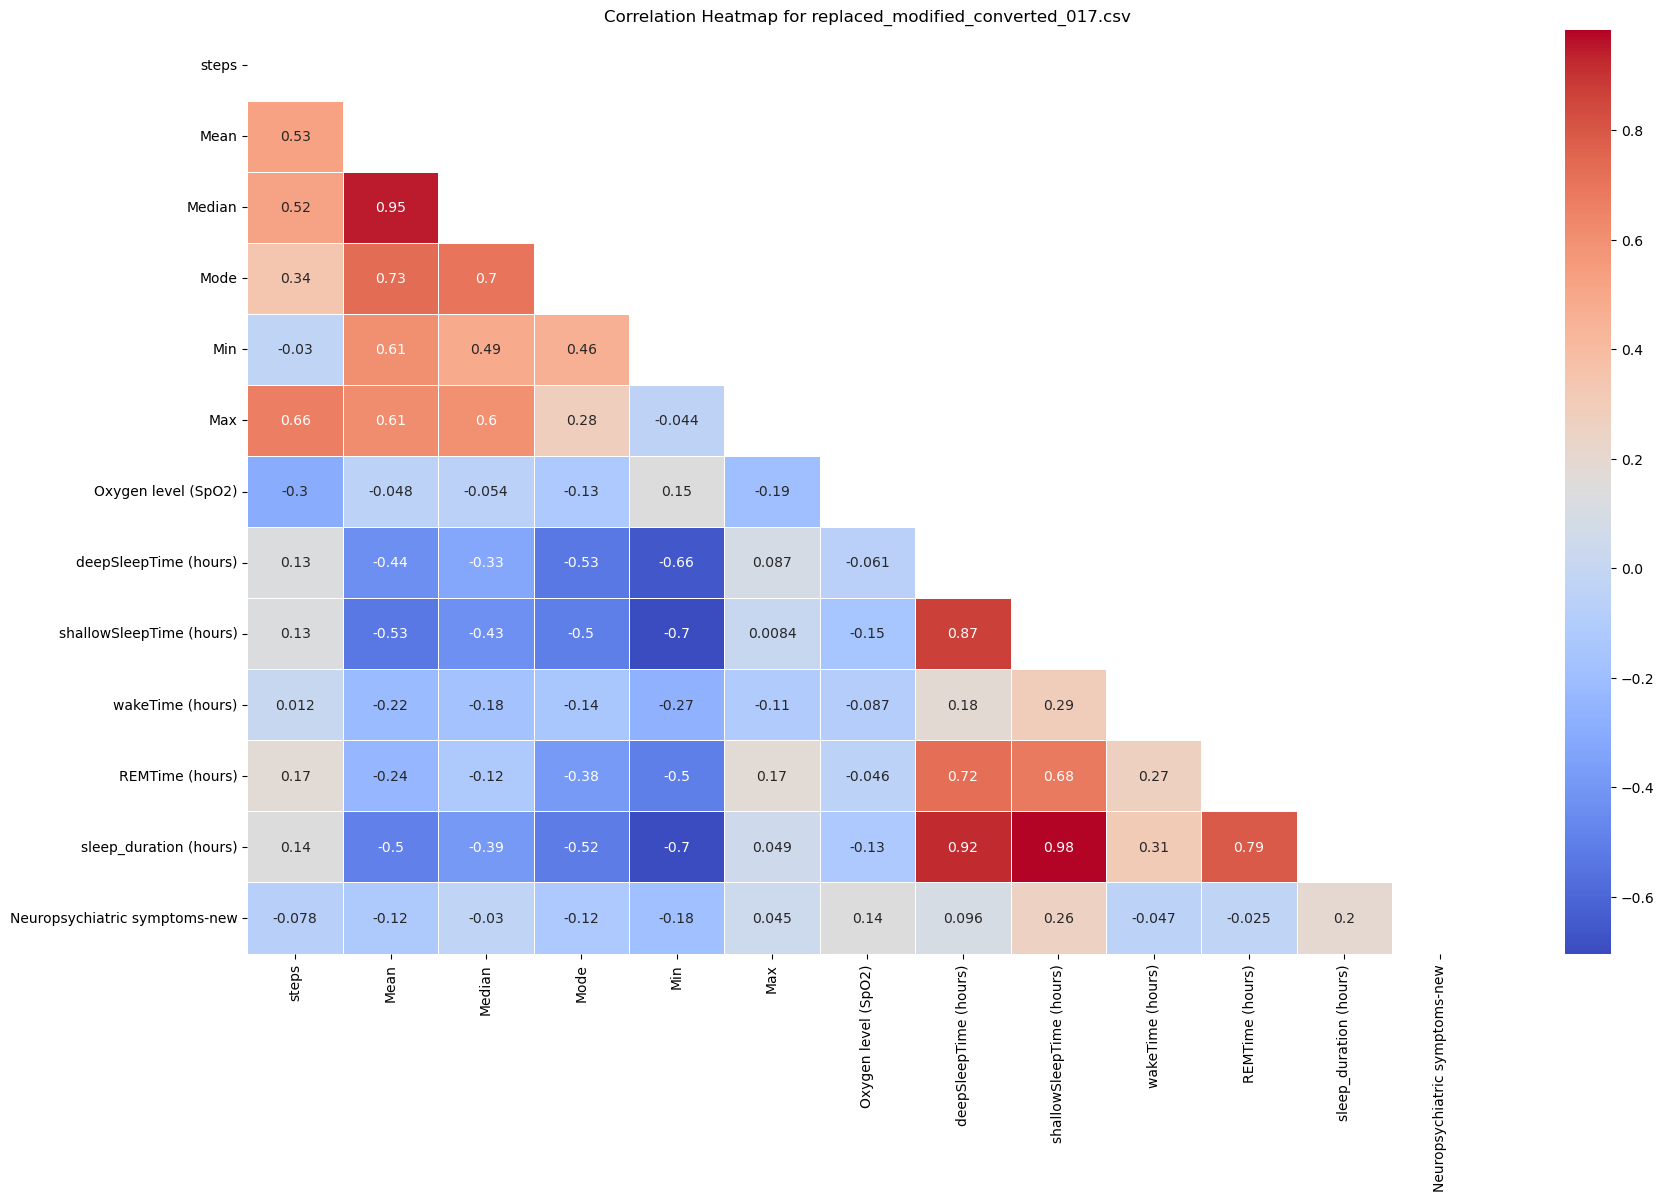

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/NORMAL_cleaned'

# Get a list of CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Drop specific columns
    columns_to_select = ['steps', 'Mean', 'Median', 'Mode', 'Min', 'Max', 'Oxygen level (SpO2)', 'deepSleepTime (hours)', 'shallowSleepTime (hours)', 'wakeTime (hours)', 'REMTime (hours)', 'sleep_duration (hours)', 'Neuropsychiatric symptoms-new']
    df = df[columns_to_select]

    from sklearn.preprocessing import MinMaxScaler

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to your data and transform the data
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    correlation_matrix = df_normalized.corr()

    # Create a mask to display only the lower triangular part of the heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(20, 12))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Heatmap for {file}')

    # Print the correlation values for "Neuropsychiatric symptoms" and sort them in descending order
    neuropsychiatric_correlation = correlation_matrix['Neuropsychiatric symptoms-new'].sort_values(ascending=False)
    
    # Print the title in bold
    print('\033[1m' + f'Neuropsychiatric Symptoms Correlation for {file}' + '\033[0m')

    # Print the sorted correlation values
    print(neuropsychiatric_correlation)

In [2]:
import pandas as pd
import numpy as np

# Dictionary to store correlations for each CSV file
correlations = {
    '001': {'Neuropsychiatric symptoms-new': 1.000000, 'REMTime (hours)': 0.562339, 'wakeTime (hours)': 0.431787, 'sleep_duration (hours)': 0.376472, 'deepSleepTime (hours)': 0.268691, 'shallowSleepTime (hours)': 0.246836, 'Min': 0.178356, 'Mode': 0.064118, 'Oxygen level (SpO2)': 0.036720},
    '002': {'Neuropsychiatric symptoms-new': 1.000000, 'Max': 0.171180},
    '003': {'Neuropsychiatric symptoms-new': 1.000000, 'Median': 0.113887, 'Mode': 0.085804, 'Mean': 0.077290, 'Min': 0.065390, 'Oxygen level (SpO2)': 0.024845},
    '005': {'Neuropsychiatric symptoms-new': 1.000000, 'REMTime (hours)': 0.339305, 'shallowSleepTime (hours)': 0.307886, 'deepSleepTime (hours)': 0.280418, 'sleep_duration (hours)': 0.271688, 'Min': 0.036991, 'Oxygen level (SpO2)': 0.025640},
    '007': {'Neuropsychiatric symptoms-new': 1.000000, 'Oxygen level (SpO2)': 0.203532, 'Mean': 0.077624, 'Median': 0.071990, 'Max': 0.032190},
    '008': {'Neuropsychiatric symptoms-new': 1.000000, 'steps': 0.095810, 'Max': 0.076158, 'Mean': 0.058781, 'Median': 0.047246},
    '009': {'Neuropsychiatric symptoms-new': 1.000000, 'Median': 0.253398, 'Mode': 0.234842, 'Mean': 0.216897},
    '014': {'Neuropsychiatric symptoms-new': 1.000000, 'REMTime (hours)': 0.084046, 'deepSleepTime (hours)': 0.065563, 'sleep_duration (hours)': 0.055369, 'shallowSleepTime (hours)': 0.050330, 'Min': 0.001967},
    '017': {'Neuropsychiatric symptoms-new': 1.000000, 'shallowSleepTime (hours)': 0.262036, 'sleep_duration (hours)': 0.195700, 'Oxygen level (SpO2)': 0.142719, 'deepSleepTime (hours)': 0.096208, 'Max': 0.044984}
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(correlations)

# Transpose the DataFrame for easier calculations
df = df.T
df

# Calculate the average correlation for each positive correlation feature
average_corr = df.mean()

# Sort the average_corr in descending order
average_corr_sorted = average_corr.sort_values(ascending=False)

# Display the result
print("Average Correlation for Positive Correlation Features:")
print(average_corr_sorted)

# df.to_csv('average_corr.csv', index=False)

Average Correlation for Positive Correlation Features:
Neuropsychiatric symptoms-new    1.000000
wakeTime (hours)                 0.431787
REMTime (hours)                  0.328563
sleep_duration (hours)           0.224807
shallowSleepTime (hours)         0.216772
deepSleepTime (hours)            0.177720
Mode                             0.128255
Median                           0.121630
Mean                             0.107648
steps                            0.095810
Oxygen level (SpO2)              0.086691
Max                              0.081128
Min                              0.070676
dtype: float64


In [3]:
import os
import pandas as pd

# Specify the folder where your files are located
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/COVID_cleaned'

# Specify the folder where you want to save the modified files
output_folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/COVID_cleaned_ML'

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # assuming your files are in CSV format
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # Select only the desired columns
        selected_columns = ['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)',
                             'shallowSleepTime (hours)', 'Oxygen level (SpO2)', 'Neuropsychiatric symptoms-new']
        df_selected = df[selected_columns]

        # Save the modified DataFrame to a new CSV file in the output folder
        output_filename = f'ML_{filename}'
        output_file_path = os.path.join(output_folder_path, output_filename)
        df_selected.to_csv(output_file_path, index=False)

print("Files have been processed and saved in the output folder.")


Files have been processed and saved in the output folder.


In [4]:
import os
import pandas as pd

# Specify the folder where your files are located
folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/COVID_cleaned_ML'

# Specify the output folder where you want to save the concatenated file
output_folder_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID'

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # assuming your files are in CSV format
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # Concatenate the current DataFrame with the overall DataFrame
        concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file in the output folder
output_filename = 'ML_COVID.csv'
output_file_path = os.path.join(output_folder_path, output_filename)
concatenated_df.to_csv(output_file_path, index=False)

print("Files have been concatenated and saved in the output folder.")


Files have been concatenated and saved in the output folder.


In [46]:
import pandas as pd

# Specify the path to your file
file_path = 'C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Calculate counts
total_count = len(df)
symptoms_0_count = (df['Neuropsychiatric symptoms-new'] == 0).sum()
symptoms_1_count = (df['Neuropsychiatric symptoms-new'] == 1).sum()

# Calculate ratios and percentages
ratio_0 = symptoms_0_count / total_count
ratio_1 = symptoms_1_count / total_count
percentage_0 = (symptoms_0_count / total_count) * 100
percentage_1 = (symptoms_1_count / total_count) * 100

# Display results
print(f"Total Count: {total_count}")
print(f"Count of Neuropsychiatric symptoms-new = 0: {symptoms_0_count}, Ratio: {ratio_0:.2f}, Percentage: {percentage_0:.2f}%")
print(f"Count of Neuropsychiatric symptoms-new = 1: {symptoms_1_count}, Ratio: {ratio_1:.2f}, Percentage: {percentage_1:.2f}%")


Total Count: 622
Count of Neuropsychiatric symptoms-new = 0: 531, Ratio: 0.85, Percentage: 85.37%
Count of Neuropsychiatric symptoms-new = 1: 91, Ratio: 0.15, Percentage: 14.63%


### Normalized dataset

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized.to_csv('normalized_ML_COVID.csv', index=False)

### SMOTE on training set

In [48]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual name of your dataset
df = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/normalized_ML_COVID_train.csv')

# Separate features (X) and target variable (y)
X = df.drop('Neuropsychiatric symptoms-new', axis=1)  # Assuming 'Neuropsychiatric symptoms-new' is your target variable
y = df['Neuropsychiatric symptoms-new']

# Initialize SMOTE
smote = SMOTE(random_state=33)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled.to_csv('oversampled_normalized_ML_COVID_train.csv', index=False)


Class distribution after oversampling:
0    424
1    424
Name: Neuropsychiatric symptoms-new, dtype: int64


## Machine Learning

In [12]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 1.9 MB/s eta 0:00:00


### Machine Learning (split by participants)

In [51]:
import pandas as pd

df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/oversampled_normalized_ML_COVID_train.csv')

# Load your pre-split testing dataset into a pandas DataFrame
# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_test = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/normalized_ML_COVID_test.csv')

df_train = df_train.drop('pt', axis=1)
df_test = df_test.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train = df_train['Neuropsychiatric symptoms-new']

# Separate features (X) and target variable (y) for testing dataset
X_test = df_test.drop('Neuropsychiatric symptoms-new', axis=1)
y_test = df_test['Neuropsychiatric symptoms-new']

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=40)
xgb_classifier = XGBClassifier(random_state=40)
logreg_classifier = LogisticRegression(random_state=40)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier']

model_accuracy_test_set = []
model_accuracy_cross_val = []

for model, name in zip(models, names):
    # Evaluate on the test set
    model.fit(X_train, y_train)
    y_pred_test_set = model.predict(X_test)
    test_set_score = accuracy_score(y_test, y_pred_test_set)
    model_accuracy_test_set.append(test_set_score)

    # Evaluate using cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cross_val_score_mean = cross_val_results.mean()
    model_accuracy_cross_val.append(cross_val_score_mean)

evaluation = pd.DataFrame({
    'Models': names,
    'Model Accuracy (Test Set)': model_accuracy_test_set,
    'Cross-Validation Accuracy': model_accuracy_cross_val
})

evaluation.sort_values(by="Model Accuracy (Test Set)", ascending=False)

Models  Model Accuracy (Test Set)  Cross-Validation Accuracy
0        Random Forest                      0.536                   0.905394
3    Voting Classifier                      0.408                   0.907434
1              XGBoost                      0.376                   0.949717
2  Logistic Regression                      0.304                   0.853131

## Machine Learning (split by 0.2)

In [9]:
import pandas as pd

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual name of your dataset
df = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID.csv')

# Drop the 'pt' column
df = df.drop('pt', axis=1)

In [10]:
X = df.drop('Neuropsychiatric symptoms-new', axis=1)
y = df['Neuropsychiatric symptoms-new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

from sklearn.preprocessing import MinMaxScaler

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [11]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=55)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled.to_csv('oversampled_normalized_ML_COVID_train1.csv', index=False)


Class distribution after oversampling:
0    422
1    422
Name: Neuropsychiatric symptoms-new, dtype: int64


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=66)
xgb_classifier = XGBClassifier(random_state=66)
logreg_classifier = LogisticRegression(random_state=66)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier']

model_accuracy_test_set = []
model_accuracy_cross_val = []

for model, name in zip(models, names):
    # Evaluate on the test set
    model.fit(X_train, y_train)
    y_pred_test_set = model.predict(X_test)
    test_set_score = accuracy_score(y_test, y_pred_test_set)
    model_accuracy_test_set.append(test_set_score)

    # Evaluate using cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=68)
    cross_val_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cross_val_score_mean = cross_val_results.mean()
    model_accuracy_cross_val.append(cross_val_score_mean)

evaluation = pd.DataFrame({
    'Models': names,
    'Model Accuracy (Test Set)': model_accuracy_test_set,
    'Cross-Validation Accuracy': model_accuracy_cross_val
})

evaluation.sort_values(by="Model Accuracy (Test Set)", ascending=False)

Models  Model Accuracy (Test Set)  Cross-Validation Accuracy
2  Logistic Regression                      0.872                   0.853703
0        Random Forest                      0.864                   0.858529
3    Voting Classifier                      0.864                   0.856929
1              XGBoost                      0.856                   0.863368

### ml - split by participants

In [20]:
import pandas as pd

df_train = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_train.csv')

# Load your pre-split testing dataset into a pandas DataFrame
# Replace 'test_dataset.csv' with the actual name of your testing dataset
df_test = pd.read_csv('C:/Users/User/Downloads/WQD7002 Data Science Research Project/datasets/same_months/ML_COVID/ML_COVID_test.csv')

df_train = df_train.drop('pt', axis=1)
df_test = df_test.drop('pt', axis=1)

# Separate features (X) and target variable (y) for training dataset
X_train1 = df_train.drop('Neuropsychiatric symptoms-new', axis=1)
y_train1 = df_train['Neuropsychiatric symptoms-new']

# Separate features (X) and target variable (y) for testing dataset
X_test1 = df_test.drop('Neuropsychiatric symptoms-new', axis=1)
y_test1 = df_test['Neuropsychiatric symptoms-new']

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train1 = scaler.fit_transform(X_train1)

X_test1 = scaler.transform(X_test1)

In [17]:
X_train1

array([[0.69767442, 0.56664341, 0.32380952, 0.69462647, 0.73684211],
       [0.36046512, 0.53872994, 0.67619048, 0.57667104, 0.89473684],
       [0.47286822, 0.53593859, 0.43492063, 0.64613368, 1.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.84962406],
       [0.48449612, 0.38241452, 0.24761905, 0.45216252, 0.78947368],
       [0.        , 0.        , 0.        , 0.        , 0.84962406]])

In [18]:
X.columns

Index(['deepSleepTime (hours)', 'sleep_duration (hours)', 'REMTime (hours)',
       'shallowSleepTime (hours)', 'Oxygen level (SpO2)'],
      dtype='object')

In [22]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=33)

# Apply SMOTE to generate synthetic samples
X_resampled1, y_resampled1 = smote.fit_resample(X_train1, y_train1)

# Create a new DataFrame with the resampled data
# Create a new DataFrame with the resampled data
df_resampled1 = pd.concat([pd.DataFrame(X_resampled1, columns=X.columns), pd.Series(y_resampled1, name='Neuropsychiatric symptoms-new')], axis=1)

# Display the count of each class after oversampling
print("Class distribution after oversampling:")
print(df_resampled1['Neuropsychiatric symptoms-new'].value_counts())

# Save the oversampled dataset to a new CSV file
df_resampled1.to_csv('oversampled_normalized_ML_COVID_train_byparticipants.csv', index=False)

Class distribution after oversampling:
0    424
1    424
Name: Neuropsychiatric symptoms-new, dtype: int64


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=30)
xgb_classifier = XGBClassifier(random_state=30)
logreg_classifier = LogisticRegression(random_state=30)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier']

model_accuracy_test_set1 = []
model_accuracy_cross_val2 = []

for model, name in zip(models, names):
    # Evaluate on the test set
    model.fit(X_train1, y_train1)
    y_pred_test_set1 = model.predict(X_test1)
    test_set_score1 = accuracy_score(y_test1, y_pred_test_set1)
    model_accuracy_test_set1.append(test_set_score1)

    # Evaluate using cross-validation on the training set
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
    cross_val_results2 = cross_val_score(model, X_train1, y_train1, cv=cv, scoring='accuracy')
    cross_val_score_mean2 = cross_val_results2.mean()
    model_accuracy_cross_val2.append(cross_val_score_mean2)

evaluation = pd.DataFrame({
    'Models': names,
    'Model Accuracy (Test Set)': model_accuracy_test_set1,
    'Cross-Validation Accuracy': model_accuracy_cross_val2
})

evaluation.sort_values(by="Model Accuracy (Test Set)", ascending=False)

Models  Model Accuracy (Test Set)  Cross-Validation Accuracy
3    Voting Classifier                      0.872                   0.859232
2  Logistic Regression                      0.856                   0.853131
0        Random Forest                      0.848                   0.861273
1              XGBoost                      0.848                   0.861192

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# # Separate features (X) and target variable (y)
# X = df.drop('Neuropsychiatric symptoms-new', axis=1)  # Assuming 'Neuropsychiatric symptoms-new' is your target variable
# y = df['Neuropsychiatric symptoms-new']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=66)
xgb_classifier = XGBClassifier(random_state=66)
logreg_classifier = LogisticRegression(random_state=66)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier'
         ]

model_accuracy = []

for name in models:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

Models  Model accuracy
1              XGBoost        0.882629
0        Random Forest        0.859155
3    Voting Classifier        0.859155
2  Logistic Regression        0.539906

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df.drop('Neuropsychiatric symptoms-new', axis=1)  # Assuming 'Neuropsychiatric symptoms-new' is your target variable
y = df['Neuropsychiatric symptoms-new']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=61)
xgb_classifier = XGBClassifier(random_state=61)
logreg_classifier = LogisticRegression(random_state=61)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='soft')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

names = ['Random Forest',
         'XGBoost',
         'Logistic Regression',
         'Voting Classifier'
         ]

model_accuracy = []

for name in models:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

Models  Model accuracy
1              XGBoost        0.873239
3    Voting Classifier        0.873239
0        Random Forest        0.868545
2  Logistic Regression        0.568075

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual name of your dataset
df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop('Neuropsychiatric symptoms-new', axis=1)  # Assuming 'Neuropsychiatric symptoms-new' is your target variable
y = df['Neuropsychiatric symptoms-new']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logreg_classifier = LogisticRegression(random_state=42)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('logistic_regression', logreg_classifier)
], voting='hard')  # 'hard' means majority voting, you can also use 'soft' for weighted voting

# List of models
models = [rf_classifier, xgb_classifier, logreg_classifier, voting_classifier]

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using cross-validation
for model, name in zip(models, names):
    cross_val_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {cross_val_results.mean():.2f} (± {cross_val_results.std():.2f})")
